In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def abm(seed = 14, numIt=1):
    '''
    returns a matrix of Arithmetic Brownian Motion paths
    '''
    N = 3600
    I = numIt
    dt= 1.0 / 3600
    X =np.zeros((N + 1, I), dtype=float)
    X[0] = 10
    np.random.seed(seed)
    step = 5
    for i in range(N):

        if (i < N/step) or (N/step*2 < i < N/step*3) or (N/step*4 < i < N/step*5) :
            sgn = -0.01
        elif (N/step < i < N/step*2) or  (N/step*3 < i < N/step*4):
            sgn = 0.01

        X[i + 1] = X[i] + 0.001 * dt + 0.01 * np.sqrt(dt) * np.random.standard_normal(I) 

    return X

In [2]:
def abmUD(seed = 14, numIt = 10):
    '''
    returns a matrix of Arithmetic Brownian Motion paths, p=0.5 mu = +0.001 or p=0.5 mu = -0.001
    '''
    X = np.zeros((3600 + 1, numIt), dtype=float)
    np.random.seed(seed)
    def up():
        N = 3600
        I = 1
        dt= 1.0 / 3600
        X = np.zeros((N + 1, I), dtype=float)
        X[0] = 10
        for i in range(N):
            X[i + 1] = X[i] + 1 * dt + 0.1 * np.sqrt(dt) * np.random.standard_normal(I)
        return X
    def dn():
        N = 3600
        I = 1
        dt= 1.0 / 3600
        X = np.zeros((N + 1, I), dtype=float)
        X[0] = 10
        for i in range(N):
            X[i + 1] = X[i] - 1 * dt + 0.1 * np.sqrt(dt) * np.random.standard_normal(I)
        return X
    
    def abm(seed = 14, numIt=1):

        N = 3600
        I = numIt
        dt= 1.0 / 3600
        X =np.zeros((N + 1, I), dtype=float)
        X[0] = 10
        np.random.seed(seed)
        step = 5
        for i in range(N):

            X[i + 1] = X[i] + 1 * dt + 0.01 * np.sqrt(dt) * np.random.standard_normal(I) 

        return X

    for i in range(round(numIt)):
        c = np.random.binomial(1, 0.5)
        if i%2 == 0:#c == 0:
            X[:,i] = dn().reshape(-1)
        else :
            X[:,i] = up().reshape(-1)
    np.random.shuffle(X.T)
    #X = X[:, np.random.permutation(X.shape[1])]
    #for j in range(round(numIt/2), numIt):
    #    X[:,j] = abm().reshape(-1)

    return X

In [ ]:
def abm(seed = 14, numIt=1):
    '''
    returns a matrix of Arithmetic Brownian Motion paths
    '''
    N = 3600
    I = numIt
    dt= 1.0 / 3600
    X =np.zeros((N + 1, I), dtype=float)
    X[0,:] = abmUD(numIt = 10)[-1]
    np.random.seed(seed)
    step = 5
    for i in range(N):

        if (i < N/step) or (N/step*2 < i < N/step*3) or (N/step*4 < i < N/step*5) :
            sgn = -0.01
        elif (N/step < i < N/step*2) or  (N/step*3 < i < N/step*4):
            sgn = 0.01

        X[i + 1] = X[i] + 1 * dt + 0.01 * np.sqrt(dt) * np.random.standard_normal(I) 

    return X

In [89]:
import modello_ABM_Q_T_P_plots_corretto_e_rivisto_heat_a as md
data = md.Ambiente().abmUD(numIt=200)


In [12]:
restart[-1]

10.227015385904433

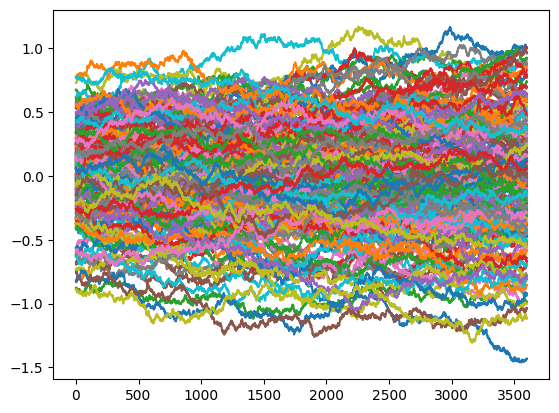

In [40]:
restart = data[-1]
dati = md.Ambiente(S0 = data[-1]).abm(numIt=200)
plt.plot(column_min_max_normalize(dati));

In [39]:
a = np.where(column_min_max_normalize(dati)<-0.75)
a

(array([   0,    0,    0, ..., 3600, 3600, 3600], dtype=int64),
 array([ 12,  31, 180, ..., 184, 185, 188], dtype=int64))

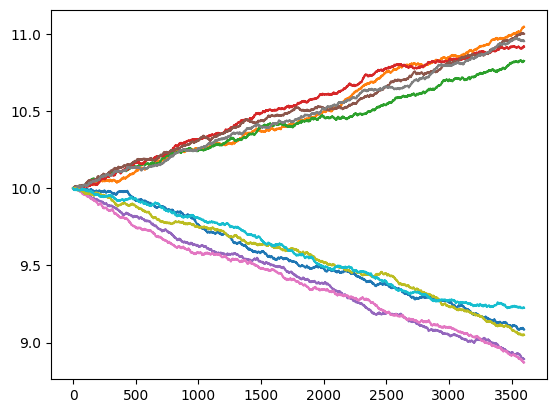

In [45]:
e = abmUD(numIt=10)
i = abm(numIt=10)
plt.plot(e);

In [94]:
e[-1,-1]

10.22501538590522

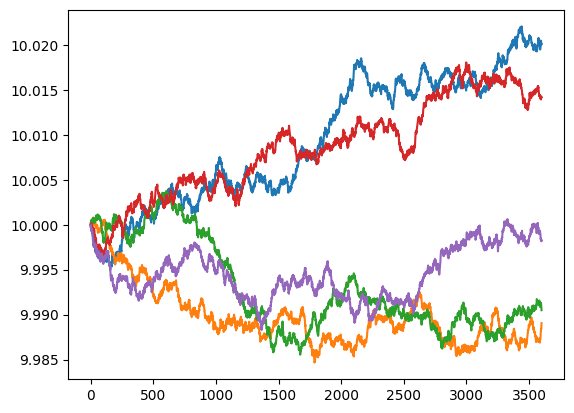

In [46]:
from sklearn import preprocessing as pre

scaler = pre.MinMaxScaler(feature_range=(-1, 1)).fit(abm(numIt=5))
tr = scaler.transform(abm(numIt=5))
#plt.plot(tr)
plt.plot(abm(numIt=5));

''

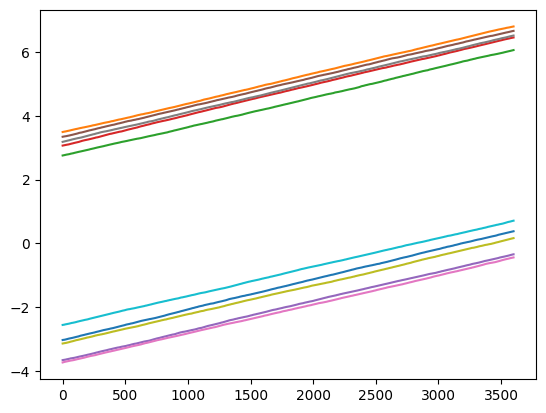

In [21]:
def column_min_max_normalize(matrix):
    """
    Normalizes a matrix of real numbers between 1 and -1 domain using min-max normalization.
    """
    # Find the minimum and maximum values for each column
    #scaler = pre.MinMaxScaler(feature_range=(-1, 1)).fit(matrix)
    min_vals = np.min(data)#np.min(matrix, axis=0)
    max_vals = np.max(data)#np.max(matrix, axis=0)
    range_vals = max_vals - min_vals
    
    # Perform column-wise min-max normalization
    normalized_matrix = 2 * (matrix - min_vals) / range_vals - 1
    
    return normalized_matrix

a = abm(numIt=10)
m = column_min_max_normalize(a)
plt.plot(m)
;

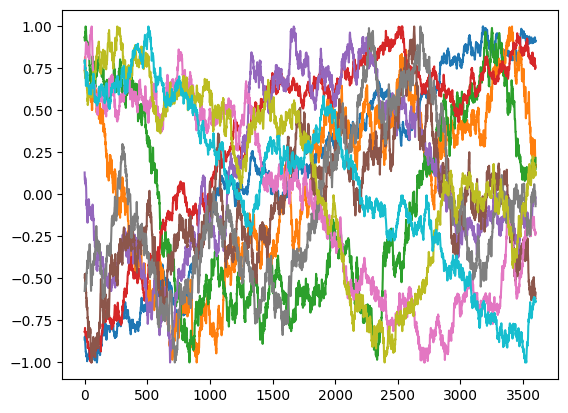

In [67]:
def abm2(seed = 14, numIt=1):
    '''
    returns a matrix of Arithmetic Brownian Motion paths
    '''
    N = 3600
    I = numIt
    dt= 1.0 / 3600
    X =np.zeros((N + 1, I), dtype=float)
    X[0] = abm(numIt=numIt)[-1,:numIt]
    np.random.seed(seed)
    step = 5
    for i in range(N):

        X[i + 1] = X[i] + 0.001 * dt + 0.01 * np.sqrt(dt) * np.random.standard_normal(I) 

    return X
ls = ['p'+str(i) for i in range(10)]
ls
df = pd.DataFrame(abm2(numIt=10),columns=ls)
df.
#plt.plot(column_min_max_normalize(abm2(numIt=10)));

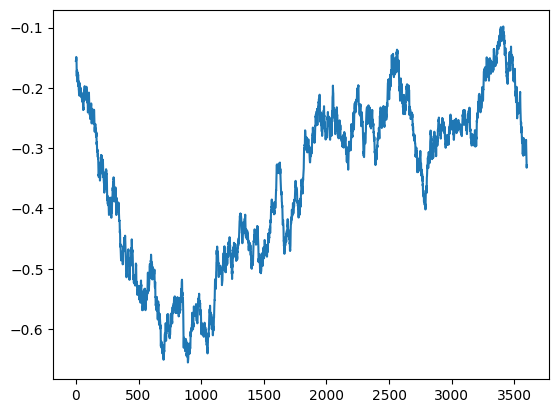

In [52]:
def price_normalise(price, min_p, max_p):
    middle_point = (max_p + min_p) / 2
    half_length = (max_p - min_p) / 2
    price = (price - middle_point) / half_length
    return price
#a[:,1]
p = price_normalise(a[:,1],min_p=np.min(a), max_p=np.max(a))
plt.plot(p)

In [ ]:
rew = [-0.5398404796243915, 0.22678548902693774, -0.49290587620588394, -0.06502867405338328, 0.03902619059027868, 1.5205412522957744, -0.8285104236254988, 0.7518395081989002, -0.5131100324904849, -0.07889002861209199, 0.8647766542394191, -0.37047600056689917, 0.27510989055509416, -0.24152118468299674, 0.08136436886578484, -0.38157466646631977, -0.7777629397296126, 1.2651969892029276, -0.09547356565438334, 0.3420382124706546, 0.41246647916054846, 0.24042794526791045, -0.6526322017549173, 0.026904858834582733, -0.2763083460624198, -0.05748034927619149, 0.4444118559973095, -0.04286162906688788, -0.010274364240417843, -0.014409413240266906, 0.6525802016217199, -0.090986054450047, -0.3561589820684735, -0.3004103315507183, 0.012781194787426767, -0.36092844918939043, -0.4887686948112767, 0.27531010891647406, -0.12780162580509938, 0.044601331542080694, -1.1517028464280323, 0.13571529957799613, 0.23350034848075044, -0.4746584949667992, -0.03323568087498023, -0.5285683353801741, -0.25844459150154014, 0.05128372403325431, 0.5732517205184493, -0.024234075723452264, 0.15267369696207359, 0.0, 0.0, 0.0, 0.0, -0.5459874417130828, 0.3280291970947733, -0.6473643890473199, -0.16881227796463513, 0.08583534120487529, -0.39462134068930405, 0.05928497942476861, -0.5410237926279872, 0.20924220736227062, 0.0347362436257135, 0.44449236768950445, 0.7889629536393518, -0.3359180132220475, 0.1633284506273591, -0.046911049698398335, -0.42372481686227637, 0.5457115922569183, 0.20288056399683957, 0.18905400559985017, -0.09840295443949312, -0.6781191349707518, 0.0, 0.0, 0.0, 0.0, 0.24562116768102682, -0.37257368847727623, -0.38415891652183415, 0.03083206209564537, -0.13095976809680762, -0.7912656692690571, 0.3089574533125917, -0.24455206509442953, 0.11899934565177449, 0.03346333505293169, -0.6509421445213116, -0.3884808336933475, 0.7442626073373567, 0.09181795250956051, -0.05422429075331979, 0.31512019167363875, 0.25133824985904085, -0.9696524400774781, 0.2490217329670326, -0.029137893329910253, 0.7727068140697796, -0.35874618265726377, 0.27796689817852793, 0.03789634334830949, -0.10903443589861249, -0.4007530829394485, -0.12637906187480677, -0.26399056172672924, -0.2506078345420444, -0.22517075395939182, -0.15465914774050132, -0.9716396087831267, -0.193038268158164, -0.337755838571952, 0.05292199528275636, -0.03495908341242701, 0.016881530012851566, -0.11292162228706062, -0.14691872944698803, -0.05218401265369644, 1.9914789886254525, 0.36650793183432484, 0.05225468913534609, 0.4782385037507555, 0.028994914224470224, 1.8354032642544404, 0.23081543069037383, -1.3339297312098173, 0.24367742172627882, -0.09551254055203753, 0.45157173580322735, -1.1934306582771683, 0.3455069470329497, -0.09005392470419976, -0.015596955548049777, 0.3341798798279141, -0.35494766438821523, -0.11947950291179546, 0.18196887986578955, 0.06306761696919753, 0.5084862911067408, 0.2968286092646421, 0.25642023344294396, 0.09493251830803606, -0.02698042267107875, 0.7106835494225135, 0.7200028538601133, 0.23667472371624182, 0.04917760255125069, 0.021418100703847195, -1.2679359269696437, 0.5498960395594409, -0.2864081069252668, 0.11843228650330276, 0.04305462358344645, 0.5603686530331543, -0.23891142213222252, -0.4894007840943221, 0.44370542932690626, 0.06559584430828462, -0.377609009062582, 0.016529853546646607, 0.1974495002595798, 0.07153413721500843, -0.06271809548744627, 0.6974595298974682, 0.33784310159211045, 0.023539427656359687, 0.1903253872300498, -0.0016945911042838004, 1.0895995982360729, -0.08626675877202833, -0.2217421484981319, 0.28029887715741886, -0.13962661993331762, -1.2378154668589936, 0.8122675418596368, -0.28875641813166764, -0.2478720256659023, 0.0036431781525474503, 0.6892801779615436, -0.029936019748002963, 0.7521883453316063, -0.054351034481605866, 0.07693693031040347, -2.0705072983316386, -0.5769934040180287, 0.3577351312491693, 0.10025797074857232, -0.14940672178409578, 0.2108597339530199, 0.4595347615048158, -0.3627794935731513, -0.7466417909498826, -0.10162596090569259, 0.1646039825971212, 0.15564321232070627, 0.19598087445918264, -0.509068197184409, -0.10835088216675996, -0.3395764340577121, -0.1836329506777533, -0.04192653275561255, 0.3523173398613106, -0.004135420204931021, -0.2647386271704792, 0.08656213267230563, 0.31051913928118186, -0.4809827654742119, 0.08294002654094484, -0.8587999196738632, -0.254284010536216, 0.19178848780291757, -0.06214165309344165, 0.0, -0.1365148185015664, -0.460021622812864, 1.5243714984263799, 0.4861329928093023, 0.08598164239003318, 1.551020426051756, -0.1664735298134721, -0.0144337532408919, 0.0, 0.0, -0.5199823795834105, 0.46194763061759714, 0.7142839045459034, -0.14842378537624032, -0.008885422539310526, -0.2641500949973364, 0.528393017560852, -0.6157712908482224, 0.11980061601206907, 0.06155968760508559, 0.19313779268267142, -0.697104287176485, 0.6687019543594308, -0.24606786297531535, 0.02687952180111475, 0.13304382273164592, 0.0, 0.0, 0.0, 0.0, 0.23029865789462262, -0.18497200050531315, 0.5956074630225757, 0.21062127132449954, -0.0067040186953144475, -0.9777332826635711, -0.2531062886612865, 0.12471539101614512, 0.29792644576303406, -0.04893532599454532, 1.5653595024980618, 0.8996773189735614, 0.05842655934113722, 0.10185283394714724, 0.006266756356608109, 0.6265883511025183, 1.406876264758613, -0.8967376424928029, 0.09708690998414063, 0.1685109389937202, -0.0248205401324618, -1.2476909749711695, 0.6176291517331924, 0.08110110695143258, -0.01005711695716611, -0.11745182457449169, 0.0, 0.0, 0.0, 0.0, -0.6996160512275331, 0.49670372205962227, -0.4888058766913541, -0.34953713792305285, -0.0446617245291362, 0.801660572004732, 0.0, 0.0, 0.0, 0.0, -0.37252498243959226, 0.13996177843945135, -0.4895378422873505, -0.18011973540286175, 0.06882499433862307, -0.34217000562251626, 0.7064149417214534, 0.12501455192601432, 0.74641407902157, -0.5120441091697947, 0.5475517996792574, 1.2524718786832085, 0.009938384660945725, 0.04501068602715714, -0.01267853376913269, -0.778750777385859, 1.0560466123769308, 0.4951802075527543, -0.3524368476089645, -0.1284509344137014, -1.2926827729090224, -0.26135373428938863, 1.115058137693476, 0.12300967458851303, 0.0, 0.36027124961942397, 0.1941871116944512, 0.14732413394691354, 0.18965062548632758, 0.03290358985911083, -0.6593361516365218, -0.6698412177085024, 0.4504862606427899, 0.22616473829810615, -0.0194468065069372, -0.7106099623293196, 0.5582432942012721, -0.20384380301660604, 0.08338974799901422, 0.19186467250404543, -0.267857246854337, 0.3325170452794879, -0.039822254913726075, -0.08722448840825259, 0.04429554424011607, -1.0099628894472281, -0.37195469681612453, 0.45276007394468676, -0.6977430580280803, 0.06025341698004833, 0.44183373992801045, 0.07416030795525035, -0.4769086743436686, -0.13293049786564554, -0.11929615089534765, 0.39970297494681195, -1.1731145603002109, -0.09033438864117233, 0.1038111021228928, 0.010896764464047796, 0.2304102455141602, -0.8355910991759261, 0.2138627134307859, 0.08091174663356529, 0.12473328387353227, -0.16821074454350501, -0.5951161407028477, 0.4193571055677806, -0.1705517936363954, 0.09660349191291866, 0.6652133495163041, 0.15354719136816739, -1.0514775180041531, -0.49029364062257663, -0.0026956243488107357, 0.4882679721670627, -1.0311795747528796, 0.2415098597902199, -0.24447090642119754, -0.03789609523383447, -0.4866137504764209, -0.5976773319720917, 0.30491044699231573, -0.12264429182133903, 0.07990693288355946, -0.5931887627360406, -0.26753859643918, 0.20032864081139679, 0.10295574045627363, 0.011224632261842102, 0.179512246565502, -1.0047151427505858, 0.5604011632562521, -0.08157337966788934, 0.1697313458342602, 1.2629136823276383, 1.249000716851869, 0.3058090055024913, 0.3440247015942081, -0.10739245691227034, -0.689040496911051, 0.1101805988413103, 0.03928518343899706, -0.33740577295741014, -0.22740084647813263, 0.16392528895053454, -0.08380096345299945, 0.7120414213112451, -0.3972127206990196, -0.067125328146252, 0.6154137469095347, 0.7211353235707142, -0.1423126978268596, 0.1113485314105931, -0.03450148131860025, -0.06695330189653606, -0.7240953447273754, -0.05249376628983521, -0.06264677847389107, -0.060609666462583235, -1.7978424170947938, -0.40620058008091026, -0.843622263201334, 0.24949575668364934, 0.0481528805327794, -0.09984983096888529, -0.42931235289133446, -0.50116871754333, 0.16333646874139543, 0.08102982840372218, -0.7783627986830074, -0.008561006878652912, -0.0785911170315991, 0.11021315657431757, -0.11092175426151894, 1.30865467189623, -0.5957443429366449, 1.590993849900454, 0.4557417421399237, 0.017252383194419706, 1.8492862891199602, 1.0176872423880368, 0.6087690960037058, -0.33805387731655157, 0.04713509005893941, -0.00041594040804310284, -0.653595995378622, -0.8775611941236574, -0.3078546831888861, -0.41368058647899814, 0.4479921983062977, -0.31540565830909434, 0.6772738052264757, -0.24641670586730358, -0.025591406378123894, 0.7419939678270498, 0.48827040800033317, 0.3847505180652061, 0.2549317641088302, -0.08353059188101478, 2.0332451514800742, 0.05815133369782799, 0.07779204597547101, 0.294680983079654, 0.10454750523340035, -0.5591254946824132, 1.553249299750241, 0.9187656509807823, 0.21352400572419342, -0.019481475585341666, 1.1179793230937525, -1.644376315733455, -0.38269261939769883, -0.5626375769608096, -0.054429511345692176, -1.8767635312040114, -0.4489296184553538, 0.0005875888161381605, -0.15483007981309177, 0.0, -0.19852754219936586, 0.5959403510848381, 0.8196241155626115, 0.26273112069287957, 0.0738492978188558, -0.029624300261292837, 0.480721146330576, -0.05196328087162012, -0.12171750926358763, 0.06617162096394603, -0.49381978863048254, -1.0714752423654204, -0.34097896772895386, -0.4164529255793226, 0.0429058418991334, -1.521553849747031, 0.4856928928707911, -0.6074135418244712, 0.09812766574957035, 0.018109774603318137, -1.3789332101304776, 0.0, 0.0, 0.0, 0.0, 0.5048539732155781, -0.9374536537015946, -0.1448070162349436, 0.26527497824749996, 0.058686112033426455, 0.21185750365420303, 0.7520286595407839, -0.2630230511913902, -0.009305980776428708, -0.028550041274620967, 0.9672935626228882, -0.8658670528272792, -0.41618513180997696, 0.21603036822202065, 0.023914159088518898, 1.0805075216536106, 0.13638723073372272, -0.3764667631606302, -0.15442926749287147, 0.2790502933435471, -0.562969046979595, -0.05453697700933415, 0.043683314683689106, -0.21159953764559064, -0.0048764114031230295, 0.48748588884825617, -0.4218801007524138, -0.43071393510743466, -0.059071829922194716, -0.20418781906834724, -0.9591993313152013, -1.5169255595718414, 0.00971690510971358, -0.06656932204530754, 0.04103765875785302, -1.5214884521283774, -0.3414542486936176, -0.17346949852764332, -0.23629470250313345, 0.1506000383381348, -1.6262051619831155, -0.07558604174009428, -0.0870741541600726, -0.452748427117366, -0.0872385210713186, -0.14451941717258757, -0.32090233594484197, 0.6182400164896322, -0.4352076213087876, 0.2373138834465678, -0.2756497567823784, -0.024231800102335728, -0.16752574025645642, 0.2684038083874025, -0.018767495174960222, -0.5918058348121136, 1.1727385990693604, 0.056625977177510146, 0.02633410547747339, 0.09292702221771147, -0.17738657504851868, 0.7231075618539009, 0.37956789034537075, 0.47246090826993054, -0.07884043574504723, -0.00392529605003605, 1.1279721032032768, 0.4858578121022222, -0.14151207503525204, -0.09270704215715962, -1.282296242250652, -0.33181917927852217, 0.25837366734215966, 0.055801231464872605, -0.07499403633528032, -0.32902627249185923, 0.8860595082055575, -0.3094163183054095, 0.05801882638711443, 0.0378045572308242, -0.5139021097274685, 0.0, 0.0, 0.0, 0.0, 0.06612595643318059, -0.5016714448933748, 0.22789281832416558, -0.029887321771252553, -0.096974626277453, -1.0484405891765747, 0.7879801271714206, 0.2859072309972562, 0.3494235786103275, -0.022013997418692383, -0.9614631256769144, 0.21036346394958727, 0.4823771403544684, -0.156398896365278, -0.02976447192991909, 2.0372355279482726, 0.12915074968599255, -0.5246407820750989, 0.43702565619168826, -0.0578194543278911, 1.1731958911289604, 0.9255026880204843, 0.616787765572625, -0.19407581296433243, -0.0462419593038719, 0.7315301768472642, 0.8297160203618599, 0.42512681281056913, -0.3745155899535752, 0.022206093295994135, -2.020080228827623, 0.8895411946969617, -0.024695081927046062, -0.08851364295324439, 0.04437913082085066, -0.6365020433574249, 1.3756917130477102, -0.3935284380245564, -0.0006956668630128688, -0.00018775730403224695, 0.1972537403592006, -1.3927334424003588, 0.941583627300145, 0.16101962214339335, -0.07506369388833142, 0.4524558319197989, -1.4165227106346374, 0.5188720210093748, -0.011294462293364511, -0.06498887128667197, 0.22032101477382726, -0.0025790059814018744, 0.1223463650293737, -0.012042395705808673, -0.010185897958975773, 1.3650002745730931, -0.11242327039592728, -0.4347238563071419, -0.22948372915794146, 0.06199154574755623, 1.0629437446324952, -0.6045539322095305, 0.7304295145192876, 0.014246522581435907, 0.05336605687852648, -0.7481949059956928, 0.09868304048784537, -0.4658014475867064, 0.11840641041789254, -0.12680539374276156, -0.46765645580358717, 1.346412516416865, -0.4390581267580187, 0.4873451084605825, 0.1696496995959045, -0.6869881316198588, 0.4639128841509154, -0.3448361769563273, 0.09713608242382546, -0.005317143336541135, 1.050872284737929, -0.5553010853612934, -0.055969235661695683, -0.20196187081751488, -0.0482988754084284, -1.0413120811129268, -0.6347871381932062, -0.001270550813534426, 0.2522331305140722, -0.03519438605944154, -0.10928907845697325, -0.03323773922510692, 0.39736157307845, 0.1328773941536023, -0.0017277903104880184, -0.49404639149480695, -0.8479603328511918, 0.407257678230664, -0.14262487995172063, 0.042163186371331596, -0.5764909812614886, 0.10912207377084938, 0.4752130529527777, 0.0013360113408985002, 0.09032838761968129, -0.6490878119623267, -0.5629506655755758, -0.14349507614777143, 0.07726748205482865, 0.34562529637781053, -0.5273781112045394, 0.37854865353651806, -0.28676025111143666, -0.1387528431644368, 0.12140324363852147, 0.6223601666314724, -0.6786061721074231, 0.2387749029179119, -0.06793464735673943, 0.14127607935707834, 0.8341318714383971, 1.313533282015837, 0.6897460505705323, 0.020711522709953155, 0.09944979225025669, -0.11203490686503349, 0.7958269323583331, 0.42949795674406854, -0.5358958806258826, -0.15991533846522882, -0.25016173957420273, -0.8519537969581823, 0.09311057987282724, 0.10950534258091883, -0.004867833733345049, 0.645548514960739, 0.34455706747895354, 0.037656921644352595, 0.012813034539293102, -0.05493896982575664, 0.5164553240215932, -0.2527930638191006, 0.31748506261643494, -0.4049162133085029, 0.01861557349604987, 0.780733622992412, -0.40395894183798925, -0.2907893339436344, 0.5000778038315244, -0.3104796674594886, 0.1459261975901612, -1.5708355036536377, 0.5971335248729698, 0.22151041337848726, 0.06377827659441178, 0.5578810739395462, -0.8513895892935694, -0.03006785178516223, 0.16808088718564407, -0.007577757114057379, -0.4969818025732533, 0.225504056038776, -0.37465143519759786, 0.7124372416941019, -0.14680533516483826, 0.8897468397929479, 0.6586715093637865, -0.21395344783302572, 0.24974820040384663, -0.003744800540910006, -0.27305573375699876, -1.1338676700877164, -0.45531231212817586, 0.09767317652398677, -0.044255700251961745, -0.36156802168094304, -0.23106558905797148, 0.3850301275638055, 0.5181235599947625, 0.23522871397520143, 0.2187618180484201, -1.1980994033660504, -0.20288962020428092, -0.2315206219177383, 0.06895070907145893, -1.1541352420111812, -0.6561976112296057, 0.04790951696352235, 0.2610776334585803, 0.08532590936708022, 1.0433683930247355, -0.1129064511634331, -0.15481055623982587, -0.3098373842441352, 0.2866738043855439, 0.8419418623561664, 0.11943996704308779, 0.04427623760207026, -0.4982888162923864, -0.044991236161847026, 0.6259802098559704, -0.5571216553824925, 0.3783779701619099, 0.13161550932785587, -0.01830261689029176, 1.4930217921980997, -0.9379415308061108, 0.9857311812898893, -0.16160727744937342, -0.10632930067978703, 0.33019928295928547, -0.6969104843907667, -0.2406455060260107, -0.2739074150245629, 0.06738980431346249, -0.06147055923444156, 0.11404616803012255, -0.7341007504186062, 0.251606184411921, -0.09404770441269711, 2.0272783604666906, 0.2907733851710176, -0.10325577310197466, -0.09108001593854631, -0.35743769392395397, -1.7356827008492821, 0.6193640114439134, 0.5738713457326635, 0.04949686922133174, -0.038947600465962455, -0.6797730379615193, 0.5280267494170513, -0.3445921206578012, -0.2951715384074574, -0.07017923273360785, -1.336841413208618, 1.0636752966316976, 0.18256966543374661, -0.5881807832264726, -0.013273096065398319, 0.900471495104344, 0.2250123465303732, -0.8448108618673921, -0.6824413875032269, 0.29613330810195276, -0.3936947470846277, -0.5596109914941111, 0.13298462827332103, -0.3003177357399361, -0.050065164550642055, -0.44358391032535205, 0.5922031486891276, -0.16084234183806065, -0.6850929540633232, -0.06386583924431781, 0.0061094641078383305, 0.3564953859831225, -0.15541042687296683, -0.0586291196895244, -0.16188818081397427, -1.0124790697804007, -0.3535399499350486, -0.5926117190899391, -0.03305712485675399, -0.02511978197660445, -0.40798139474055034, 0.39374056835377813, 0.5460386877574256, 0.22654020523238536, 0.10132427169001175, 0.16480978654263215, -0.2685445714579187, 0.4191483659782399, 0.6132468040618345, -0.053999982077993613, 0.14787544522119783, 1.3933747916938009, -0.005771960380735146, -0.07563540734023998, -0.03561140776677627, -1.0038440485860343, 0.2963571591824493, -0.2760720599366726, -0.14866603317232222, 0.006479971861701962, 0.5702508577809026, 0.11234006749226311, -0.2732353815306017, -0.04449092429548032, 0.16325416740428103, 0.27632957257712953, 1.0534446731932416, -0.9095345282357014, 0.6558894648824211, 0.01731175337947319, 0.7973410044648099, -0.3774268099611319, -0.42059701885139866, 0.1251624564817299, -0.02878785215152904, -1.501505013586353, 0.42862073557807423, 0.09298649683756079, -0.20977472211867815, -0.004331950807928926, 1.5795966632240694, -0.8107037358746222, 0.5417514546423039, -0.26475052968980967, -0.11926512836685149, 0.6218649106227347, -0.7867572139804934, 0.26122415662846576, 0.5533917562685116, -0.1399358956602252, 0.5051442556880316, -0.3107439986063035, 0.07222892212489418, 0.2912304369721327, 0.07281393084422658, -0.0734053419795262, 0.5522577881665856, -0.20489880222951495, 0.22471528350798037, -0.05674151014854635, -0.35243560816583835, -1.5829853100863693, -1.119828518652218, -0.3265324584372752, -0.14913101690395994, -1.320478468293908, 0.255981957517156, -0.24216589027808272, -0.0045535883235205046, 0.02511230242689176, 0.07031512592847071, 0.35539106397801407, 0.8397894519486299, -0.1343052343937976, 0.24156995493696456, -0.9087487456320414, -0.5988772671054049, 0.2308524043139376, -0.05454814620474329, 0.09138179285020283, 0.5458458298730781, 0.5224732849452084, -0.01721424756993545, 0.1200719300219222, 0.0771006582791711, 1.5868198290922622, 1.1294241579396285, 0.487763227504283, -0.4758806970143872, -0.0369249884489297, -0.6046768479916695, 0.3455573006233557, -0.3715668265399475, 0.040381803544132386, -0.014927958937193618, 0.6499628771746931, -0.8118382457284044, -0.36515139399852137, 0.1878640951556765, -0.0589026061240252, -0.7312941881080887, -0.6969732300511073, 0.701154544138567, -0.14957217720550742, -0.15554660583826888, -0.6396572765823243, 0.0, 0.0, 0.0, 0.0, 0.252987168233152, 0.3907357888726461, 1.138425977992945, 0.26530695848568014, 0.19133080761465263, 0.5612734645986723, 0.6400699013732024, -0.24740109855262388, 0.13170153432663942, -0.06995580778643148, -0.6416074769887953, -0.0733718840873445, 0.05262239712412873, -0.033448940924343355, 0.02461410038538266, -1.1751114045696962, 0.0, 0.0, 0.0, 0.0, 1.0435969483942702, -0.04990507857751437, 0.4808792722506618, -0.22650771027053665, 0.048687424316205125, -0.7648120373235312, 1.1903888699025713, 0.13443973261440872, -0.009204481890986618, 0.010863949420862589, -0.8824999124950496, 0.07858751124488181, 0.5321716790008174, -0.17021444553193077, -0.012561004789327593, 0.1111553979805158, -0.9262290888954459, 0.12479601299382938, -0.25754529974118406, 0.050298565072120674, 0.5587612945183847, -0.43963240037350865, -0.5118392514427719, -0.16789782920507293, 0.031182979607807228, 0.951558333383021, 0.37948593589842716, -0.49559969052060787, -0.0593108059751565, 0.044521841817746384, -0.4801103931180414, -0.45990446998562506, -0.5942724260803882, -0.3301467374340131, 0.14587049757907586, 0.27374186353540186, -0.28777308228429077, 0.3515844782790043, -0.05579165984795814, 0.002386071707210833, -0.6809344456550758, -0.980625288961947, 1.494361318840248, -0.00918168026112163, 0.05493480874790626, 0.4709303658977954, 0.2777399869197232, -0.1587875823941913, 0.2153276053708526, -0.02414516203098381, -0.7167758122061594, -0.0031261621738254445, 0.017058953057446147, 0.07892723930298223, 0.039007807223799276, -1.0599998858437785, 0.14909916177415117, -0.16562789842636916, 0.02172904838247071, 0.0, -0.5848247035698221, 0.5893703570960009, 0.2710136432327924, -0.02570846316904227, 0.04006181632521663, 2.1361029643525016, -0.3840631322278644, 0.5416717280209109, -0.4895744147763312, 0.15417117462829674, -0.9986119504139012, -0.01711522733594433, -0.23507233050816911, -0.07489966140442277, -0.07590159875557859, -1.0333914815360463, 1.4611582085373997, 0.7023157651873712, -0.4275131212205186, 0.1275581017789024, -1.023201131097749, 0.0, 0.0, 0.0, 0.0, 1.4091474711604703, 0.16259593386764204, 0.26383099254729303, -0.17705769360681384, 0.06184491916179815, -0.4267973201466222, -0.06102547922888879, 0.3968711726638159, 0.19521939696848145, 0.12237495486496652, -0.4525337420472988, 0.4848848933739646, -0.0009463197560466898, -0.3675751614946257, 0.13257887945785424, -0.0031248401444536264, -1.2005872439702896, -0.0016449527922137647, 0.0, 0.0, -0.3845004206371143, -1.1164894447966323, 0.2741728317940879, 0.1382825725045912, 0.0655288993381036, 0.2231271760120225, -1.0030853786150378, 0.5493488076491613, -0.25536379028612793, 0.0, -0.6659952850646247, 0.9016455249755375, -0.5727226146887199, -0.4526874065210077, -0.19962492016142838, 0.4426263205647226, -0.014690312934304749, -0.1467621229018925, 0.5153262645770111, -0.024203904439015787, 0.9057549459411567, -0.6950272537030875, -0.15496608920199956, 0.35148488223481195, 0.017167608199055377, 1.9131643593453311, 0.4081902746593589, 0.21680022086465697, -0.024862930814740794, -0.08546165588739106, -1.3295895580646213, 0.43307086959790037, 0.8229573123287564, 0.38386198528570126, 0.12141278012697976, -0.20578949444521907, 0.6651707429058937, 0.07720099397545505, 0.0561664008100798, 0.1535047378377753, -0.5145060051309239, 0.7422552166312316, 1.255668652866297, -0.13162210737570698, -0.06374900111804879, -0.46984042816423505, 0.31737595803648927, -0.012494780075139546, 0.03229394679079853, -0.11295311222379754, 1.2683642255871845, -0.6646863225289773, -0.13652352611547294, -0.35952993116546617, 0.07651946178763433, 0.2480889793595813, -0.5579578487458056, -0.1638299321726818, -0.17745479965754057, -0.05961903602017783, -0.03879570872879075, -0.28685874205908857, -0.7617068235702881, 0.1541212369883862, -0.04871480766443167, 0.747464677998308, 0.31362786521909836, 0.05350294696913238, -0.1634770086893682, -0.0669214250060452, -1.2615231681223142, 0.7964417004899932, -0.6153305799467893, 0.36661740716415314, 0.13321037328722163, -0.5650075990314094, 0.34967045131752034, 0.2695902154719905, 0.07474192991299317, 0.07145145099600889, 0.7303498122822256, 0.07282867570906848, -0.2250065908678724, -0.14547772426311997, -0.09243988807088303, -0.7280686448466914, 0.46051104525212905, 0.16985742403724877, 0.0010868884216091094, -0.01688871165896549, -0.6376157657953371, 0.3629695820811947, 0.005801962550749273, 0.12961310430830666, 0.12544468984438156, -0.694991577437739, 0.14981303535598947, 0.09919651030955422, 0.3907153950719674, 0.12039491570683294, -0.3540162487787346, -0.1662559918882398, -0.5329061233800062, -0.007640657102996605, -0.11114515356147663, 0.03575935557683799, -0.603521632155713, 0.8774152230268025, 0.2697582265886679, 0.1664908977090828, -0.4202989012426902, -0.349394933508492, 0.10275515803159115, -0.030244764154466, 0.1842748421590869, -0.02446450598113961, 0.8904274716925865, 1.1956693148746012, 0.22711872410913778, -0.03423336754817581, 0.6993614487228087, -0.5521340963308005, -0.8382833961294603, 0.20162391825479872, -0.034938765836670334, 0.7629233198073404, 0.9098536539864479, -0.24199467642749298, -0.11773750736120753, 0.0017087996315128771, -1.1769994574138936, -0.3895205564926558, 0.07701169325541155, 0.4193645490696616, -0.09261179864508963, -1.7487024859251945, -0.5547915073456177, -0.40633150353341796, 0.31483336997625366, 0.08168064848883153, -0.8053084117631022, 0.599739904759715, -0.7642392567365489, 0.39681067992501945, 0.10630512943237783, -0.3956302502423049, 0.2341671724920892, -0.12211263069763474, 0.5648315211370162, -0.07896060007344524, 0.06240753831949464, 1.5860434477704972, -0.46892991855646865, -0.0709721810386825, -0.11301359131988248, -0.9078862114242321, 0.5842994291068714, 0.304072641677805, 0.006095856160270972, -0.0318767625341858, -0.12287532810935607, 0.545251253682809, -1.5098604801216078, 1.1910827424177324, -0.18941972401079885, 0.20450613978090398, -0.03681651704228481, -0.23534705932996677, 0.025223094775645837, 0.044425877627778894, 0.6536362931486722, 0.622293045160563, 0.6280194031800723, -0.1717787717829312, -0.07712671223163677]

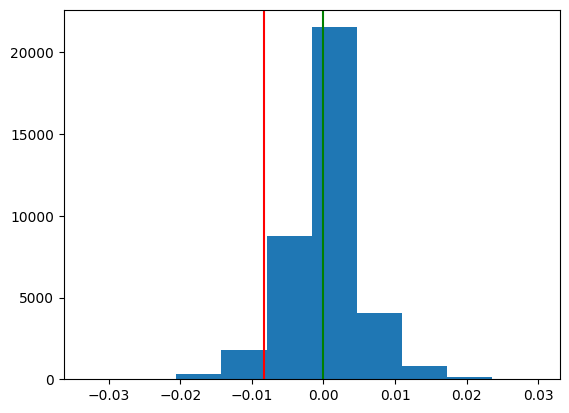

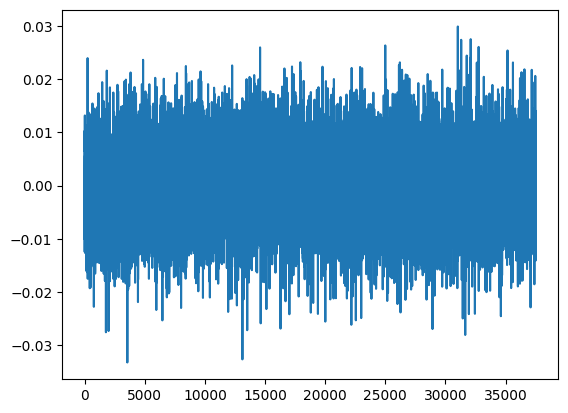

In [63]:
import matplotlib.pyplot as plt
r =np.asarray(rew)/100
plt.hist(r)
plt.axvline((-20*10 + np.sum(np.array([4,4,4,4,4])*np.array([10, 9.86, 9.907, 9.902,9.917]).T))/(20*10), color= 'r')
plt.axvline(r.mean(), color= 'g')
plt.show()
plt.plot(r);

In [47]:
np.sum(np.array([4,4,4,4,4])*np.array([10, 9.86, 9.907, 9.902,9.917]).T)

198.344

In [ ]:
,average PandL = [-1.9101046691013675e-07] , PandL sd =  [0.00612369390789348]
 , med_act  = [5, 6, 2, 5, 2] , act sd =  [3.51713876 2.47501247 1.8908743  1.97788983 1.89265755]
 , rew ave = [-0.03904243  0.00682862  0.04371005  0.00114143  0.00016767] , rew sd = [0.84434788 0.65915686 0.49387869 0.28305071 0.10945395]
 , average action chosen from train = [4.042 4.057 3.891 4.022 3.988]
 , ave act test = [4.596 4.104 3.836 3.74  3.724] , sd test act = [3.51713876 2.47501247 1.8908743  1.97788983 1.89265755]
 , epsilon = 0.9752487531218751
 --- 2.727686274051666 minutes ---

In [78]:
#"C:\Users\macri\Desktop\ennesima\re.npy"
rew = np.load("C:/Users/macri/Desktop/a_grafici/Q_T/0_giusto!/re.npy")#C:\Users\macri\Desktop\0.001updn
ac = np.load("C:/Users/macri/Desktop/0.001updn/ac.npy")
ql = np.load("C:/Users/macri/Desktop/0.001updn/ql.npy")#C:\Users\macri\Desktop\a_grafici\Q_T\0_giusto!
#plt.hist(4000-ac, bins=100);
#plt.hist((4000-ql)/4000, bins=50);
rew[-500:].mean()

0.025202956329459795

In [53]:
((ac.reshape(-1,5).sum(1)-20000)/20000 -(ql.reshape(-1,5).sum(1)-20000)/20000).mean()
#plt.hist((ac.reshape(-1,5).sum(1)-20000)/20000 -(ql.reshape(-1,5).sum(1)-20000)/20000);

4.138307168769616e-05

In [70]:
((ac-4000)/4000).mean()

-0.001241908029700151

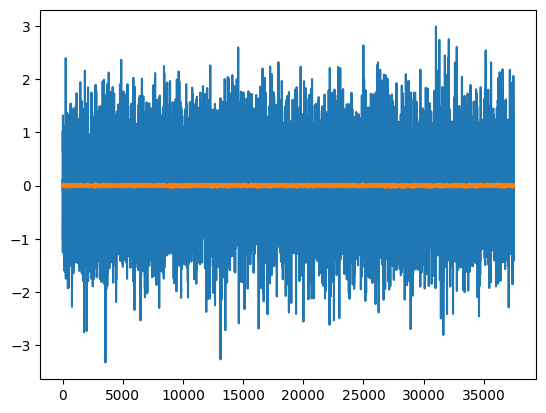

In [69]:

plt.plot(rew)
plt.plot((ac-4000)/4000);

In [9]:
rew[-1]

0.08250671034944318

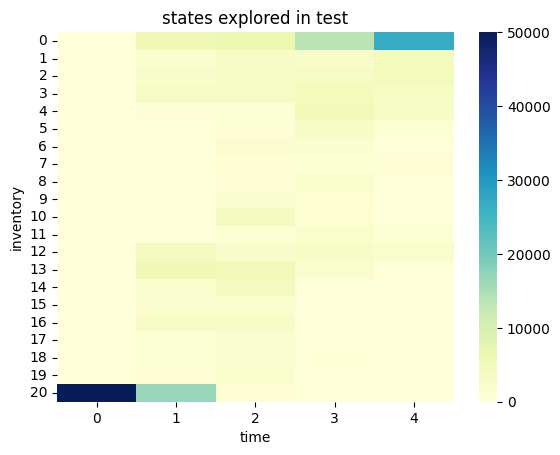

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
stati = np.load("C:/Users/macri/Desktop/ennesima/stati.npy")

def heat_test(stati):
    a=stati
    z=np.zeros((21,5))
    for i in range(21): #mx 20
        for ii in range(5): #mx 5
            for iii in range(len(a[:])):
                if i == a[:,0][iii] and ii == a[:,1][iii]:
                    z[int(i),int(ii)] += a[iii,2]

    sns.heatmap(z, cmap="YlGnBu" )
    plt.title('states explored in test')
    plt.xlabel('time')
    plt.ylabel('inventory')
    plt.show()
heat_test(stati)

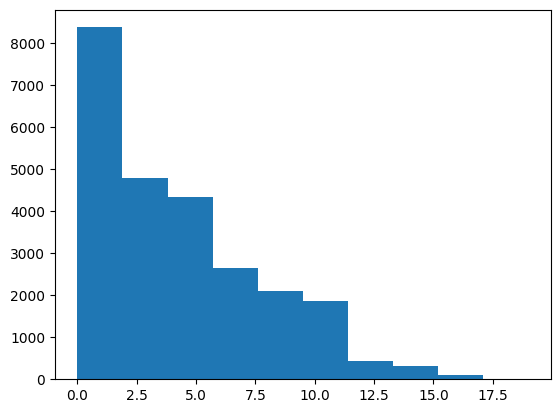

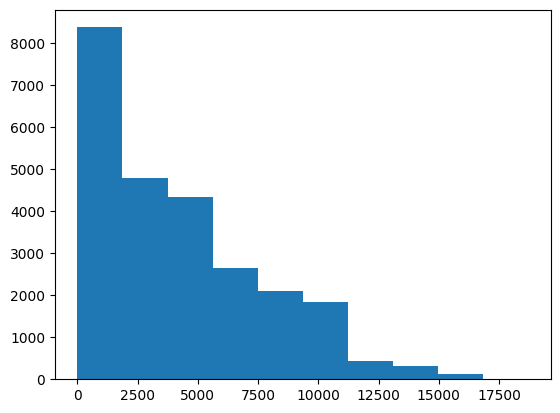

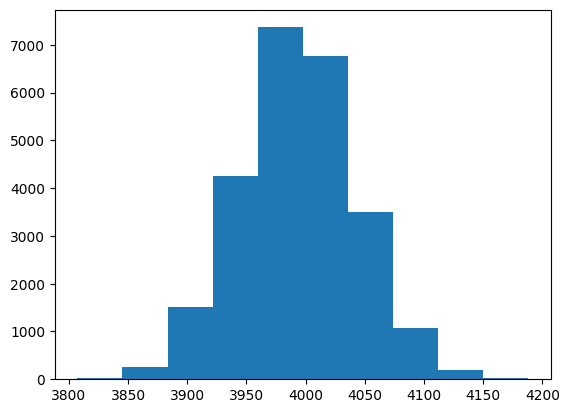

In [114]:
az = np.load("C:/Users/macri/Desktop/-0.001updn/azioni.npy") #"C:\Users\macri\Desktop\-0.001updn\azioni.npy"
ql = np.load("C:/Users/macri/Desktop/-0.001updn/ql.npy")
ac = np.load("C:/Users/macri/Desktop/-0.001updn/ac.npy")
a = np.asarray(az)
plt.hist(a)
plt.show()
plt.hist(ql)
plt.show()
plt.hist(ac);

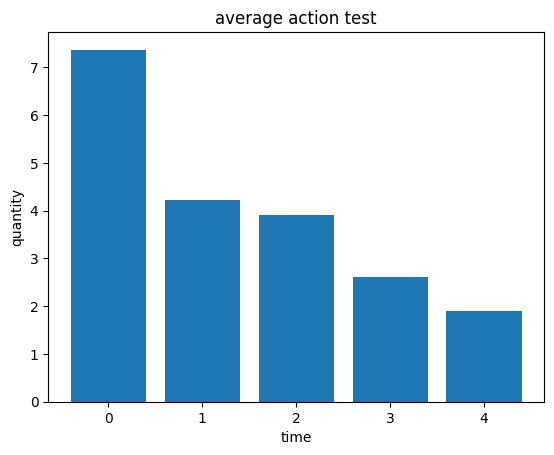

In [45]:
ranger = np.arange(0,5)
plt.bar(ranger, [7.368   ,   4.2276  ,   3.89946667, 2.6073  ,   1.89766667])
plt.title('average action test')
plt.xlabel('time')
plt.ylabel('quantity')
plt.show()

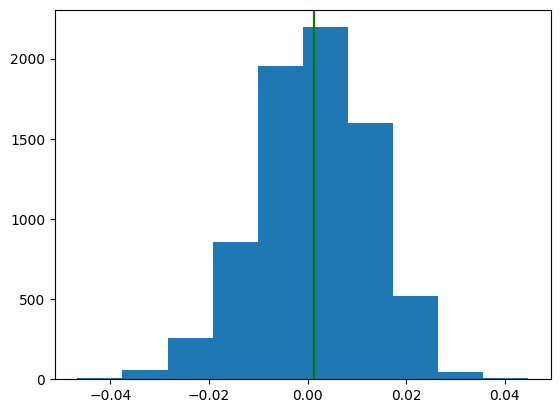

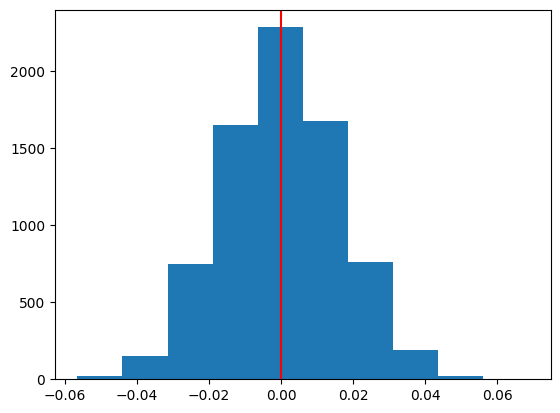

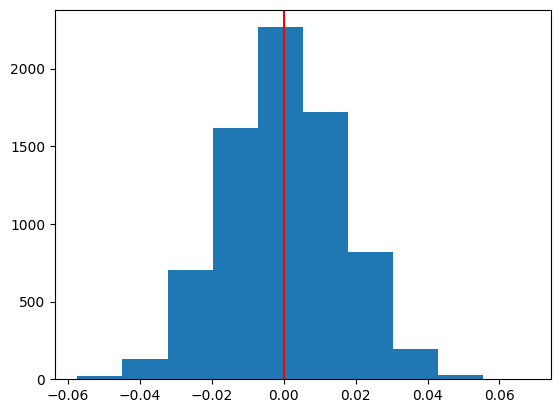

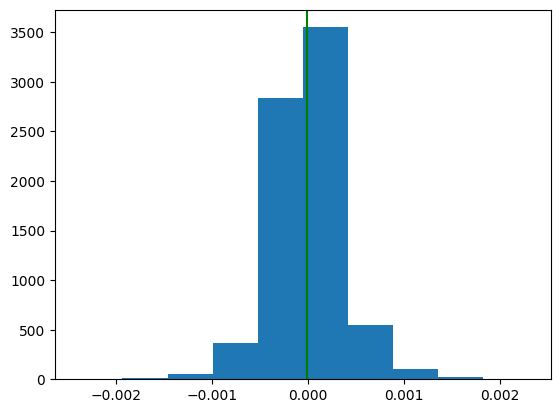

In [19]:
plt.hist((4_000-ql.reshape(-1,5).sum(axis = 1)/5)/4_000, bins = 10)
plt.axvline((4_000 - ac.reshape(-1,5).sum(axis = 1).mean()/5)/4_000, color = 'r')
plt.axvline((4_000 - ql.reshape(-1,5).sum(axis = 1).mean()/5)/4_000, color = 'g')
plt.show()
plt.hist(np.diff(ac.reshape(-1,5).sum(axis = 1))/20_000, bins = 10) # ora confronta riga per riga
plt.axvline( (np.diff(ac.reshape(-1,5).sum(axis = 1))/20_000).mean(), color = 'r')
plt.show()
plt.hist(np.diff(ql.reshape(-1,5).sum(axis = 1))/20_000, bins = 10) # ora confronta riga per riga
plt.axvline( (np.diff(ql.reshape(-1,5).sum(axis = 1))/20_000).mean(), color = 'r')
plt.show()
plt.hist(((ql.reshape(-1,5).sum(axis = 1) - ac.reshape(-1,5).sum(axis = 1)) / ac.reshape(-1,5).sum(axis = 1))/5, bins = 10)
plt.axvline((((ql.reshape(-1,5).sum(axis = 1) - ac.reshape(-1,5).sum(axis = 1)) / ac.reshape(-1,5).sum(axis = 1))/5).mean(), color = 'g')
plt.show()

In [115]:
mu = (((ql.reshape(-1,5).sum(axis = 1) - ac.reshape(-1,5).sum(axis = 1)) / ac.reshape(-1,5).sum(axis = 1))).mean()*100
si = (((ql.reshape(-1,5).sum(axis = 1) - ac.reshape(-1,5).sum(axis = 1)) / ac.reshape(-1,5).sum(axis = 1))).std()
print('diff IS ave = ', mu,'%' ,'\n', 'diff IS sd = ', si)

diff IS ave =  -0.003252002437788242 % 
 diff IS sd =  0.00172440027363829


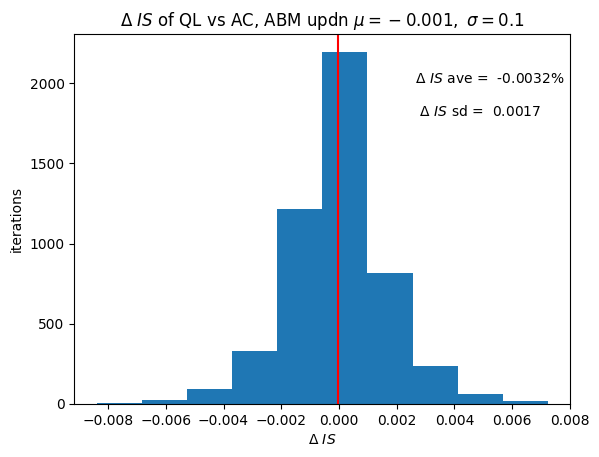

In [121]:
plt.hist((((ql.reshape(-1,5).sum(axis = 1) - ac.reshape(-1,5).sum(axis = 1)) / ac.reshape(-1,5).sum(axis = 1))))
plt.axvline((((ql.reshape(-1,5).sum(axis = 1) - ac.reshape(-1,5).sum(axis = 1)) / ac.reshape(-1,5).sum(axis = 1))).mean(), color = 'r')
plt.title('$\Delta \, \, IS$ of QL vs AC, ABM updn $\mu=-0.001,\,\, \sigma=0.1$')
plt.ylabel('iterations')
plt.xlabel('$\Delta \,\, IS$')
plt.annotate(text=' $\Delta \,\, IS$ ave =  -0.0032%', xy = [0.0025,2_000])
plt.annotate(text='  $\Delta \,\, IS$ sd =  0.0017', xy = [0.0025,1_800])
plt.show()

(42765, 62500.0)

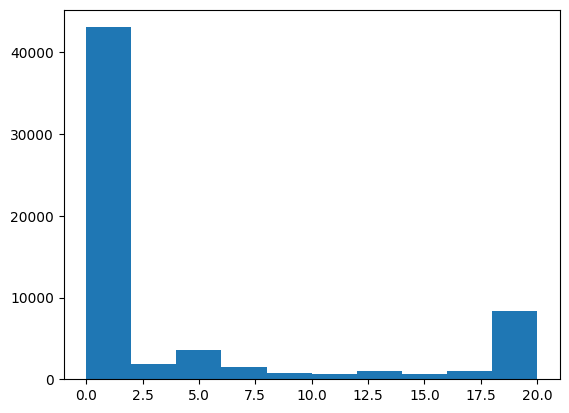

In [57]:
azi = np.load("C:/Users/macri/Desktop/a_grafici/Q_T/0/azioni.npy")
plt.hist(azi)
len(azi)-np.count_nonzero(azi) , 50_000*0.25*5

In [62]:
re= azi.reshape(-1,5)
re[10:20]

array([[ 3, 17,  0,  0,  0],
       [ 6,  5,  9,  0,  0],
       [ 5,  4, 11,  0,  0],
       [ 6,  5,  9,  0,  0],
       [ 0, 20,  0,  0,  0],
       [ 0,  6, 14,  0,  0],
       [ 7, 13,  0,  0,  0],
       [ 0, 20,  0,  0,  0],
       [ 0, 20,  0,  0,  0],
       [ 0,  3, 17,  0,  0]])

In [22]:
(((ql.reshape(-1,5).sum(axis = 1) - ac.reshape(-1,5).sum(axis = 1)) / ac.reshape(-1,5).sum(axis = 1))).mean()*100

0.0029468484443883553

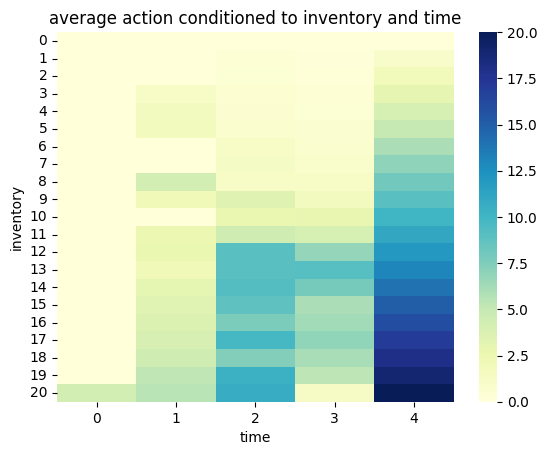

In [79]:
import pandas as pd
import seaborn as sns
def plot_heat(states):
    # Get the x, y, and z values
    arr = np.asarray(states)
    x = arr[:,1]
    y = arr[:,0]
    zz = arr[:,2]
    z = np.zeros((21,5))
    ds = pd.DataFrame(arr,columns=['Q', 'T', 'p', 'x'])
    h = ds.groupby(['Q','T']).mean().reset_index()
    a = h.to_numpy()
    for i in range(21): #mx 20
        for ii in range(5): #mx 5
            for iii in range(len(a[:])):
                if i == a[:,0][iii] and ii == a[:,1][iii]:
                    z[int(i),int(ii)] =  a[iii,3]
    # Create the heatmap
    #plt.hist2d(x, y, weights = zz, cmap='hot')# bins=10,
    ## Add a colorbar
    #plt.colorbar()
    ## Add labels and a title
    #plt.xlabel('Q')
    #plt.ylabel('T')
    #plt.title('Heatmap states from test')
    #plt.show()
    sns.heatmap(z,  cmap="YlGnBu" )
    plt.title('average action conditioned to inventory and time')
    plt.xlabel('time')
    plt.ylabel('inventory')
    plt.show()
 #"C:/Users/macri/Desktop/ennesima/stati.npy"
stati =np.load("C:/Users/macri/Desktop/_0.001updn/stati.npy")

plot_heat(stati)

In [83]:
def price_normalise(price, min_p, max_p):
    middle_point = (max_p + min_p) / 2
    half_length = (max_p - min_p) / 2
    price = (price - middle_point) / half_length
    return price

In [100]:
stati = np.load("C:/Users/macri/Desktop/-0.001updn/stati.npy")
def heat(stati):
    z = np.zeros((21,5))
    def plot_heat(stati, p_b, z):
        arr = np.asarray(stati,)
        #p_b = 0.75
        x = arr[:,1]
        y = arr[:,0]
        zz = arr[:,2]
        #z = np.zeros((21,5))
        ds = pd.DataFrame(arr,columns=['Q', 'T', 'p', 'x'])
        ds['p'] = ds['p'].apply(price_normalise, args=(ds['p'].min(), ds['p'].max()))
        h = ds.where(ds['p'] < p_b).groupby(['Q','T','p']).mean().reset_index()
        a = h.to_numpy()
        for i in range(21): #mx 20
            for ii in range(5): #mx 5
                for iii in range(len(a[:])):
                    if i == a[:,0][iii] and ii == a[:,1][iii]:
                        z[int(i),int(ii)] =  a[iii,3]

        sns.heatmap(z,  cmap="YlGnBu" )
        plt.title('average action conditioned to inventory and time ')
        plt.xlabel('time - $p_n < {}$'.format(p_b))
        plt.ylabel('inventory')
        plt.savefig("C:/Users/macri/Desktop/ennesima/HeatActTest" + str(p_b))
        plt.close()
    for p_b in [-0.75, -0.5, -0.25, 0, 0.25, 0.5 ,0.75 ]:
        plot_heat(stati, p_b, z)





In [33]:
arr = np.asarray(stati,)
#p_b = 0.75
x = arr[:,1]
y = arr[:,0]
zz = arr[:,2]
#z = np.zeros((21,5))
ds = pd.DataFrame(arr,columns=['Q', 'T', 'p', 'x'])
ds

,Q,T,p,x
0,20.0,0.0,10.088177,7.0
1,13.0,1.0,10.203510,0.0
2,13.0,2.0,10.241279,6.0
3,7.0,3.0,10.202177,7.0
4,0.0,4.0,10.287308,0.0
...,...,...,...,...
24995,20.0,0.0,10.050904,8.0
24996,12.0,1.0,10.034854,0.0
24997,12.0,2.0,10.000786,7.0
24998,5.0,3.0,10.083927,5.0


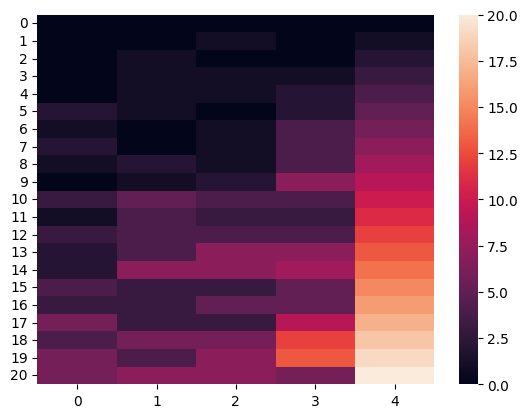

In [99]:
def get_heatmap(agent, p, p_min, p_max):#(state):#
    def choose_best_action(q,t,p):   
        define_state = [q,t,p]
        return agent.action(define_state, p_min, p_max)
    array = np.zeros((21, 5))
    for q in range(21):
        for t in range(5):
            x = choose_best_action(q,t,p)
            array[q][t] = x
    return array

h = get_heatmap(md.Agente(20, 200), 10, 0,20)
sns.heatmap(h);

In [35]:
arr = np.asarray(stati)
#p_b = 0.75
x = arr[:,1]
y = arr[:,0]
zz = arr[:,2]
z = np.zeros((21,5))
ds = pd.DataFrame(arr,columns=['Q', 'T', 'p', 'x'])
ds['p'] = ds['p'].apply(price_normalise, args=(ds['p'].min(), ds['p'].max()))
h = ds.where(ds['p']>0.75).groupby(['Q','T','p']).mean().reset_index()
h


,Q,T,p,x
0,4.0,4.0,0.885983,4.0
1,6.0,3.0,0.774091,0.0
2,6.0,4.0,1.000000,6.0
3,7.0,4.0,0.784145,7.0
4,10.0,3.0,0.818616,0.0
5,10.0,3.0,0.909872,0.0
6,10.0,4.0,0.776271,10.0
7,10.0,4.0,0.829003,10.0
8,10.0,4.0,0.838237,10.0
9,12.0,2.0,0.832131,3.0


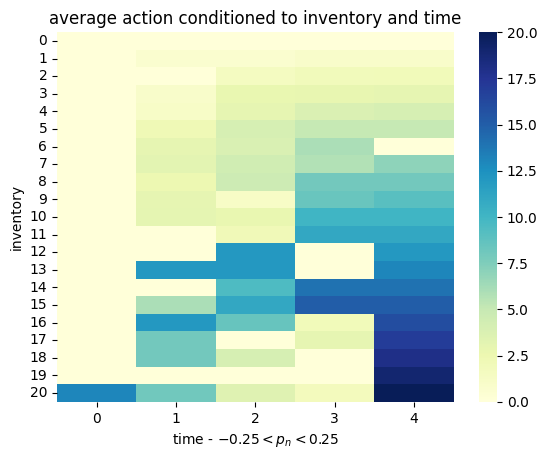

"\n    #def plot_heat(states):\n    #    # Get the x, y, and z values\n    #    arr = np.asarray(states)\n#\n    #    x = arr[:,1]\n    #    y = arr[:,0]\n    #    zz = arr[:,2]\n    #    z = np.zeros((21,5))\n    #    ds = pd.DataFrame(arr,columns=['Q', 'T', 'x'])\n    #    h = ds.groupby(['Q','T']).mean().reset_index()\n    #    a = h.to_numpy()\n    #    for i in range(21): #mx 20\n    #        for ii in range(5): #mx 5\n    #            for iii in range(len(a[:])):\n    #                if i == a[:,0][iii] and ii == a[:,1][iii]:\n    #                    z[int(i),int(ii)] = a[iii,2]\n#\n    #    # Create the heatmap\n    #    plt.hist2d(x, y, weights = zz, cmap='hot')# bins=10,\n#\n    #    # Add a colorbar\n    #    plt.colorbar()\n#\n    #    # Add labels and a title\n    #    plt.xlabel('Q')\n    #    plt.ylabel('T')\n    #    plt.title('Heatmap states from test')\n    #    plt.show()\n#\n    #    sns.heatmap(z)\n    #    plt.show()\n"

In [131]:
stati = np.load("C:/Users/macri/Desktop/ennesima/stati.npy")
arr = np.asarray(stati)
x = arr[:,1]
y = arr[:,0]
zz = arr[:,2]
z = np.zeros((21,5))
ds = pd.DataFrame(arr,columns=['Q', 'T', 'p', 'x'])
ds['p'] = ds['p'].apply(price_normalise, args=(ds['p'].min(), ds['p'].max()))
h = ds.where(ds['p']>-1).where(ds['p']>.25).groupby(['Q','T']).mean().reset_index() #,'p'
a = h.to_numpy()
for i in range(21): #mx 20
    for ii in range(5): #mx 5
        for iii in range(len(a[:])):
            if i == a[:,0][iii] and ii == a[:,1][iii]:
                z[int(i),int(ii)] =  a[iii,3]
sns.heatmap(z,  cmap="YlGnBu" )
plt.title('average action conditioned to inventory and time')
plt.xlabel('time - $-0.25 < p_n < 0.25$')
plt.ylabel('inventory')
plt.show()

'''
    #def plot_heat(states):
    #    # Get the x, y, and z values
    #    arr = np.asarray(states)
#
    #    x = arr[:,1]
    #    y = arr[:,0]
    #    zz = arr[:,2]
    #    z = np.zeros((21,5))
    #    ds = pd.DataFrame(arr,columns=['Q', 'T', 'x'])
    #    h = ds.groupby(['Q','T']).mean().reset_index()
    #    a = h.to_numpy()
    #    for i in range(21): #mx 20
    #        for ii in range(5): #mx 5
    #            for iii in range(len(a[:])):
    #                if i == a[:,0][iii] and ii == a[:,1][iii]:
    #                    z[int(i),int(ii)] = a[iii,2]
#
    #    # Create the heatmap
    #    plt.hist2d(x, y, weights = zz, cmap='hot')# bins=10,
#
    #    # Add a colorbar
    #    plt.colorbar()
#
    #    # Add labels and a title
    #    plt.xlabel('Q')
    #    plt.ylabel('T')
    #    plt.title('Heatmap states from test')
    #    plt.show()
#
    #    sns.heatmap(z)
    #    plt.show()
'''

In [18]:
z

array([[ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  1.,  0.,  1.],
       [ 0.,  1.,  2.,  2.,  2.],
       [ 0.,  0.,  3.,  3.,  3.],
       [ 0.,  2.,  4.,  0.,  4.],
       [ 0.,  0.,  5.,  5.,  5.],
       [ 0.,  0.,  0.,  0.,  6.],
       [ 0.,  0.,  0.,  5.,  7.],
       [ 0.,  0.,  1.,  1.,  8.],
       [ 0.,  0.,  2.,  3.,  9.],
       [ 0.,  0.,  0.,  0., 10.],
       [ 0.,  0.,  0.,  0., 11.],
       [ 0.,  0.,  3.,  1., 12.],
       [ 0.,  0.,  3.,  1., 13.],
       [ 0.,  0.,  4.,  2., 14.],
       [ 0.,  3.,  4.,  0., 15.],
       [ 0.,  2.,  6.,  1., 16.],
       [ 0.,  3.,  0.,  0., 17.],
       [ 0.,  1.,  0.,  1., 18.],
       [ 0.,  6.,  0.,  0., 19.],
       [ 0.,  1., 20.,  0., 20.]])

In [31]:
ac.reshape(-1,5).sum(axis = 1).mean()/5

3991.8614285352023

In [444]:
((4_000-ql.reshape(-1,5).sum(axis = 1)/5)/4_000).mean()

0.001354183744394687

In [239]:
az

array([20,  0,  0, ..., 20,  0,  0])

In [307]:
len(ql), len(ac), len(az)

(125, 125, 125)

In [367]:
import statistics as stat
stat.mean(((ac - ql)/ac))*100,  stat.stdev(((ac - ql)/ac))


(-0.018209826453561288, 0.5947971617128458)

In [242]:
(((ql - ac)/ac))

array([ 3.99889346, -1.        , -1.        , ...,  3.99889849,
       -1.        , -1.        ])

In [243]:
len(ql)-np.count_nonzero(ql)

28393

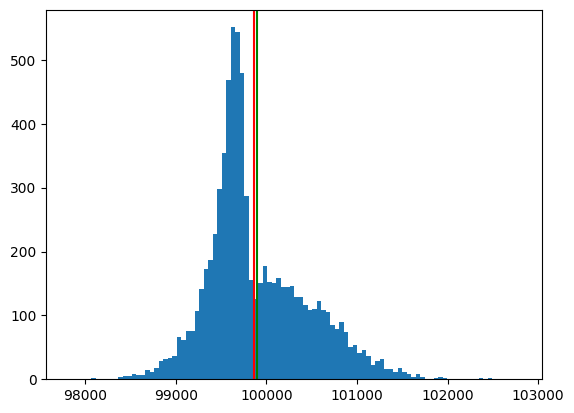

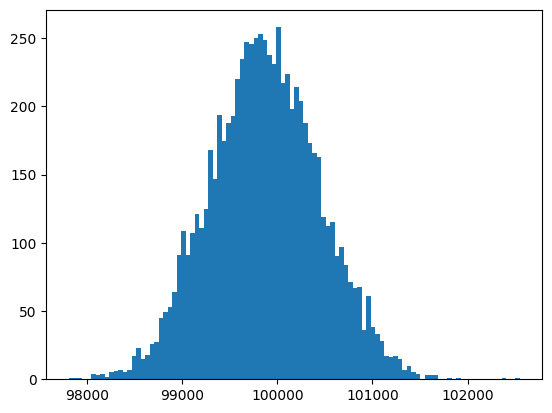

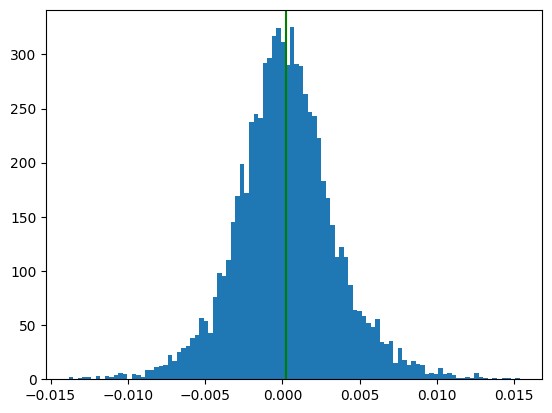

In [272]:
plt.hist(ql.reshape(-1,5).sum(axis = 1), bins = 100)
plt.axvline(ac.reshape(-1,5).sum(axis = 1).mean(), color = 'r')
plt.axvline(ql.reshape(-1,5).sum(axis = 1).mean(), color = 'g')
plt.show()
plt.hist(ac.reshape(-1,5).sum(axis = 1), bins = 100) # ora confronta riga per riga
plt.show()
plt.hist((ql.reshape(-1,5).sum(axis = 1) - ac.reshape(-1,5).sum(axis = 1)) / ac.reshape(-1,5).sum(axis = 1), bins = 100)
plt.axvline(((ql.reshape(-1,5).sum(axis = 1) - ac.reshape(-1,5).sum(axis = 1)) / ac.reshape(-1,5).sum(axis = 1)).mean(), color = 'g')
plt.show()

In [269]:
((ql.reshape(-1,5).sum(axis = 1) - ac.reshape(-1,5).sum(axis = 1)) / ac.reshape(-1,5).sum(axis = 1)).mean()*100
((ql.reshape(-1,5).sum(axis = 1) - ac.reshape(-1,5).sum(axis = 1)) / ac.reshape(-1,5).sum(axis = 1)).std()/np.sqrt(3)

0.0018711002613020571

In [327]:
ac.reshape(-1,5)

array([[19867.88831378, 19969.27193334, 19744.74165141, 19693.83696161,
        19981.29445107],
       [20154.08557435, 19858.08740019, 20038.67024809, 19868.86830617,
        20096.4236081 ],
       [20153.96302325, 19756.38187989, 19933.17778515, 20140.14431825,
        20306.26200519],
       ...,
       [19902.17698726, 20201.90509762, 19973.84041921, 20070.74198262,
        20020.0023904 ],
       [19810.71371653, 20103.67412527, 19649.25835935, 19970.20892795,
        20251.11688455],
       [20057.17032844, 20079.94541829, 20101.75476048, 19754.28013282,
        20038.67522565]])

In [326]:
ql.reshape(-1,5)#.sum(axis = 1)

array([[    0.        ,     0.        ,     0.        ,     0.        ,
            0.        ],
       [    0.        ,     0.        ,     0.        ,     0.        ,
        55259.92045877],
       [ 5038.70746634,     0.        ,     0.        ,     0.        ,
        10153.42572766],
       ...,
       [    0.        ,     0.        ,     0.        ,  5017.90220619,
            0.        ],
       [    0.        ,     0.        ,     0.        ,     0.        ,
            0.        ],
       [    0.        , 40157.74103316,     0.        ,     0.        ,
         5009.88551694]])

In [301]:
20*500*10

100000

In [300]:
0.69/np.sqrt(7500)

0.007967433714816835

In [289]:
0.001*(20**2/5)

0.08

In [288]:
((20*100*10)/5)**2*0.001

16000.0

In [282]:
ql.reshape(-1,5).sum(axis = 1)

array([ 99468.10230879,  99762.98084416,  99656.0007917 , ...,
       101271.97054585,  99764.89328761,  99922.46432067])

In [323]:
101271.97054585/5

20254.39410917

''

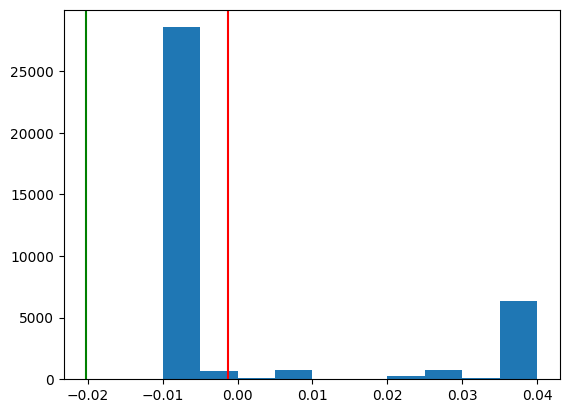

In [278]:
plt.hist(((ql - ac)/ac)/100)
plt.axvline(((ac-20_000)/20_000).mean(), color = 'r')
plt.axvline((((ql - ac)/ac)*100).mean(), color = 'g')
;

In [247]:
((ac-20_000)/20_000).mean()

-0.0013140761068200007

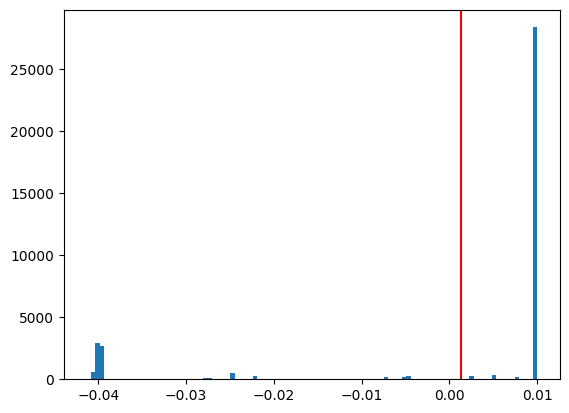

In [246]:
d = (20_000-ac)/20_000 
plt.hist((20_000-ql)/20_000/100, bins = 100)
plt.axvline(d.mean(), color = 'r');

In [197]:
d

array([ 1.27495305e-07,  9.55302425e-08, -1.87527266e-06, ...,
       -9.55888256e-06, -6.99874621e-07, -4.07624937e-07])

In [159]:
def abmUD(seed = 14, numIt = 10_000):
        '''
        returns a matrix of Arithmetic Brownian Motion paths, p=0.5 mu = +0.001 or p=0.5 mu = -0.001
        '''
        X = np.zeros((3600 + 1, numIt), dtype=float)
        np.random.seed(seed)
        mu = 0.001
        sigma = 0.1
        a = []

        def up():

            N = 3600
            I = 1
            dt= 1.0 / 3600
            X = np.zeros((N + 1, I), dtype=float)
            X[0] = 10

            for i in range(N):
                X[i + 1] = X[i] + mu * dt + sigma * np.sqrt(dt) * np.random.standard_normal(I)
            return X

        def dn():

            N = 3600
            I = 1
            dt= 1.0 / 3600
            X = np.zeros((N + 1, I), dtype=float)
            X[0] = 10
            for i in range(N):
                X[i + 1] = X[i] - mu * dt + sigma * np.sqrt(dt) * np.random.standard_normal(I)
            return X

        for i in range(numIt):

            c = np.random.binomial(1, 0.5)
            if i%2 == 0:#c == 0:

                X[:,i] = dn().reshape(-1)
                a.append(0)
            else :

                X[:,i] = up().reshape(-1)
                a.append(1)

        return X, a

In [174]:
x, a = abmUD(numIt=300)
n = np.asarray(a)
np.count_nonzero(n)

150

In [175]:
n

array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1])

In [187]:
np.random.shuffle(x)
x

array([[ 9.54902951, 10.30843464,  9.69591256, ..., 10.37001212,
         9.60684145, 10.30567389],
       [ 9.14400982, 10.61248382,  9.29488615, ..., 10.8364932 ,
         9.17225738, 10.74297786],
       [ 8.94408392, 10.78657368,  9.12787301, ..., 11.09072132,
         9.00711929, 10.97562417],
       ...,
       [ 9.34847018, 10.44283321,  9.49285154, ..., 10.59613188,
         9.38173982, 10.58665643],
       [ 9.47842247, 10.40712584,  9.58843546, ..., 10.45126818,
         9.48408791, 10.44193525],
       [ 9.98166375, 10.01261142,  9.99242238, ..., 10.03275198,
         9.99622506, 10.00678752]])

In [170]:
n_s.type()

AttributeError: 'NoneType' object has no attribute 'type'

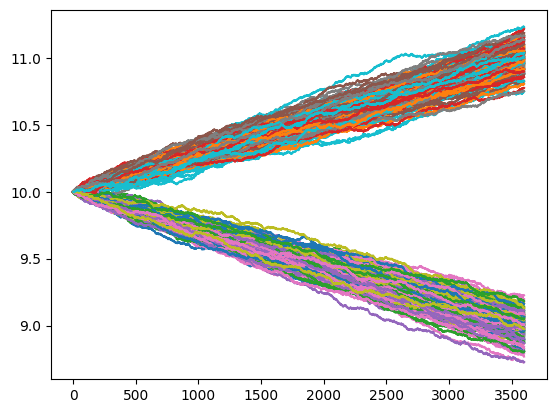

In [161]:
plt.plot(x);

In [156]:
300-np.count_nonzero(n)

150

In [ ]:
up = 23983 #segno piu
dn = 24017 #segno meno

In [132]:
((ac - ql)/ac)

array([1.00000645, 0.99998142, 1.00004625, ..., 0.99989488, 0.99996731,
       1.00000123])

In [133]:
ac

array([19944.63015637, 19980.00938953, 19931.8038789 , ...,
       19870.06470866, 19995.88328583, 20035.08132135])

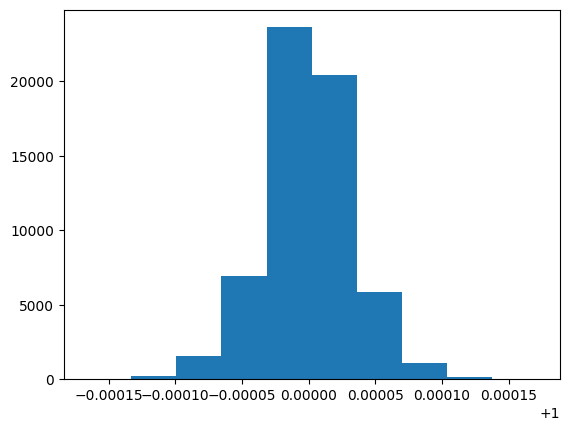

(array([1.2000e+01, 1.8200e+02, 1.1960e+03, 6.2620e+03, 2.1549e+04,
        2.2540e+04, 6.4990e+03, 1.5140e+03, 2.2500e+02, 2.1000e+01]),
 array([-3.3881586 , -2.71360434, -2.03905008, -1.36449582, -0.68994157,
        -0.01538731,  0.65916695,  1.33372121,  2.00827547,  2.68282973,
         3.35738399]),
 <BarContainer object of 10 artists>)

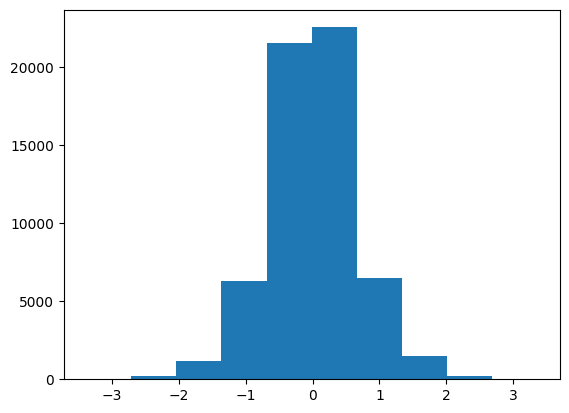

In [130]:
plt.hist(((ac - ql)/ac))
plt.show()
plt.hist(ql)

''

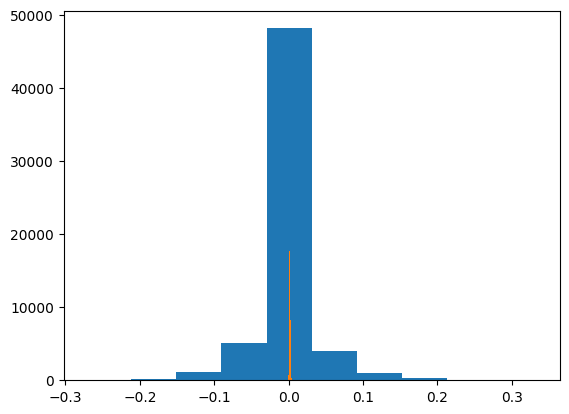

In [96]:
plt.hist(ql)
plt.hist((20_000 - ac)/ 20_000)

;

In [46]:
az/100, (20*100*10-(ac))/(20*100*10)

(array([-0.00249988, -0.00249988,  0.00249985, ..., -0.00249988,
        -0.00249988, -0.00499985]),
 array([ 1.62718595e-03,  1.57091688e-03,  1.78904465e-03, ...,
        -4.18005666e-05, -1.15474609e-04,  3.83456084e-04]))

In [53]:
ac.mean()/(20*100*10)

0.009986047171800811

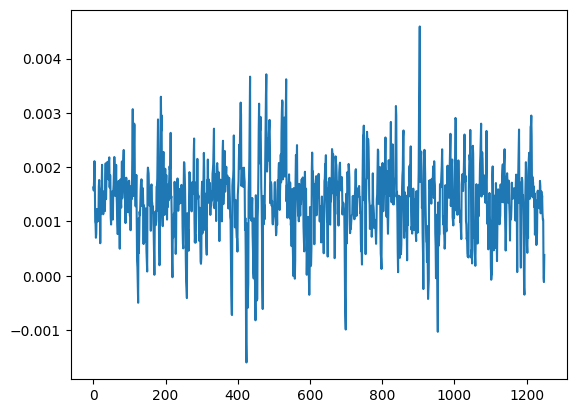

In [77]:
plt.plot((20*1000 - ac)/(20*1000))

''

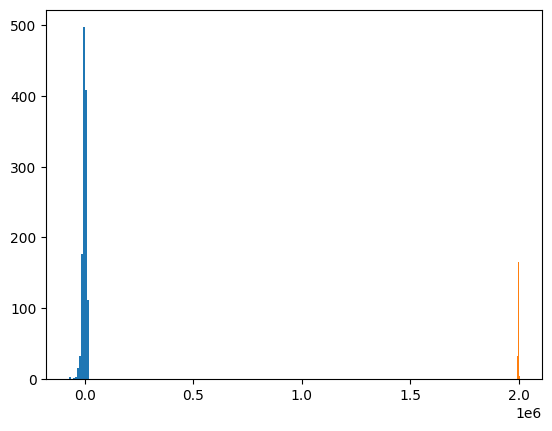

In [73]:
#plt.hist((20*100*10-(ql))/(20*100*10))
plt.hist((20*100*10-(ql)))
plt.hist((ac)*100)

;

In [ ]:
def PandL(data, action): 
    act = action/len(data) 
    return act*data - 0.001*(act**2)

data = abmUD(1)
pl = np.array([])
for i in range(len(data)):
    pl[i] = PandL(data, act)


In [38]:
def abmUD(seed = 14, numIt = 1):
    '''
    returns a matrix of Arithmetic Brownian Motion paths, p=0.5 mu = +0.001 or p=0.5 mu = -0.001
    '''
    mu = 0#.001
    sigma = 0.1
    X = np.zeros((3600 + 1, numIt), dtype=float)
    np.random.seed(seed)
    def up():
        N = 3600
        I = 1
        dt= 1.0 / 3600
        X = np.zeros((N + 1, I), dtype=float)
        X[0] = 10
        for i in range(N):
            X[i + 1] = X[i] + mu * dt + sigma * np.sqrt(dt) * np.random.standard_normal(I)
        return X
    def dn():
        N = 3600
        I = 1
        dt= 1.0 / 3600
        X = np.zeros((N + 1, I), dtype=float)
        X[0] = 10
        for i in range(N):
            X[i + 1] = X[i] - mu * dt + sigma * np.sqrt(dt) * np.random.standard_normal(I)
        return X
    for i in range(numIt):
        c = np.random.binomial(1, 0.5)
        if c == 1:#i%2 == 0:#
            X[:,i] = dn().reshape(-1)
        else :
            X[:,i] = up().reshape(-1)
    return X

def sliceData(price, slici):
    step = int(len(price)/slici)
    y = np.zeros((slici,step))
    step = int(len(price)/slici)
    for i, ii in zip(range(slici), range(step, len(price), step)):
        it = step * i
        y[i, :] = price[it:ii]
    return y

p = abmUD().reshape(-1)
s = sliceData(p, 5)
s

array([[10.        , 10.00077208, 10.00134144, ...,  9.86925228,
         9.86805104,  9.86675613],
       [ 9.86577206,  9.86945889,  9.86777298, ...,  9.91279944,
         9.91080618,  9.90908659],
       [ 9.90814464,  9.90845771,  9.90791778, ...,  9.90426712,
         9.90327469,  9.90187337],
       [ 9.90300933,  9.90029257,  9.90131079, ...,  9.91923812,
         9.91915504,  9.91929815],
       [ 9.91821133,  9.9205167 ,  9.92118745, ...,  9.87111806,
         9.87285939,  9.87357191]])

In [41]:
#[3, 3, 5, 7, 2] * [10, 9.86, 9.907, 9.902,9.917] 
(20*10 - np.sum(np.array([7, 3, 2, 3, 5])*np.array([10, 9.86577206, 9.90814464, 9.90300933, 9.91821133]).T))/(20*10), (20*10 - np.sum(np.array([4,4,4,4,4])*np.array([10, 9.86, 9.907, 9.902,9.917]).T))/(20*10)

(0.00643154949999996, 0.00828000000000003)

In [ ]:
(20*10-(4*p1+4*p2+4*p3+4+p4))/20*10

In [590]:
(0.001*20**2)

0.4

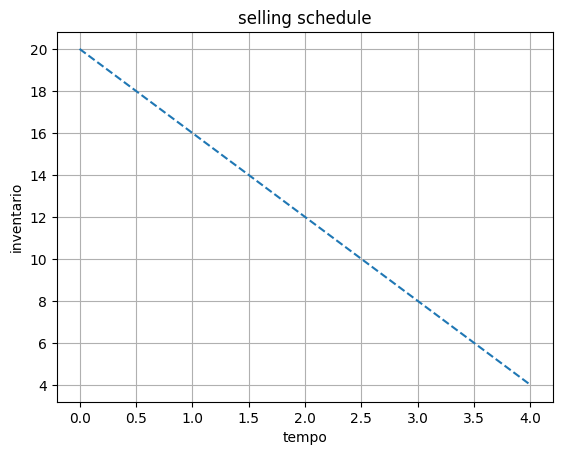

In [22]:
import numpy as np
import matplotlib.pyplot as plt
T = 5
q_0 = 20
gamma = 0#1#e-9
s2 = 0.5**2
kappa = 0.01
V = 0
mu = 0.1
beta = mu*kappa
v_t = np.zeros(T)
for t in range(T):

    v_t[t] = ((T-t)*4*kappa*q_0+mu*V*t*T)/(4*kappa*T)#q_0 * (1/T + (T+1-2*t)/(4*kappa)*mu)

plt.plot(v_t, '--')
plt.title('selling schedule')
plt.xlabel('tempo')
plt.ylabel('inventario')
plt.grid(True)
plt.show()

In [23]:
pl = [0.2721895862439941, 0.017779155070689997, -0.23663441941200095, 0.5265354581593747, -0.49114753089179325, -0.49116535585323257, -0.23677215030148677, 0.017647005475252817, 0.7807520301719506, 0.01755234802949044, -0.4911658821260374, 0.526542713870991, 0.017669300016747592, -0.23679672190253157, 0.27199164722146457, 0.5264894548037963, 0.017724106732876676, 0.01770227068921848, -0.4911434468457377, 0.017684061164792274, 0.2720027986351749, 0.017738835095469523, 0.01784167403761371, -0.4910328138627522, 0.27241630024829777, -0.49117044488827893, 0.2720544477180885, -0.2367175953083707, 0.27220661924199263, 0.27224771458755664, 0.017625993574551583, 0.272022605806264, 1.7983906735169506, -1.0, -1.0, 0.2721205118629107, 0.27228513242605157, 0.2723104931055636, -0.23666579337880286, -0.49111626274593057, 0.272105721376385, -0.23667674396426053, 1.7986246970123894, -0.74554260414608, -1.0, 1.2896467480450131, -0.23677976259075892, -0.23680409646281558, -0.23683368782323025, -0.49114717952490666, -0.7455613326344518, 0.5264948189228329, -0.7455749055361953, -0.2367079769933009, 1.2897612416326039, 0.017715044691448772, -0.2366641531571533, 0.017793252241957186, -0.23661823035976498, 0.5267577828728958, 0.01766257050329561, 0.017734739669990948, 0.017740193375407325, 0.017714680085070288, 0.017631283439425816, -0.745581052989235, 3.8324267903775455, -1.0, -1.0, -1.0, -0.23677046268646026, 0.017578874006814914, -0.23673643373042752, 0.5265929767789828, 0.017745992030959633, 0.017686796465370868, -1.0, 0.017734973007694336, 0.2720290416538774, 0.7808006893700323, -0.7455650200781707, 0.01773249958380509, 0.0177623182343887, 0.5264283214362004, 0.2719166453400348, 0.01769180912586321, -0.7455754286764233, 0.5262907498577516, 0.5263868533241335, -0.23680705465385865, -0.23674639407877315, -0.2367583595678108, -0.7455604813599715, 0.7809205756966608, 0.5266504371530806, -0.23675036260969595, 0.017706535421010028, 0.01782183534441167, 0.017880799759589096, 0.27232674357490244, -0.23672894026681104, 0.2721009649238278, 0.017775569898656918, -0.23663571973453573, 0.27226936649106165, 0.27217684352492727, 0.2722908783058996, 1.5447819038630728, -1.0, -1.0, 0.017702099447972883, -0.2366332977844083, 0.017850976583453953, 0.272219260541238, 0.01789132242252143, 0.7809356705005197, -1.0, -0.2367020344267079, -0.23665802211916762, 0.7809042727337783, 0.7806904868820184, -0.23681328451836792, -0.4912203895980255, -0.23680267351875792, 0.2719407447319711, 0.27201389745621496, -0.2367315337531627, -0.7455594972855277, 0.2720182675410943, 0.5262174013133778, -0.49113761586229526, 0.5266675560152607, -0.23665080241400235, -0.23658838120792075, 0.5268174341418707, 0.2720516144854568, 0.5264949461140056, -0.7455921114102801, 0.5263355495663936, -0.49117566479198893, -0.4911672599900433, 3.578066090399586, -1.0, -1.0, -1.0, -0.7455787154301078, 0.01756573910536537, -0.49121314344754224, 0.7805586243727537, 0.5262405946680523, 0.272107610294541, -0.23671476598763289, -0.49114212689483033, 1.5439978001655474, -1.0, 0.2720356673923404, -0.491156563124961, -0.2367791172481241, 1.5437779508240743, -1.0, 0.5265406181267452, -0.23665778752319824, 0.017829213735463582, -0.4910849148298702, 0.2723144816727736, 0.017639000865735333, -0.23672565593067363, 0.7809369242895309, 0.2721156299572011, -0.7455788674250716, 0.017589360457797826, -0.23679683267811613, 0.271992000769869, 0.017552082685213716, 0.01755950368305484, -0.49112718273192935, 0.017835970616573604, 0.017960562736421392, -0.7454845012993376, 1.290429144386129, 0.5264172671063383, -0.7456103328889324, -0.23685071013983128, 0.2719620955746662, 0.2720651348474641, -0.7455498422739889, 0.2722860161991803, 0.017959178848762553, 0.526953345824116, 0.01810312837371642, 0.017633134542237833, 0.017605333581699092, -0.2367326900431858, 0.5266202534957641, -0.23660203992412498, 0.2719677063927932, 2.815191332436225, -1.0, -1.0, -1.0, 0.017680138155226382, 0.7809189241678348, 1.2896598801168224, -1.0, -1.0, 4.087124205080969, -1.0, -1.0, -1.0, -1.0, 0.2721290295332417, 0.2720798031325558, 0.2721611542231884, 0.2719860237090029, -1.0, -0.7455770182550095, 0.5264158924738255, 0.7808911773313022, 0.01776053437455297, -0.49108013735517647, -0.23679855052132184, 3.324177235296738, -1.0, -1.0, -1.0, 0.7809470680420412, 0.27212918292716387, -0.236674614834383, -0.49110164786375105, -0.23670213734695764, 0.01765436352383729, 0.2720974952776191, 0.017679718777621468, 0.7808997600693933, -1.0, 0.017612890131281502, 0.017641611769268106, 0.27198448877341297, -0.23679126708201836, 0.017542492177996617, 0.7809307932748442, 0.017789958800781117, 0.017903984389177816, -0.4910714095274809, -0.23667479776013986, 0.5265330748841898, -0.4911563381052392, -0.4911811126552379, 0.27207611742964405, 0.2721250535619247, 0.7808462175153439, 0.27207762798323953, -0.2367321316603993, -0.49117543870433533, -0.23688217294899133, 0.01762677025611329, -0.7455772589508972, 0.526361564442341, -0.2367462140447875, 0.5263473995757139, -0.2367743732332567, 0.017546992013977605, -0.23687778639307566, 0.5259987172450686, 0.017400142579381283, 0.2720434054608122, 0.017657644310406565, 0.2721081004225692, 0.2721636355398669, -0.7455432345533751, 0.5264076322259865, -0.49114919572301885, 0.2721060195522155, -0.2367154835366955, 0.01771988095757557, 0.2721415686257278, -0.49108739904342347, -0.23659355690072317, 0.01790451901923574, 0.5268021290580964, 0.27197320528753716, -0.49119582690888647, 0.017677166675090266, 0.27198264188232935, 0.017515374072584983, 0.5265475393581026, 0.5266119425889831, 1.0354051502751447, -1.0, -1.0, -0.49114770166591076, -0.23666161802225744, 0.5267407056047642, 0.2722393059982026, 0.0177863096482137, -0.4911480333892635, 1.2896872776473927, 0.017761017255767942, 0.017760080451829925, -0.7455329395602002, 4.08732694636114, -1.0, -1.0, -1.0, -1.0, -0.23671306330925068, 0.017674302980180974, -0.23670283277109208, 1.5441810128782372, -1.0, 0.780844514604077, 0.01761591097936467, -0.49119206281958305, -0.23681168020845464, 0.017552933032757324, 0.5266048920773998, -0.2365978551927474, 0.017787900453304226, 0.017809639552580525, -0.23666154517259208, 1.035304271235152, -0.7455566649208688, -0.2366464008460457, -0.49106806641341544, 0.5267142797523874, 0.017747055168936633, 0.5266367759660712, -0.2366439383366206, -0.49112697956254775, 0.27212204443964766, 0.27204248695863437, 0.5264776424237823, 0.27212902157220326, -0.4910986657113418, -0.4910749436882748, 0.01766866591025148, 0.5264371090569905, 0.017635187081194915, 0.01764578930464574, -0.49119746931760283, -0.23676048220211413, 0.27204950610801654, -0.23672036207513436, 0.5265417323234881, -0.2366828588786224, 0.7808937770273807, 1.0352318455667873, -0.7455790623506944, -0.4911444525849336, -0.49111504040134174, -0.23672474479271705, 0.01772501681151118, 0.7810807048014857, -0.7455345731606281, 0.2722533752283142, -0.49116243128571074, 0.017722642479181348, -0.7455470981726702, 0.5266286041767494, 0.7809906875270071, -0.4911294945660451, 0.01774175718648753, 0.5266781483860875, 0.017908010545481395, 0.017839792068957902, 0.01768970811169015, -1.0, -0.49116710545670417, 0.5264066568929497, 1.0349167900366583, 0.5265058424023252, -0.2367025801541333, -0.4911085838055186, -0.23671297271992403, 0.5264577297172849, 0.2720738843613133, 0.526479188609034, 0.01769215179185475, -0.23666318096510675, -0.4910785635709258, 0.5263297256613346, 0.27182357408962415, -0.23696874447701063, 0.017285499253485565, -0.4913430976478483, 0.27208727935333377, -0.23677165902830133, -0.49117431038501913, -0.23675812584772937, 0.7809502086990231, -0.7455686071472777, -0.7455846095145663, 0.7807734672233302, 1.0349167386122036, -0.23689074055017426, 0.27203829394376705, -0.2368155023555871, 0.27193030750098496, -0.4911801457427722, 0.2719771800425788, 0.01765766263052589, 0.27209387539418983, 0.27216839633479195, 0.017706775078318065, -0.49111322785514394, -0.49110612024104594, -0.23656596230452462, 0.27234577406755606, 0.7812226575789903, -0.23656144349010483, -0.23670986419763246, 0.2721355775001586, 0.01767984552981738, 0.5265608704688425, -0.491123919216534, -0.49117058937805513, -0.7455748338241396, 0.780875172863903, 0.5266381273919246, 0.01771641245605556, 0.780762223048824, 0.01746109778182546, -0.491257396532347, 0.017576295101508998, -0.23675009555799958, -0.2367581896111424, 0.01752781908835503, 0.5263017209695208, -1.0, 0.7806729651031411, -0.49113631230758903, 3.57925828091095, -1.0, -1.0, -1.0, -0.23680254297411873, 0.017575942207547726, 1.0350993036757759, -0.49119075546602564, -0.236751705220848, 0.27204852590120937, 0.2719987606559176, 0.01760912062685136, 0.5263686492277422, -1.0, -0.491174439695092, 0.2719449625087411, -0.236827442340725, 0.01753042124029233, 0.5261372737019746, 0.017636675855626338, -0.7456227928710053, 0.017403941267055145, 0.27184142784748894, 0.5260125338620134, 0.017629159234790952, 0.2720086751504692, 0.5265590757631082, -0.23678160950208987, -0.4911919375161187, 0.5265633941806603, -0.49110752458563606, 0.5265248723060744, 0.5264770890130805, -1.0, 0.526523621458071, -0.4911860917780119, 0.017518121096166624, -0.23683247971341503, 0.2719475156718231, 0.272112510738583, -0.491110795067787, 0.01771587176706214, 0.7808806616937951, -0.49111659147591136, 0.01767518460691544, -0.2366485589095228, 0.2723425720089167, 0.01778223861211953, 0.017750320355507408, -0.49113038934529407, 1.7983891006640964, -0.23671510567969725, -0.7455538633085776, -0.23663972904471034, 0.017791378194632047, 0.2723886785955249, -0.4910389099330264, 0.017888929343149833, 0.2723228775707464, 0.27202402832242645, 0.7806607501290688, -0.49122322062970725, 0.017586318780530255, -0.4911570975326545, 4.086878012780728, -1.0, -1.0, -1.0, -1.0, 0.2721079568870838, 1.03536212073696, -0.491125758020921, -0.4911285182544047, -0.236617983600781, -1.0, -0.23675599202095565, -0.23677794506474587, 0.7807697422074705, 0.7806736862513111, 4.087154728000576, -1.0, -1.0, -1.0, -1.0, 0.7808679895135571, 0.017753377531664755, -0.49108897911609584, 0.7810878861387075, -1.0, 0.017655038471306814, 0.2720369562841056, 0.01763628074348139, -0.23670702814916308, 0.01769167717771925, 0.017738083577532388, 0.27228582691243125, -0.2365611429548359, 0.7812911682039855, -0.7455273710674398, 0.2721817637813671, -0.4910323582295632, 1.7993809049042788, -0.7454836371495689, -0.7454899019507172, -0.2367500336876807, 0.017611279472504522, 0.5263023586412164, 0.27194075144859575, -0.49120633454030643, 0.017672290316300993, 0.7808968922004562, -0.2367057216025759, -0.23661537404423877, -0.2365985720083107, -0.4911501159910456, 0.2720877172177966, -0.4911558634700006, 0.7809440616440758, 0.01788503342096509, 0.017643684691927185, 0.5263576169930612, 1.543625548267645, -1.0, -1.0, -0.49113270736599035, 0.01763767727552079, 0.017740663477110553, 0.2722713787146736, 0.2723385040973129, -0.7455520077919748, 0.5266557352526408, 0.27240774446208654, 0.01785935838190332, 0.0177460873247753, 0.526499456219529, -0.4911277778073272, 0.017703699831144122, 0.27217652125577907, -0.23674553733976214, 0.017686484511342016, 0.01766001585867061, 0.0176137631730742, 0.017610188148012948, 0.017610269842039852, 1.035166588481068, -0.4911300905205057, 0.7808355126679729, -1.0, -0.23687276668046336, 0.27212662001822174, 0.017637957513928222, -0.745588898638628, 0.526452197625352, 0.017644888794681922, 0.017692655433365245, -0.49114823662319224, 0.780860998154352, 0.2719894872399026, -0.491132040737771, 0.7806964686894625, -0.23681514416555427, 1.5435642495730322, -1.0, -1.0, -0.49118032381575744, 1.0349349764556643, -0.7455885262061097, 0.7807622625707396, -0.4912470899481381, 0.27206617854213255, -0.23673215312361237, -0.236645131010879, 0.27222306650929895, 0.017787863349036752, 0.017698528697936203, -0.49117861246947353, 0.27184883484805106, -0.23693539823501636, 0.5261010292918842, 0.017660349209960475, 0.5263674092874432, 0.017653269168814333, 0.01774193120122375, -0.4911216686612449, -0.23675771460882153, -1.0, 0.526594361420309, 0.2722227137094403, 0.5266557811714674, 0.27215482584193884, 0.017817489622230117, 0.017885682263885132, -0.49102210240872146, 0.27236385469217606, -0.4911772549141304, -0.4911763534209109, 0.5264384942314145, 1.5439473538990711, -1.0, -0.2367606290844598, 0.017791174531570524, 0.017864898846261548, 0.017908602608797966, 0.27243103981230765, 0.27201873832037426, 0.017570007927134354, 0.5263214398190362, 0.017537685440231217, -0.7456144992617889, 0.7808580337634025, -0.7455808777812265, -0.7455788299698394, 0.2720548079559914, 0.5265208347898822, 0.017616439759604485, 0.2718135454263976, -0.4913168765322449, 0.27158730304581513, 0.017269665461166494, 0.01766610577571817, -0.23670993798194592, 0.7810140388035453, -0.23663135364793753, -0.23661177753384183, 0.5264156453902358, 0.7808791201131385, -0.23671597378059975, -0.23673272090865413, -0.7455625905313217, -0.23670638288108548, 0.2720326743215522, 0.7807500134157986, -0.491192145714859, -0.2368203893975263, 0.27211401546680647, 0.017698224699580597, 0.27211157262207614, 0.017798239460300177, -0.4910519791830998, -0.4911312679251402, 0.017735860245194295, 1.0352590462257791, 0.5263887753316053, -1.0, 0.27204846146674166, 0.2720158773703108, 0.017592056690803687, -0.2367704869597956, -0.2367565545999483, 0.5264479743674827, 0.017681652503143554, -0.23674554172312687, -0.491174252865215, 0.27216051857763435, 0.27211463454345564, 0.27210269020975264, 0.01772503204638157, -0.49114096487034226, 0.01774613108690495, -0.7455827233589504, 0.5264699360185594, -0.2367429047637216, 1.543812826996442, -1.0, 0.5264092072294171, -0.23683496962225792, 0.27181977135768837, 0.017409762592167866, -0.4913305556731849, 0.27202400652393577, 0.7807317357953284, -0.4911386209415285, 0.2720480312639219, -0.7455984075300174, 0.27218798107787684, 0.5267706481441515, -0.7455343125814566, -0.4911116363933407, 0.5265997983724224, 0.7808528946032611, -0.49114933596149596, 0.5264632044018512, -0.4911223966101593, -0.2366437403105964, 4.087314219791892, -1.0, -1.0, -1.0, -1.0, 0.017654889390552944, -0.491161278477593, -0.23670446965497394, 1.798609871140312, -1.0, -0.4911485578360888, 0.5264902104567574, -0.7455723777667433, 0.27217896415465687, 0.5266985421453202, -0.23671336193437906, 0.5266737305739577, -0.4910836265764837, 1.0354233459838067, -0.7455629670714229, 4.087277012851698, -1.0, -1.0, -1.0, -1.0, -0.2368471826799531, 0.526123549572443, -0.23689669043602765, 0.017526998243532103, 0.017564670171122697, -0.23669169694980544, 3.3247823916817127, -1.0, -1.0, -1.0, -0.2366960735331746, -0.23666483313737596, -0.2367492870838866, 0.7809708848449165, 0.017779876295037907, 0.7808820621059483, 0.2722636605983691, -0.23664642409453493, 0.017936858314319893, -0.7454711050318152, 0.5265361790577952, 0.5265507565411023, -0.23674468358959655, -0.7455547048858275, 0.017837272381639097, 0.5264332069467098, -0.49114703075611243, -0.4911360641290165, 0.7809412911755734, -0.2366671804592705, -0.7455723123302535, 1.035153172998103, 0.01762433054459108, 0.017663835397499945, -0.23676411050594726, -0.2367404998933543, 0.017643917146144602, 0.5262982790668329, -0.236829016133815, 0.01749677964803432, -0.4911700685716501, 0.27198746135280955, 0.27200684179187795, 0.017554554160600453, 0.017506130317552365, -0.2367338731445983, -0.7455547554928798, 0.272252041042309, 0.2721940311652547, 0.5263591560334314, -0.7455701544826612, 0.272176347205437, -0.23659375668149502, 0.2723302836071673, 0.5267920236598383, 0.01761396372201553, 0.27201348418985927, 0.2721481677413177, -0.491096564009528, 0.017688081626734426, 0.5264280928866113, 0.01761604348074542, -0.49114335923039676, -0.4911228544431257, 0.5264676566013367, 0.2720940023838437, 0.27215337758833, -0.2367086244893637, 0.017686379155846206, -0.23672287138518586, 0.27213870352231917, 0.01774976811324659, 0.01785629685905082, 0.01784995039495126, -0.23660070737336017, -1.0, 0.5265053677057863, -0.7455468077588226, 1.7986187505122508, -0.49104552923278083, -0.23669090694246875, -0.23665443513995071, 0.017911052118162057, 0.5269065441756531, 0.017949358366937056, -0.49112788839040966, -1.0, -0.23656408435364495, 0.5267041621473506, 1.2899522342323315, -0.7455667908431614, 0.7808693190257426, 0.01765803751146777, -0.49114997290517176, 0.5266174356790476, 0.7808407040751009, 0.7809611577850555, -0.7455571863117081, -0.49112566399930246, -0.2366890301477364, 0.017734741644096975, -0.23673547340711637, 0.017630038602289372, 0.27184131042035614, 0.017489309713986347, 0.2720802197758992, 0.017647705102997357, -0.4911685023029168, 0.7808299458472763, -0.491176290671396, -0.4911609277570513, 0.27199937328062074, -0.49114591791738893, 0.27208293747840134, 0.5263949938088076, 0.01769730408384104, 0.27212998610000244, 1.7985377437672, -1.0, -1.0, -0.49116840833672426, -0.7455661810218251, -0.23675190926746162, 0.01777334836072027, 1.5442968312816052, 4.08700698573762, -1.0, -1.0, -1.0, -1.0, 0.017613043600284185, -0.23676843453152374, -0.23667850547797298, 0.780888647917224, -0.23674179711099264, 0.7809649991949605, 0.2720620074169615, -0.7455712390631488, -0.23674987961468377, 0.01766845791946616, -0.2367773540961483, 0.2719221904724822, -0.23678498950262009, 1.034988511420024, -0.7456061454918326, 0.7808885628903371, 0.01772555830536522, -0.2367225087226806, 0.01761153814110116, -0.4912110229509381, -0.23674006684734267, 1.2896805179787276, 1.0350894632825356, -1.0, -1.0, -0.2367414787495663, 0.017701701725927433, 0.01782331962722313, 0.017852279381673046, 0.2722732543122988, 0.5265696709526124, -0.23654188798338355, 0.2726298970442132, -1.0, 0.5271089962086188, -0.23674640638280653, -0.2367753849969722, -0.23676904974432647, 1.0353175741198448, -0.23667825078343738, 0.017677421720586298, 3.0695790582767635, -1.0, -1.0, -1.0, 0.017744880244486838, -0.7455593879297379, 0.2719441226880076, 0.01748876210340454, 0.5261713199811106, -1.0, 0.017687629106104778, 0.5263965647662131, 0.01757654822434416, 0.5263665886614636, -0.49119368588467605, 0.2718777732518978, 0.017579743092183693, 0.780800165772661, -0.49115497015319204, 0.5264427662519687, -0.49119084942877506, -0.23681280128366733, -0.23686136324766893, 0.5263206125966003, 0.5264149048931861, 2.5614076821396146, -1.0, -1.0, -1.0, 0.5265530648400117, -0.23674407924985977, -0.23673000160731864, -0.7456030346518476, 0.7806579159759094, -0.49113798300907074, -0.23676612080039042, 0.27194784526391413, 0.7805568403234292, -0.2369227895586631, -0.23678835374164725, -0.4912694100249371, 0.7801037020415377, 0.27148112934910923, -0.23706177478665447, 0.27198534492349186, -0.49119165126081354, -0.23679426221534577, 0.27187792737312155, 0.27194490071519367, -0.4911192290734771, 0.5265581208084059, 1.2897984438719743, -0.7455318156226054, -0.49100842484048507, -0.49110461571359154, -0.23672224776914166, 0.017584638494589976, -0.236823079632872, 1.0350208833247327, -0.23675495783681869, 0.7807376698759548, -0.2367688998905002, 0.2719807606837322, -0.4911841013827654, -0.4911664387284229, -0.2367732086318064, 0.2720433235576978, -0.4911476164829123, 1.0352543532024432, -0.49116904251808363, -0.49117042968117436, 1.798249596562656, -0.49108253655624445, -0.23670042346393275, -0.23677559340377893, 3.3244447357435853, -1.0, -1.0, -1.0, -0.23676549204141586, 0.01768785150621606, -0.23665175017310014, 1.5440286664190033, -1.0, 0.27199336821900727, 0.017648340258133565, -0.2367792170727321, 0.5264183853099103, -0.4912098510908178, 0.2720892717188636, 0.01773589518291302, 0.27226135470666163, -0.49105849672467455, 0.017892206512596032, -0.49115846035755384, 0.5265394977410366, 0.017740191642132558, 0.01781275037494451, 0.017864417039240955, -0.7455578401116885, 0.526512165520009, 0.526409980908143, 0.5263790987054585, -0.7456078701731633, 0.2720690393723656, -0.236740901260315, 0.017642158491016365, -0.7455574670601156, 0.7810339695715675, -0.7455890129282912, 0.7806536874621844, 0.2720223796887514, -0.4911495275670033, 0.27202052132592014, -0.23676453815409662, -0.7455746620881624, 0.0176289094438911, 1.2896118117533057, -0.23669580794988745, -0.2367300310310131, 0.2720458054776478, 0.2719919448075364, -0.23686166850898474, 0.017489718940029556, -0.7455838786679865, -0.7455808581581345, 0.7807324317666614, -0.23685063828205716, 1.0349124478088447, -0.23675669331565177, 0.0176224547746416, 0.7809188747072328, 0.272123745882789, -0.7455688808228049, -0.23672608949508084, 0.5263295892835004, 0.0175635500067761, 0.5264018310386389, -0.7455722174700333, 0.5265332507574008, 0.5264514852006289, -0.2368642433237157, -0.23685486522302712, -0.4911717665246707, 0.5263811649312875, -0.49117430417323926, 1.0351538720951878, -0.49113963608996153, -0.4911002906552726, -0.23670016578899858, -0.2367777322496165, 0.27183493853715374, 0.2718242288576521, 0.01748069852088656, -0.49114204753464913, -0.7455626811921159, 0.27210729254219146, 0.2720463600809551, 0.7808403928368327, 0.27213779158589163, 2.8162513765824486, -1.0, -1.0, -1.0, 1.0352654391129172, -0.23669483245354497, 0.01773956388459567, -0.49118897836962727, -0.23680588097071334, 0.5265475972725234, 0.017796604249047818, -0.23662840721016806, 0.2722317132656756, -0.4910826351898712, -0.4911478536941522, -0.4911462889190453, 0.7810807986505, 0.5268085424146898, -0.2365101200384271, 0.01758548558567416, 0.01753872328432674, 0.5260700908649681, -0.23692807661910936, -0.23686142521755846, -0.23678299598460092, 0.7807696784093334, 0.2719358595873451, 0.27195748093931854, -1.0, 0.017589807093482526, 0.2718482296809932, -0.49124757575118794, 0.017412376439759954, 0.2717981137522703, 4.087449413760012, -1.0, -1.0, -1.0, -1.0, 0.27204074016959023, -0.2367950494582983, 0.27193104964366754, -0.2367401397203691, 0.017701425867338992, 0.01766416566953074, -0.23676455273004773, 0.017672109851442012, -0.7455737895913599, 1.0351264142530048, 0.7808763456695662, 0.017582551876971116, -0.7456003684264776, -0.2368798427188007, 0.2717988786304323, -0.23681507119396658, 0.5264297455822101, 0.5265588198808531, -0.49104048081934853, -0.23656317265169638, 0.01765692891632381, 1.0352288900837308, -0.49113792717917126, -0.23673845602920543, -0.2367018034409112, -0.491145520135703, 0.01769544317415889, -1.0, 0.2722322582616519, 1.2899363191787183, 0.27200066237839154, -0.23683296481445723, -0.7455943291559454, -0.2368261475669205, 1.0350638278824071, 0.017677182473043087, 0.5265679140264277, 0.01773223725143349, 0.01771628973029986, -0.4911076961533453, 0.52653407392985, -0.2366940196160457, 0.017748758813903143, 0.017829670370769112, -0.23664294911648542, 0.017679415131844088, 0.2720896332988919, 0.017734322377956177, -0.4910873984908635, 0.27227956707348533, -0.4911441648812085, 1.0354338326594785, -0.4910441753540668, 0.018004068008694564, 0.018115362361479866, -0.23673574874197395, 0.2720800406708751, 0.5264176369222028, 0.017687788072507694, -0.491124571792822, 0.017678955713656613, 3.0697233637172077, -1.0, -1.0, -1.0, 0.5264348800437287, 0.017680220937136573, -0.7455579207031073, 0.7811166377499764, -0.4910761036355686, 0.017671118301421953, 3.0701048590830027, -1.0, -1.0, -1.0, 0.017691727022742913, -0.23672139000952777, -0.2367959163148751, 0.5264790495477658, 0.01769308046252915, 0.017623777357572486, -0.2368458434476819, 0.27173125896279104, -0.23687501037419173, 0.2719447522612218, -0.23675247748604247, 0.017746159310681662, 0.27218917198047105, 0.5268212363191718, -0.49098260335310717, 0.27201197643318903, 0.017548869794194663, -0.23684107231595664, -0.23681250994424774, 0.2719514842573802, -0.7455651461571974, 0.526399467141818, 0.7806601593832521, 0.27186968442661347, -0.7456221173414248, -0.4910871533176266, 0.27237414912991004, 0.017835566896588807, 0.2723281449222864, 0.01792777910994078, -0.23675682933952819, 0.5264858078751686, 0.27199156083320913, -0.4911782596744615, 0.017606162958513864, 0.017685110214681592, -0.4911293711673348, -0.4911125995453011, 0.5268957962491397, 0.5268623941885852, 0.5263818092048527, 0.5263786080757823, 0.01769736129559892, -0.23667744748844857, -0.7455581820319565, 0.01766764454389136, 0.27205389792482254, 0.017678258969591513, -0.23669777657363633, 0.017725520259773215, 4.087558084996213, -1.0, -1.0, -1.0, -1.0, -0.23676139445599192, -0.2367767644503039, 0.7807457875296355, 0.27196090922272126, -0.49119271984517493, 4.087151407075007, -1.0, -1.0, -1.0, -1.0, 0.017598945904915515, 3.0699743478529986, -1.0, -1.0, -1.0, -0.49118051950461195, 1.0350887868338348, -0.236715102006227, 0.27221448392455544, -0.49107298397559973, -0.236757109223611, -0.4912046476501594, 0.01758754732963029, 0.5262833132722213, 0.27189306324890045, 4.087342903528407, -1.0, -1.0, -1.0, -1.0, -0.23673817419112803, -0.23675868969346422, -0.4911523917783817, 1.03514833424187, 0.01759148765649997, 0.7808629254179035, -0.4911666923662062, -0.23671408288880127, -0.49114925126703757, 0.5264852433480564, 0.7808641992516105, -0.23669522942180518, -0.23665403006254765, 0.781118186347995, -1.0, 4.087132990807358, -1.0, -1.0, -1.0, -1.0, 0.5265528929950809, 0.017690816115485165, 1.5441508070781473, -1.0, -1.0, 0.5265042822026493, -0.23668332748489115, -0.4911263554851392, 0.01774114794397421, 0.2721744085900067, 1.0351244726652002, 0.01767865908612007, 0.017644761253751556, -0.491131861597631, -0.49108871088425726, 0.27204666807224714, 0.7808862904126378, -0.491151328754657, 0.017675100790445947, -0.49112310233437995, 0.780892982561413, -0.23672496953700042, -0.2367583322603616, -0.2367443097142131, 0.01774451257384711, -0.23675361477013043, 0.5264582077231905, 0.017730557067569458, 0.7810065997588491, -1.0, 0.27214108422569677, -0.23675519511773677, 0.01765708503179454, 0.27194670136221766, -0.23679651136950994, 4.087230444661327, -1.0, -1.0, -1.0, -1.0, -0.2367553837458509, 0.2721042201567801, -0.23664656575081738, 0.017840042043319397, 0.2721755882104437, -0.2367167824555004, -0.23668716553599256, 0.01775713110012211, -0.2366625004396174, 0.7809829792053716, -1.0, 1.7984609179461983, 1.2895648345919395, -1.0, -1.0, -0.7455793573184168, 0.7808644111550972, 0.2719850142315852, -0.4911878397095202, 0.2720362657532145, -0.23677686196717437, 0.27194699570139186, -0.23682770904731845, -0.23693728562556765, 0.5259750967540898, 0.5263536085744833, -0.49118708230842123, 0.017655035760358675, 0.01775626348695907, 0.01777109324915066, -0.23673543057421986, 0.017735215383344126, 0.526605976321098, 0.27216494283079284, -0.4911364608232026, 0.017629444827427027, 0.017650171708946914, 0.017701267304548744, 0.2721517334706915, -0.23667619362659875, -0.4911794321804895, 0.27188250473849307, -0.49120289658207644, 0.5265169191397919, 0.27226406354893273, -0.23680120313209452, 0.5263386612420473, 0.27190996540904083, -0.23690364913936107, -0.2369368121491922, 0.01764150982968096, 0.017601800644457447, 0.01761703665023479, 0.27205751266113026, -0.2366386450822846, 0.017664142593575204, -0.23674037922273788, 1.0351997133439994, -0.23658157815734362, -0.49099740768636846, 0.2720569146832516, -0.49113964158435097, 0.5265214794702227, 0.2721475939712206, -0.49106808014676684, -0.7455815805392394, 1.2894190844893076, 1.5436018463071923, -1.0, -1.0, 0.5265399319023902, 0.2721503910585946, 0.017763940366100885, -0.49106423728867443, -0.23662649800983973, -0.49114752081501395, 0.0176980436047155, 1.289515636482795, -0.4911454200390479, -0.23664019350165852, 0.2720490370281018, -0.4912059660856489, 0.5261702062041304, -0.23692901549997863, 0.017466350122445757, 0.01763885307006033, -0.4912309888007738, 0.27171322126104797, 0.017409169478833992, 0.2718802231375387, 0.5264438793253353, 0.2720968194813184, -0.49115158984142254, -0.23674790672849066, 0.01761755697520786, 0.01765526288435957, 3.069857334953427, -1.0, -1.0, -1.0, 0.01765777309406878, 3.0699148602132658, -1.0, -1.0, -1.0, -0.23667880375002467, -0.49109219638136214, 0.7809767784450897, 0.526688180808572, -0.4910545277237437, 0.017675115858464645, 0.5265453553622068, 1.5443793736360254, -1.0, -1.0, -0.4911280574189133, -0.2366536806129616, 0.2723270726291455, 0.01791956589078192, 0.5269538410183875, 0.01766772439760578, -0.23673897879972602, 0.27192640692376974, 0.2718024976144294, -0.2368851127580532, 0.2720821001964451, 1.2898047668202453, -0.7455467059146986, 0.27211282192575664, -1.0, -0.4911360733919825, 0.27219574872303987, 1.0355815324049795, -0.23656008592246805, -0.4910264775905879, 0.5264881915503024, 0.5263131123646858, -0.4912602287805314, 0.01753852006079075, -0.49118352488232714, 0.5264089066275581, 0.01763441603463225, -0.23679036388471553, 0.27198989592132233, -0.4911603834686924, -0.236758761720953, -0.7456182836974056, 0.017485306149897347, -0.23681749628750348, 1.28945073891284, -0.4911441968760099, 0.2720957241407524, 0.2721075924305068, 0.5263852302686788, -0.49117627487371485, -0.4911399361137446, 0.5265407909665805, 0.27218083394545, 0.781061926358073, -1.0, 0.2719995084286058, -0.4912088596500105, -0.49122760238692026, 0.5263997434592962, 0.2720497328142007, 0.2720189528879945, -0.23681463378935733, -0.4911892620347577, 0.7807641523598222, -0.23681018908280815, 0.2721558203943399, -0.49110085985496926, 0.2721398372435569, 1.0351644915631522, -1.0, 0.01757476916364237, -0.4912785163156051, 0.7803555832898273, 0.017409269118558102, -0.23686932028139665, 0.017620250689890645, 3.0699846874052086, -1.0, -1.0, -1.0, -0.49112028866101615, 0.01773826703158584, 0.7808551519436403, -0.2367364250289205, 0.017695820189851455, -0.49113487067353256, 0.27205045617705564, 0.2721305484560791, 0.01774110331527977, 0.017893177921687, -0.23676832549409188, 1.0351636983181605, 1.2897568505915316, -1.0, -1.0, -0.4911695257153185, 0.01763444508962962, 1.0350703237925727, 0.2718228926289212, -0.7456123432415539, -0.7455794472044204, 0.5264456404103073, 0.7807231672755843, -0.2367858521980549, -0.23670863695052602, 0.017661319975293993, 0.7805265838347761, 0.01745501343620189, -0.4912315376016403, -0.23681667506729576, 0.5263380791490372, 0.01742764696900812, 0.2717602390448719, 0.01744470617194997, -0.7456278690358794, -0.49114787164437135, 0.5263927980534394, 0.2720932416475558, 0.01777530794997333, -0.2366666847977559, -0.23668459065621567, -0.2367380315090162, -0.23674403997040255, 0.017589841775968812, 0.780699493397124, 0.5264317929348268, 0.017606009194894107, -1.0, 0.780702491103096, -0.23686311517086012, -0.49117654934631744, 0.7806868835919952, -0.7455886904429374, 0.7808801715421582, -0.2366503291401142, 0.2720416309355098, 0.526440814289306, -0.2368372748969452, -0.49117677863362785, 0.017571550686899792, 0.7807001720657472, -0.745601467043754, 0.017554548852093375, -0.23684211370984598, 0.2718616291459958, -0.4910988046656576, -0.23662725590446584, 0.7812467726372921, 0.5267703605732466, -0.4910936561421717, 0.27202707803756265, -0.49113177442256273, -0.4910677647221699, 0.5267548131156387, 0.2722822082377767, 0.017677886653962624, 0.526666987598286, 0.526603698078696, -0.2367016540423341, -0.7455302238512962, -0.23675922154190787, -0.4911290306440377, 0.017583168521801768, 0.27195975266455824, 0.526483004397269, -0.4911547862879222, 1.2895683394649542, -0.2368040883367711, -0.23681364235637284, -0.236838241327689, -0.23676494111293275, -0.49112831604045465, 0.2721881591899104, 0.526688744038941, 0.017784945486888512, 0.017623236796298885, -0.49114983477772134, -0.4911026748067582, 0.2723713167368439, 0.7816089261222329, 4.087337220901229, -1.0, -1.0, -1.0, -1.0, 0.5265058304086431, -0.2367329111552806, -0.49121440439258296, 0.2718909897328795, 0.017553318612477803, 1.0352707551070959, 0.01768352977076474, -1.0, -0.49120985937182277, 0.5262565843762906, -0.23677574955266842, 0.7805944917387636, 0.017560795543611566, 0.017540731125285102, -0.4912416842797292, -0.23671353753283167, 0.5266675421400345, -0.23651549544028896, 1.0357358648772317, -1.0, -0.2367513642016603, 0.017666247245929818, 0.27208864228818735, 1.035280125398172, -1.0, 0.27201889338365703, -0.23675104842454273, -0.4911513007129799, 0.27223237017538887, 0.27247911245616674, -0.4911359299793718, 0.5265864329463366, -0.49108523123643255, -0.23666212413794657, 0.7809472260814646, 0.5265305998016937, -0.23667481378497884, -0.4911442851040848, 1.2894806437595325, -1.0, 0.2720725283342595, 0.017724847975956692, -0.7455653299804352, 0.27209687117182296, 0.2720475803625612, 1.0354079020321845, -0.23665677449889796, 0.5265862223252608, -0.49104642260985865, -0.7454847700465127, 0.017627375942723178, 0.01755425406800528, 0.27172521499041447, -0.2370005846998451, 0.017215425232601375, -0.7456044118127493, 0.017478945268302633, -0.23687211820989887, -0.23687173695595115, 1.2893361595997779, 0.5264710960698987, 0.017748442086232222, -0.49107872410663417, 0.27229108543934893, -0.23661512175102456, -1.0, 0.7809214748556997, 0.7809633564005022, -0.23668400803926887, -0.23668032547458903, -0.23677306585257468, -0.49122191729798653, 0.01752304183569463, 0.27208117943035515, 0.5263998191291255, 0.2719540256387756, 0.7805579999822906, 0.2717744993904643, -0.49124897656704714, -0.7456138813332265, -0.2367235598800149, 0.526393815003077, 1.7982448590409463, -1.0, -1.0, 1.2895753671088626, -0.2365730944365221, -1.0, 0.018053947447709523, 0.018031182949119075, 0.2721906624842322, 0.5267181253741067, 0.017778821166642075, -0.23667355329188158, -0.4910791219082187, 0.7807839143416673, -0.23683193421480359, -0.23687301402742356, 0.01735740362216787, -0.2370323383758547, 4.086967066209287, -1.0, -1.0, -1.0, -1.0, 0.27214850414413955, -0.23659668177501803, -0.49104037930864364, 0.017883168474250373, 0.5268039681366158, 0.27213764680897595, -0.7455364605095474, 1.0355872381402438, 0.01794829911136128, -0.4909525967383156, 0.5265259812605543, 0.27207685178947505, 0.017610348072909066, -1.0, 0.27217237924807247, 0.5265113605367211, 2.561926492280221, -1.0, -1.0, -1.0, 0.2720954791962184, -0.23675844254187828, 0.2720197485173758, 0.7809467228904037, -1.0, -0.4911855528736954, 0.017662251524745574, -0.2368251041341177, 0.27184145192010645, 0.5261075911803572, 0.272023331153039, 0.2720198355123049, 0.017660243401356704, -0.7455789133237197, 0.27204639866315694, 0.5265356299298288, -0.23668298072169314, -0.49106604854396724, -0.23661191073959487, 0.5265710275590246, 0.2720126254091597, -0.7455808248346301, -0.23672599794384316, 0.5265125107992028, 0.27220539922149456, 0.7811009119611962, 0.5269807234649942, -0.49094463582466114, 0.01805409686544179, -0.7454696422481129, 0.2721177998768804, -0.4911207984837327, 0.017764620761993637, -0.23672055661458694, 0.5265483297765172, 0.2721117942048076, 0.017677080839862885, 0.5265222744088299, 0.2720492808791357, -1.0, 4.087354619212379, -1.0, -1.0, -1.0, -1.0, 0.27209749407101635, -0.23671411217743116, 1.5437808038115013, -0.49121613496160627, -1.0, 0.5264754564085984, -0.491192786408478, -0.23686721474792247, 0.5260995426114534, -0.23690835791048165, 0.7808387039796543, 0.01757590987340437, -0.49119642362181365, 0.7806267048627085, -1.0, 1.2893841580400676, 0.017479206631528486, -1.0, -0.49122887080911043, 0.2719665670643025, 0.2720870590882657, -0.2367363604267488, -0.49118044634282876, 0.2719905640451375, 0.2720689482091861, 0.017638646967309535, 0.017593725924991317, 0.01760543796892077, -0.23673760653523662, 0.27222534204794574, -0.23675251866129868, -0.49116505566353386, 0.5265224367436385, 0.27215598721208284, 0.017757035248796207, 1.035262953070249, -0.4911521087817008, -0.23671829936963826, -0.23677666973811118, 0.017537386865478632, -0.4911460494294942, 0.017597792221096364, -1.0, 0.7809623269560902, 0.7811087395578232, -0.23671645652175763, 0.017664352133566773, -0.23671108442249467, 0.017833051552923723, 0.5267616390240261, -0.745596023420414, 0.017566899721293248, 0.2720455681467084, -0.23673043996688725, 0.7808140877477362, 0.017581306880371787, 0.27189744000741844, 0.017527338600798827, -0.23682354207077533, 0.017535249357488573, 0.5263557773027763, -0.4912604082395926, -0.23691464563600534, 0.27186322015036474, 0.017430129459333307, 0.5265956423951605, -0.23662538409104375, 0.7812117705831553, 0.017966492978924654, -1.0, -0.4911456034667238, -0.49116531286136594, 0.2720759594932944, 0.017632447481984257, 0.7808687858561344, 0.27211952461799704, -0.7455805328728401, 0.0176256166873786, -0.23675811580915662, 0.7807358347644384, 0.2720096327792503, 0.2719519050357539, -0.23675907084889947, 0.01768056823170063, -0.23670757726843006, -0.23671376085880996, 1.0352212512830248, 0.017660077566448686, 0.017697058003247078, -0.7455303125924326, 1.035095787470802, 0.5262520302278763, -0.49125664290125626, -0.7456259954092556, -0.23688204265575347, -0.2367598366641255, 0.017619602799051483, 0.5264989161683119, 0.017660148598060314, -0.23676921144574054, 1.035324866731196, -0.23662180272480904, -0.7455232079163171, -0.49114205385931264, 0.5265104877571554, 0.27211133759681233, -0.7455369788234605, -1.0, 1.0351886090714006, 0.5264530172941712, 0.27210925003162667, 0.2720863620851903, 0.017637793713545333, -0.4911492039277775, 0.017750754076548417, 4.086916333589226, -1.0, -1.0, -1.0, -1.0, 0.2721533544942777, -0.49106874889985497, -0.7455258547417267, 0.5266786974488078, 0.5267626375031326, -0.23675605611337558, 0.2718916128915545, -0.4912656603685085, 0.27181739113523407, 0.27172094683352666, 0.01769789565073963, -0.49112322617118837, 0.7808959952410277, -0.23672871317814898, 0.017673859311694826, 0.017712991545533154, -0.7455668173022465, 0.526477201526873, 1.2895434645119972, -1.0, -0.49112497920276815, -0.4910964196347561, 0.2722224906655965, 0.7811511965743647, 0.01788588349177417, -0.2367486539314361, 0.27211354806962357, 0.2720504610584089, 0.017647479782955132, -0.23676340123955078, 4.087191768673837, -1.0, -1.0, -1.0, -1.0, -0.4911879703068537, 0.27179874524045755, -0.4912673245317513, 0.27184582069936797, 0.5262328142554209, -0.2367241908186948, -0.7455826644332796, 0.7809798376418775, -0.23677873818867995, 0.5262438259212636, -0.49118559197774364, 0.271959313341527, 0.01759107743279718, 0.2720216215562192, 0.01765732585036039, -0.23680639747278023, 0.01757679277260603, -0.23676959614114845, 0.01773085104360212, 0.5268128861954622, -0.23680056264784025, 0.017531223370048917, 0.01748603313731764, 0.27190513184457415, 0.017554791940837026, 0.5264265060236293, -0.23674945593491173, -0.491142372558875, 0.5264825742727969, -0.2367179174552898, 0.7809291142864563, -0.2367063222839382, -0.23673841315828462, 0.7809988382921639, -1.0, -0.2367824169829167, 0.017565580495067738, 0.5263334786945658, 0.5263408257967994, -0.7455797831655718, -0.49114372126029016, -0.4911463927589588, 0.017638183103562393, 1.2893575748413848, -0.23676025205730314, 0.5265265850511077, -0.7455554017192618, 0.7809432472349015, 0.27229630084024775, -0.7455181092102975, 0.2720452298818955, 0.5266155715001163, 1.2900130552737543, -1.0, -1.0, 4.08705583954718, -1.0, -1.0, -1.0, -1.0, -0.4911559244656387, -0.4911199756245169, 0.01776643482205351, 0.017785302430621056, 1.035191340475674, -0.23668015218725014, 0.5266023300441497, -0.23669374923424355, 0.017671872884002914, 0.01763324204208719, 0.2720101928177993, 0.01761484837372223, 1.7980192325962543, -1.0, -1.0, -0.23679764573958687, 0.017652016908718014, 0.27227964937890753, -1.0, 1.0356883505052021, 0.27203630991070077, 0.5264011855590269, 0.01772806811344761, 0.017590512522415013, -0.7456157934540796, -0.7455851204930265, 0.5263747141186711, 0.5264555037527451, 0.01776010869935903, -0.2366513139625219, 0.017663613442908576, 3.07024613645241, -1.0, -1.0, -1.0, 0.7808020332709535, -0.7455756680831224, 0.5264532113839112, 0.5265009038292381, -1.0, 0.2719556303044789, 0.27186478205031467, -0.23680360027170297, 0.5264499738965064, -0.7455949085725196, -0.4910948538792195, -0.23669416057484433, 0.7808645143418204, 0.2722050751699396, -0.23661851927893215, 4.087182610777562, -1.0, -1.0, -1.0, -1.0, -0.49113826883232603, 0.017578138844367337, 0.017569713225733415, 0.27188887361096264, 0.2719290430626497, 0.01758256009087755, 0.5264889457660284, -0.2367294144119649, 0.2720558096378167, -0.49115747398511184, 0.01764714553740415, -0.23673277776666435, 1.035385294449695, 0.272154304513382, -1.0, 0.01762040372503829, -0.23674794924880402, 0.017637385354255533, 0.017699872353964693, 0.2720363050706101, -0.23677124949973674, 0.01765281590726905, 0.27222080605568266, -0.23665954374110515, 0.2720537190300062, -0.49111950747539296, 0.5267312516960323, -0.23657366753395007, -0.23661066261285074, 0.5267243346125565, 0.2719974216945705, -0.23681701343667422, 0.017421967450414855, 0.017393449230258165, 0.017401309488894817, -0.2367441740389705, 0.5263961034869868, 1.0349411440639795, -1.0, -0.23690926516792812, 1.0351283247899645, 0.017564564623833052, 1.035189373408616, -1.0, -1.0, -0.745566977816769, 0.272207564701283, 0.017815362932307652, 0.01774505429895746, 0.5264141974428592, 0.272002045910556, -0.23674479054983255, -0.49119685582996686, -0.23681284508159473, 0.7806268940910588, 0.017685958933935313, 0.017717191552657, -0.7455870436639688, 0.7807557090132788, 0.017641451725631193, -0.4911558456844687, 0.7809730089455261, -0.236769668193527, -0.49111594770629036, 0.5265213515636953, 0.017699345808180472, -0.2366763533425347, 0.017890558225530952, -0.2365280050760225, 0.5269197710529785, -0.2367572814943931, 0.27209625624890377, 0.2721059036516646, -0.49110208314904447, 0.27220556738151136, 0.01763408364169247, 0.5263117219457675, -0.4911980867801783, -0.23679431883848998, 0.27199598811874104, 4.087128372955218, -1.0, -1.0, -1.0, -1.0, -0.2367437053459667, 0.017547757210275274, -0.23689685944969482, -0.7456456402900136, 1.288914742500429, 0.01764635296609701, -0.49110249596291744, -0.4910511010338261, 0.7810107942316741, 0.27222927033778815, -0.23665493271009114, 0.2723262405796174, 0.017850499803812897, 0.7810912148199625, -0.7455456959048592, -0.4911690070369155, -0.2367662748491087, 0.5263140873285762, 0.2719156417602472, 0.017554366590684278, 0.27207472175687425, -0.4910963198048, 0.272301347042755, 0.017841012780949565, 0.017819046742389096, 1.7981322655766074, -0.7456106041769115, 0.271768297387646, -0.7456626520063022, -0.49135449307350126, -0.2367930480959432, 0.5262327134160524, 0.5262540060345151, -0.23686740554766503, -0.49127053103430696, 0.7809445268750538, -0.49108344959967004, 0.017750757809936568, 0.5263925129773485, -0.7455700789712087, 0.5264945168632206, -0.2367186861416955, -0.4911166096344624, 0.5267778679224969, -0.23657777739996932, -0.7455694182487962, 0.5265695469090574, 0.7810762380989981, 0.017853103355057017, -0.491024960867772, 0.5264910706755392, -0.4911960899399839, 0.017504120226125644, 0.017440191127624044, 0.017383728132451804, 0.27207562597968327, -0.4911481504523993, 0.017625592577486807, 0.2718857713810824, 0.01757880819518945, 0.7808453569933385, 0.017619612480032163, -0.491175354241236, 0.017600145332026397, -0.2367610362060103, 4.0871047156486675, -1.0, -1.0, -1.0, -1.0, -0.23670981398329732, 0.01767371242214365, -0.4911355326459, 0.7809911918008648, 0.01792274124834074, 0.780723230204219, 0.017597740456867593, -0.4911918225211055, 0.2721101087783267, -0.491112473427269, 0.7808852510594924, -0.23677158203270823, 1.5437334177927282, -1.0, -1.0, -0.7455466936146133, 0.017725805543819653, 1.0355169863628875, -0.2365815713721473, 0.01786147141672487, 0.2721725666587978, 2.816098280641843, -1.0, -1.0, -1.0, 0.780886003158839, -0.745555226758037, -0.4911311838476579, -0.23670586959520212, 0.7810052312848526, -0.49115793020488396, 0.2720302161532822, -0.4911301438379726, 1.289871345631152, -0.4910654908785897, -0.23672108047713553, -0.23662720867441733, -0.49107551350562595, 0.7810814512755246, 0.2722432768076189, -0.4911545045372236, -0.2367943322663748, 0.2719631529522735, 0.272002725009244, 0.2720093535269623, 0.7808928962448742, 0.017665393530654327, 0.52648326515044, -0.23677219109066636, -1.0, 0.017604013915888256, 3.0696922063101697, -1.0, -1.0, -1.0, 0.526638191066027, -0.23660290569275927, -0.23664297428501085, 0.2721055306516289, -0.236729931769349, -0.491098536336583, -0.23658650655336605, -0.2366272432107805, 0.7810017462312547, 0.2723177691821342, -0.23670007050603015, 3.3240876266475765, -1.0, -1.0, -1.0, -0.7456002938241202, -0.49122419779109056, 0.01749986857615083, 2.306475936579316, -1.0, 0.27218355441604736, 0.017862277363780807, -0.23656862089218186, 1.0358330682809986, -1.0, -0.7455642358753101, 0.5263322229656355, 0.01760329864983961, -0.4912011614527812, 0.7804318369438533, 0.017750204329740213, 0.5266041657427419, -0.49112477209554545, 0.017712776526123557, 0.01770868044373039, 0.2719700002443355, 2.8151106198843916, -1.0, -1.0, -1.0, 0.017648769462823666, 0.2721083213187378, 0.2721019044157001, -0.4911123779321628, 0.01767674180868359, 0.2720578040435409, 0.017633470265504457, -0.4911622561065208, 1.0351257180436062, -0.7455615614462949, -0.4911424178736843, -0.23671895559117637, 0.27217137587068757, 0.2722267067195868, 0.27230014403274905, 0.017712603260914794, 0.017764070742955485, 0.017680232842256366, 1.0352583702982454, -1.0, -0.23677377957775309, 1.2894719112358122, -0.49119420345346554, 0.017564075329460586, -0.49117757938769907, -0.4911549215468583, -0.23669480105098353, -0.23661018040360246, 0.5268146879160941, 0.5267755492323776, 0.27210335738071784, -0.4911036329049331, -0.23666006014312263, -0.7455553938140353, 1.2897076635067362, 0.2720801764993722, 0.526494531054635, -0.49114068396308036, 0.27207994776579836, -0.4911317897808145, 0.27197466671534964, -0.7455908447123175, 0.5264852410924628, 0.01792224202999663, 0.018001052175073175, 0.2721171087319966, -0.2367312717506465, 0.7808226405019745, -0.7455894752402762, 0.017613471267679162, 0.017676943120271592, 0.7808453088673459, -0.49114871242596003, 0.5266798559170378, -0.745491152804417, -0.745567862149976, 0.017544842408996168, 1.0351265305866615, -0.2366477080282313, 0.017850016724648508, -0.4911518516569156, 0.27215120415980193, 0.2722918106561874, 0.017906535675669123, 0.018013049703425814, 0.5264904916985299, -0.23671867643784614, -1.0, 1.7983285405807756, -1.0, 0.017672417392647754, 0.780998352562578, -0.491077630836619, 0.2724283090383856, -0.4909664958790327, -0.236749272308344, -0.7455466221205601, 1.2900205973738643, 0.2723195431804624, -0.49107561692926865, 0.017646818400883262, -0.7455741132807572, 0.27213887835179223, 0.7809349762779005, -0.23673326856924662, -0.2366900024478169, 0.27205735771563794, -0.23681395442449849, 0.2718528664120016, 0.017463962719744704, 0.5264682949411702, 0.017582591936626098, -0.7456135839095613, 0.017412907724918544, 0.2716803204372027, 0.017600004159855163, 0.017614389022269687, -0.23670253625398774, 0.01763289216041035, 0.2719565397291319, 0.27206556816126654, -0.23680780316377395, 0.27189792045493766, -0.4912439396623777, 0.27180403667307845, 0.5264875579095177, -0.7455664370105957, 0.2719965867044594, 0.017526078456876752, 0.01755203847449947, -0.49112748203457646, -0.2367008615990708, 0.5264745162011449, 0.01770785481882983, 0.27210104665489915, 0.017723959382021037, -0.23664147828443255, -0.2365487752863311, 0.7814094102333129, -0.2364258524604871, 0.7808667921802444, 0.017595722340674236, 0.27191725709763936, 0.017602390866327706, -1.0, 0.2720772969014051, 0.27213240879083783, 0.017760738367019867, 0.017750455748612386, -0.4911162207463727, 4.087296387642648, -1.0, -1.0, -1.0, -1.0, 0.27203672984578187, -0.4911410776452539, 0.2720847403244825, 0.2720895578803866, -0.23676551435343665, -0.23679049818156456, 0.2720560201201032, -0.4911475336914193, 0.2720946734630283, 0.2721412953888649, 0.272164099581351, -0.7455354588682948, -0.4910875140055918, 0.5266012767637471, 0.5265955325210611, 0.0177182513714595, -0.49113819414686527, 0.5266006930007991, -0.49103263500984157, 0.5269602559453211, -0.7455572038187874, 0.7809280404134318, -0.4911139893551043, 0.5264493012156569, 0.01766777378889828, -0.2367494926336684, 0.017583605136377266, 0.017540993804078777, 0.017468402518144303, 0.2717988532992937, -0.7455760904735801, 0.27196093662402115, 0.5263237524275487, 0.27198604800109843, -0.23680501796909617, -0.2367235293057197, -0.2367255228091511, -0.23674333401814107, 0.2720265375329119, 0.5264644415559613, -0.4911936351581882, 0.017558684856623714, 0.5262470663008243, 0.017409918965937497, 0.017353477093694267, -0.49113501775602264, 0.27214331640499045, 1.0353057445164087, 0.01771322101881459, -0.7455415446290994, -0.7455878664065964, -0.23684012714089775, -0.23685662097147062, 1.0349700829218693, 0.2719759685272254]

p = np.asarray(pl)/100
p.std(), p.mean(), p.shape, 500*5

(0.007480752447286603, 0.00017646939593062616, (2500,), 2500)

''

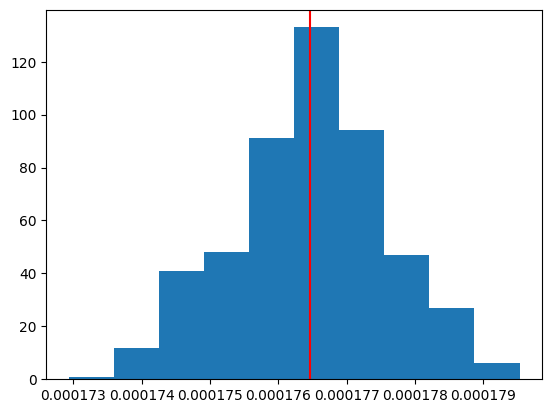

In [35]:
plt.hist(p.reshape(-1,5).mean(1))
plt.axvline(p.mean(), color = 'r')
#plt.axvline(, color = 'g')
#plt.axvline(, color = 'g')
;

5.423121510104265e-05

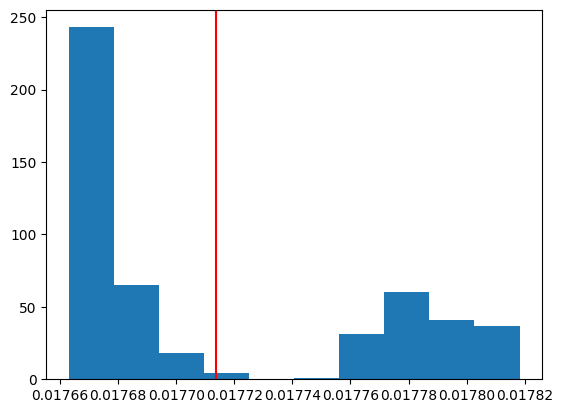

In [16]:
pl = np.asarray([1.7744449834052927, 1.7673612669223917, 1.7665145584858228, 1.7671681515890971, 1.7696016978864926, 1.7700705527420375, 1.7699654961567304, 1.7709829841724527, 1.7712638837505346, 1.770356217828454, 1.770314430096343, 1.7708593562436463, 1.7706040410258583, 1.7699215257408407, 1.7698672982096326, 1.7696548830029462, 1.7694886088502444, 1.768976949646151, 1.7690818179139522, 1.7695627327516013, 1.769766009782587, 1.7708104910914908, 1.7710360969797352, 1.7710410939505126, 1.7703643440025945, 1.7701070951715094, 1.770457667904279, 1.769951615327291, 1.7692542736067856, 1.768676886865601, 1.7686036456781489, 1.768436907701661, 1.7687593614364374, 1.7687123796369102, 1.76839627309834, 1.7689871381770388, 1.7686218298189584, 1.7690821313313436, 1.7689984799480167, 1.768727862577232, 1.768715365175086, 1.7684744757140631, 1.768402716287872, 1.7683989871401746, 1.768232928582682, 1.7683182401446624, 1.768301625599255, 1.7680934472361365, 1.768342725641385, 1.7683123141854558, 1.7681484499753066, 1.7680365844936856, 1.7676917161507517, 1.76773487713258, 1.7677083971804035, 1.7680184867138082, 1.7678329836485718, 1.7679669201486958, 1.7680519081820758, 1.7681467956148196, 1.7681671511060408, 1.7682053807357216, 1.7680604430586622, 1.7682115223574726, 1.7683408963321139, 1.7683928336542956, 1.7684608834424718, 1.7683270587483277, 1.7683222481641374, 1.76830843373546, 1.7683970682397374, 1.768441354443283, 1.7686206174563919, 1.7685310075918823, 1.7685640518202594, 1.7686121223577524, 1.7682210200532882, 1.7681637693658083, 1.768045699583987, 1.7679010023884076, 1.7679266561263018, 1.7681545593147312, 1.7681666160499838, 1.7681600556714034, 1.7679699538374931, 1.7678184698486377, 1.7679877003501716, 1.7678780857871355, 1.7678093410469748, 1.7676199578127025, 1.7673934406989402, 1.7673307965886496, 1.767338911241339, 1.7672424031177296, 1.7672324906598276, 1.767305849930691, 1.7673601567501287, 1.7675715414923754, 1.7674844635671645, 1.7674169982686818, 1.767468162878725, 1.7673964630941452, 1.7673758687244745, 1.7674527008370806, 1.7674381391019636, 1.7676067629003422, 1.76785913791223, 1.7677729576571048, 1.7678245121073175, 1.7678686907228025, 1.7677240080119794, 1.7678005037657036, 1.7679111992032062, 1.7679291821836383, 1.7678670797524423, 1.7678014230193138, 1.7677586255002666, 1.7677394330658562, 1.7676223378871838, 1.767529241133505, 1.7675853041651455, 1.7674697502110333, 1.7674473087409333, 1.7674868646259376, 1.7676261195544891, 1.7675748330767689, 1.7676712885789192, 1.767586530655069, 1.7675689760630473, 1.7673862704793195, 1.7674298566075441, 1.7674278596837796, 1.7673723922230495, 1.7674303095457706, 1.7674214979672402, 1.7673849797535228, 1.7673726674588293, 1.7674008629598188, 1.7673931845866384, 1.7672765843620084, 1.7672306010139176, 1.7672920109030192, 1.7672990928581926, 1.7674358065319276, 1.7674772118604742, 1.7675142463604223, 1.7675657969280199, 1.7675227693662094, 1.7674066489501614, 1.767474317921382, 1.767509993149072, 1.7676255768120126, 1.767663252791172, 1.7676749917252679, 1.7676370977646465, 1.7675755863435838, 1.7675141608273275, 1.767538993058455, 1.7676294288971415, 1.7676111031763673, 1.7675884202534557, 1.767595721550979, 1.7676773740260086, 1.7677197755947485, 1.7678308140208825, 1.7678754178358143, 1.7678791914189715, 1.7679023777523575, 1.7678176721527508, 1.7678000078488674, 1.7677823941075692, 1.7677964747599844, 1.7678092798362184, 1.7677240479367307, 1.7677151862295248, 1.767710237677605, 1.7676456852090046, 1.767622924997107, 1.7675540818914808, 1.7676010823125037, 1.7677627060985073, 1.767757681420565, 1.7676462746314656, 1.76761492117663, 1.7675961648609333, 1.7675540104451035, 1.7674909815080322, 1.7675447754915763, 1.767507035449076, 1.7674212165805736, 1.767250894180009, 1.767192493648643, 1.7672597424976015, 1.767250287276502, 1.767215502841632, 1.76720297377073, 1.7671932419960332, 1.7672074412380192, 1.7672129484708703, 1.767176981996088, 1.7672269076834601, 1.767267626745444, 1.7672530859019275, 1.7672525859442925, 1.7672263052732136, 1.767219330547383, 1.7671641052223481, 1.7671135750396965, 1.767108316640484, 1.7670768358849946, 1.7670351227757044, 1.7670356120153183, 1.766984710570717, 1.766988573461721, 1.767065486782005, 1.7670562378639647, 1.7671094059476227, 1.7671700657934677, 1.767074080416833, 1.767030175884868, 1.7669429994873431, 1.7669058328797282, 1.7668836434888429, 1.7668749384266453, 1.7668110262856478, 1.7668429512195716, 1.766838159760429, 1.7668634357725723, 1.7668227993894443, 1.7668419403302078, 1.766822120011098, 1.7668431521874381, 1.766955092377707, 1.7669519248706047, 1.7668991374147687, 1.7669159665520333, 1.766918834964366, 1.766918196645125, 1.7668355005343557, 1.7668777693036943, 1.7668377173125076, 1.7667940537853695, 1.766872679807316, 1.7668469528353714, 1.766915718152325, 1.7669061847247143, 1.7669160559129173, 1.7669624039298906, 1.7669317224925367, 1.7669151649808954, 1.7668915755612395, 1.7669155798418397, 1.766873264439555, 1.766832569267249, 1.7668079139624335, 1.7668088419948158, 1.7668274693660078, 1.7667757816323708, 1.7668048882633525, 1.7668285567424873, 1.766837668134338, 1.7668413362726145, 1.7667896787583606, 1.7668039102710955, 1.7667821479397203, 1.7667864749720368, 1.7668188222839432, 1.7668308535717652, 1.7668392224755958, 1.766826491387817, 1.7667604588281747, 1.7667600213326393, 1.7667733849461433, 1.7667677482981985, 1.7667494795202954, 1.7666843140412825, 1.7666729498521903, 1.766727083202611, 1.7667513002299746, 1.76669663867155, 1.7667327514923195, 1.7667405028168164, 1.7666923542569952, 1.7666317343500868, 1.7666271579373238, 1.7666102065647549, 1.766612703262805, 1.766651276464151, 1.7666982440298815, 1.766752714593702, 1.7666856320574595, 1.766678062868944, 1.7667394105720797, 1.766707043279139, 1.7666911105227678, 1.7666561338938478, 1.7666502664057009, 1.7666778660683349, 1.7666486244112056, 1.7666076484791022, 1.766622983397774, 1.7665480002970408, 1.7665345172498372, 1.7665413084482864, 1.7665559709658119, 1.7665643396464779, 1.7665367993931542, 1.7665267529177848, 1.7664869518754476, 1.7664136635765062, 1.7664150627781254, 1.766404391525986, 1.7663772966886557, 1.7663587867965573, 1.766335454953015, 1.7662978869048513, 1.7663508766860736, 1.7663800987847837, 1.7664078201225286, 1.7663852670610682, 1.766363824607876, 1.766391333013971, 1.7664648579949995, 1.7664776207462567, 1.7664600772447976, 1.7664388842823557, 1.7664010357245221, 1.7664605553464936, 1.7664593634986447, 1.7664932243389553, 1.7665177658137199, 1.781821806472255, 1.781770431296946, 1.781780178605486, 1.7816600704858614, 1.781566461423931, 1.7815455623414502, 1.7815133740967184, 1.781449131396234, 1.7813481002329066, 1.7812955751530197, 1.7813195554273964, 1.7813069142283189, 1.781202452328439, 1.781136377032512, 1.7811454749269946, 1.7811501484900807, 1.7811099349806025, 1.7811078172895431, 1.781061507435612, 1.780966142602724, 1.7809173619807, 1.7808951379228708, 1.7808624576875205, 1.780914916096463, 1.7808857604849893, 1.780841786041877, 1.7808249219462131, 1.78074296519696, 1.7806593487864781, 1.7806024595422385, 1.7805266433467544, 1.7804831792593883, 1.7804399200731422, 1.7804062100119291, 1.78036258503033, 1.7803291417604106, 1.780305963531145, 1.780240760788276, 1.780167464356117, 1.7800784544009327, 1.7800942374188784, 1.7800542672984139, 1.780005651384588, 1.7799574526264117, 1.7799296838176017, 1.77984248441314, 1.7798025859797506, 1.7797867527766933, 1.7797668934233937, 1.7797335979604887, 1.7796839107494442, 1.7796919450457966, 1.7796058701520907, 1.7795789088801381, 1.779545161862114, 1.7795362787548648, 1.7794953125409283, 1.7794463025511915, 1.7793705924235736, 1.7793251957099545, 1.7792780782862074, 1.7792612753895833, 1.7791886301814892, 1.7791566289221021, 1.7791439003081115, 1.779089858454714, 1.7790476970817064, 1.7790440204770608, 1.7790228434999027, 1.7789594867368128, 1.7789389890614207, 1.778916201023216, 1.778867601153436, 1.7788634642624739, 1.7788198774580137, 1.7787895107777576, 1.778776848003038, 1.7787413572536783, 1.7786848389372796, 1.7786686030613823, 1.778656553911898, 1.7786033268112293, 1.7785647987591853, 1.7785467060844335, 1.7785109694840626, 1.7784885569885092, 1.7784947857550744, 1.7784114914704843, 1.7783385464669086, 1.7782847046314665, 1.7782674511956882, 1.7782211470195826, 1.7781895617031747, 1.7781686205453138, 1.7781879844215542, 1.7781732265605463, 1.7781271528475886, 1.7780921275831358, 1.7780142053201609, 1.7780010530185102, 1.7780062256857065, 1.777958351799968, 1.7779550874013375, 1.777878872499954, 1.7778092841173136, 1.777795059106288, 1.7778000402230567, 1.777807538389487, 1.777743562048249, 1.7777034804035803, 1.777669033424923, 1.7776406349307758, 1.777635471195901, 1.7776061172855537, 1.7775669528429086, 1.7775733370595272, 1.7775804931510721, 1.7775623511363885, 1.7775456050662601, 1.777548886490473, 1.7775110114160966, 1.777488854584807, 1.7774776218823312, 1.7774757166242112, 1.7774852128244052, 1.7774527249823466, 1.7773991610690425, 1.7774203716197607, 1.7773713226424084, 1.7773582733620206, 1.7773000307837497, 1.777264234251593, 1.7772348872899622, 1.7772342392657676, 1.7772194478779635, 1.777177771139233, 1.7771779909407677, 1.7771707928343785, 1.777152300458445, 1.7771328898586711, 1.777107862125666, 1.7771023966789288, 1.7770846980588975, 1.77710278175812, 1.777082713050187, 1.777090863154423, 1.777093260735204, 1.7770699638821077, 1.7770198158982249, 1.7769644524624786, 1.7769351308648496, 1.7768857581943125, 1.7768542928961746, 1.776839922177155, 1.7768661610544108, 1.7768324400242315, 1.7768205685073206, 1.7767945813719064, 1.7767730616729576, 1.776747089424695, 1.7767485223663448, 1.7767640885389049, 1.776747415119223, 1.7766962509573807, 1.7766590313020432, 1.776636667406651, 1.7765748198985267, 1.7765640207653186, 1.776516914904363])/100


plt.hist(pl)
plt.axvline(pl.mean(), color= 'r')
;

pl.std()


In [18]:
np.divide(2*(2*0.001+0),5*(5-1))

0.0002

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
az = [4.6984, 4.0614, 3.8991, 3.7871, 3.554 ]
t = [1,2,3,4]
plt.hist(x = t, y = az)

In [ ]:
s = [[1,2,3,4],[4,5,6,7],[7,8,9,10],[11,12,13,14],[15,16,17,18]] # 0 = time, 1 = q, 2 = p, 3 = act
s.append([5,6,7,8])
s.append([11,58,65,48])
st = np.asarray(s)
v = np.zeros((20,5))
for i in range(20): #q
    for ii in range(5): # t
       v[i, ii] += st[:, i][ii]
v


In [461]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
s = [[2, 4, 2, 0, 5, 0.06176385432408646], [8, 3, 3, 5, 4, -0.32015675510022445], [13, 2, 6, 7, 3, 0.7594138327105546], [8, 3, 5, 3, 4, 0.15611439059075308], [2, 4, 2, 0, 5, 0.04001850752484659], [12, 2, 6, 6, 3, 0.3405305308041324], [8, 3, 3, 5, 4, -0.21964569937573672], [12, 1, 1, 11, 2, -0.2506291485119277], [4, 4, 4, 0, 5, 0.14631515164972125], [3, 3, 0, 3, 4, 0.10556340281716281], [20, 0, 5, 15, 1, 0.5810378095551622], [9, 3, 6, 3, 4, 0.043487928661469444], [7, 3, 2, 5, 4, 0.36617134679254315], [16, 1, 4, 12, 2, 0.7974583288055264]]
s = np.asarray(s)[:,:3]

ds = pd.DataFrame(s,columns=['Q', 'T', 'x'])
h = ds.groupby(['T','Q']).mean()
h
df = pd.DataFrame(np.arange(20),columns=['Q'])
h.join(df, on = 'Q' )
h
#sns.heatmap(h, annot=True, cmap="YlGnBu")

x
T   Q             
0.0 20.0  5.000000
1.0 12.0  1.000000
    16.0  4.000000
2.0 12.0  6.000000
    13.0  6.000000
3.0 3.0   0.000000
    7.0   2.000000
    8.0   3.666667
    9.0   6.000000
4.0 2.0   2.000000
    4.0   4.000000

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Create a dataframe
df = pd.DataFrame({'T': [0.0, 1.0, 16.0, 2.0, 13.0, 3.0, 7.0, 8.0, 9.0, 4.0, 4.0],
                   'Q': [20.0, 12.0, 4.0, 12.0, 6.0, 3.0, 2.0, 3.666667, 6.0, 2.0, 4.0],
                   'x': [5.0, 1.0, None, 6.0, None, 0.0, None, None, None, 2.0, None]})

# Transpose the dataframe
df_transposed = df.transpose()

# Create a heatmap using Seaborn
sns.heatmap(df_transposed, cmap='YlGnBu', annot=True)

# Set the x and y axis labels
plt.xlabel('T')
plt.ylabel('Q')

# Show the plot
plt.show()

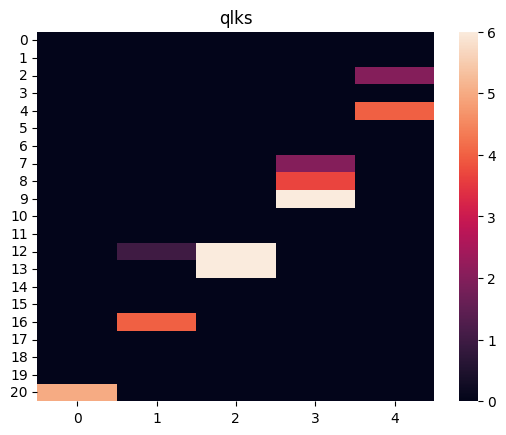

In [462]:
z = np.zeros((21,5))
ds = pd.DataFrame(s,columns=['Q', 'T', 'x'])
h = ds.groupby(['Q','T']).mean().reset_index()
a = h.to_numpy()
for i in range(21): #mx 20
    for ii in range(6): #mx 5
        for iii in range(len(a[:])):
            if i == a[:,0][iii] and ii == a[:,1][iii]:
                z[int(i),int(ii)] = a[iii,2]
        
sns.heatmap(z)
plt.title('qlks');

In [ ]:

plt.hist2d(x, y, weights = z, bins=10, cmap='hot')# 
# Add a colorbar
plt.colorbar()
# Add labels and a title
plt.xlabel('Q')
plt.ylabel('T')
plt.title('Heatmap states from test')
plt.show()


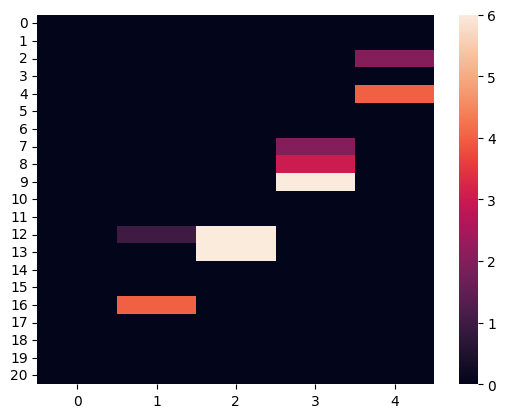

In [223]:

for i in range(20): #mx 20
    for ii in range(5): #mx 5
        for iii in range(len(s[:])):
            if i == s[:,0][iii] and ii == s[:,1][iii]:
                z[int(i),int(ii)] = s[iii,2]
        
sns.heatmap(z);

In [ ]:

plt.imshow(s[:,2], cmap ="RdYlBu")
  
# Displaying a color bar to understand
# which color represents which range of data
plt.colorbar()
  
# Assigning labels of x-axis 
# according to dataframe
plt.xticks(range(s[:,1]))
  
# Assigning labels of y-axis 
# according to dataframe
plt.yticks(range(s[:0]))
  
# Displaying the figure
plt.show()

In [ ]:

array = np.zeros((21, 5))
for q in s[:,0]:
    for t, ii in zip(s[:,1], range(s.shape[1])):
        #for ii in :
        #x = 
        array[int(q)][int(t)] = s[int(t)][int(q)][:]
        
sns.heatmap(array);

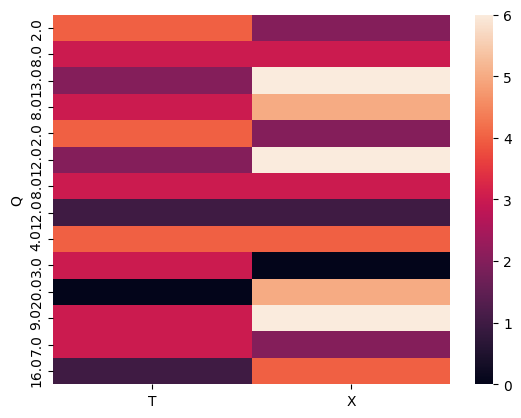

In [214]:
import pandas as pd
ds = pd.DataFrame(s,columns=['Q', 'T', 'X'])
ds.set_index(['Q'],inplace=True)

sns.heatmap(ds);

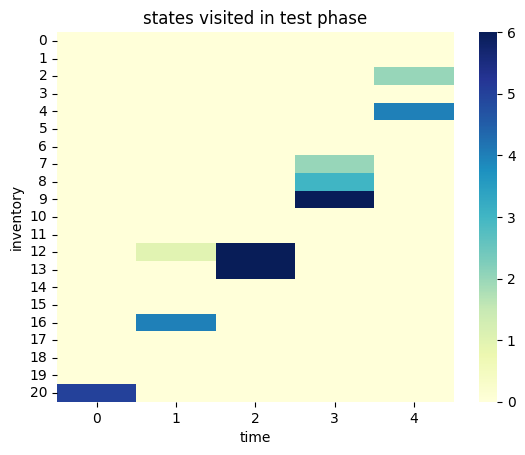

In [503]:
import numpy as np
import matplotlib.pyplot as plt

# Create the array
arr = np.array([ #Q, T, x
                [ 2., 4., 2.],
                [ 8., 3., 3.],
                [13., 2., 6.],
                [ 8., 3., 5.],
                [ 2., 4., 2.],
                [12., 2., 6.],
                [ 8., 3., 3.],
                [12., 1., 1.],
                [ 4., 4., 4.],
                [ 3., 3., 0.],
                [20., 0., 5.],
                [ 9., 3., 6.],
                [ 7., 3., 2.],
                [16., 1., 4.]])

# Get the x, y, and z values 
x = arr[:,1]
y = arr[:,0]
z = arr[:,2]

zz = np.zeros((21,5))
for i in range(21): #mx 20
    for ii in range(6): #mx 5
        for iii in range(len(z[:])):
            if i == arr[:,0][iii] and ii == arr[:,1][iii]:
                zz[int(i),int(ii)] = arr[iii,2]

            #else : zz[int(i),int(ii)] = np.nan
        
sns.heatmap(zz,cmap="YlGnBu")
plt.title('states visited in test phase')
plt.xlabel('time')
plt.ylabel('inventory')
plt.show()


In [490]:
df = pd.DataFrame(np.nan, index=np.arange(0,len(s)), columns=['Q', 'T', 'x'])
df

,Q,T,x
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN
5,NaN,NaN,NaN
6,NaN,NaN,NaN
7,NaN,NaN,NaN
8,NaN,NaN,NaN
9,NaN,NaN,NaN


<AxesSubplot: >

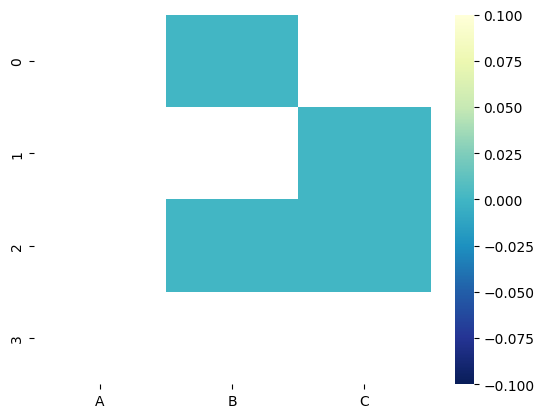

In [506]:
import seaborn as sns
import pandas as pd
import numpy as np

# create a DataFrame with NaNs and zeros
df = pd.DataFrame({'A': [1, 2, 3, np.nan],
                   'B': [0, 5, 0, 3],
                   'C': [np.nan, 0, 0, 1]})

# replace NaNs with -999
df = df.fillna(-999)

# create a mask to differentiate between -999 and 0 values
mask = df != 0

# plot the data with the mask
sns.heatmap(df, mask=mask, cmap="YlGnBu_r")


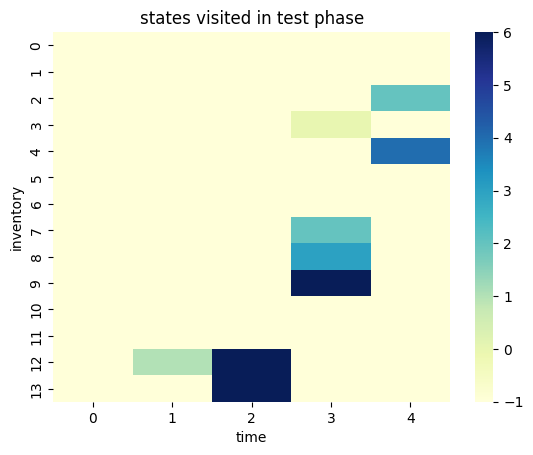

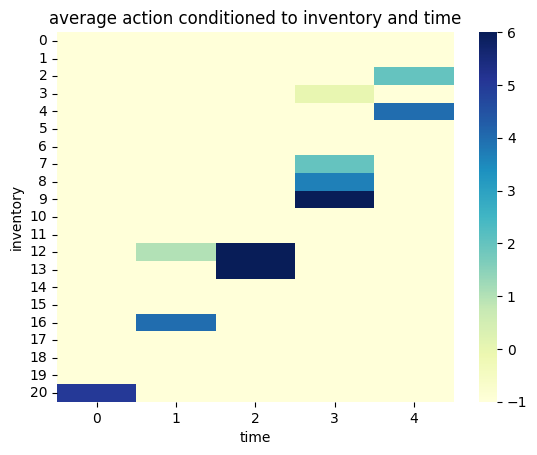

In [572]:
def heat(states, actions = False):
    arr = states
    df = pd.DataFrame(np.nan, index=np.arange(0,len(arr)), columns=['1', '2', '3', '4', '5'])#np.zeros((21,5))
    df = df.fillna(-1)
    mask = df != -999
    zz = df.to_numpy()
    for i in range(len(zz)): #mx 20
        for ii in range(6): #mx 5
            for iii in range(len(zz[:])):
                if i == arr[:,0][iii] and ii == arr[:,1][iii]:
                    zz[int(i),int(ii)] = arr[iii,2]
    sns.heatmap(zz, cmap="YlGnBu" )
    plt.title('states visited in test phase')
    plt.xlabel('time')
    plt.ylabel('inventory')
    plt.show()
    ##
    df = pd.DataFrame(np.nan, index=np.arange(0,21), columns=['1', '2', '3', '4', '5'])
    df = df.fillna(-1)
    z = df.to_numpy()#np.zeros((21,5))
    ds = pd.DataFrame(arr,columns=['Q', 'T', 'x'])
    h = ds.groupby(['Q','T']).mean().reset_index()
    a = h.to_numpy()
    for i in range(21): #mx 20
        for ii in range(5): #mx 5
            for iii in range(len(a[:])):
                if i == a[:,0][iii] and ii == a[:,1][iii]:
                    z[int(i),int(ii)] = a[iii,2]
    sns.heatmap(z, cmap="YlGnBu")
    sns.color_palette("rocket_r", as_cmap=True)
    plt.title('average action conditioned to inventory and time')
    plt.xlabel('time')
    plt.ylabel('inventory')
    plt.show()
heat(s)

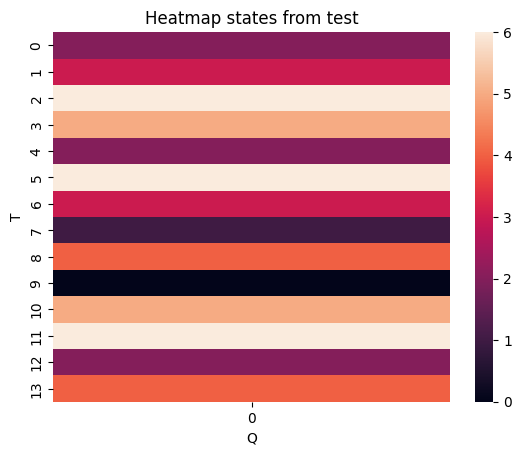

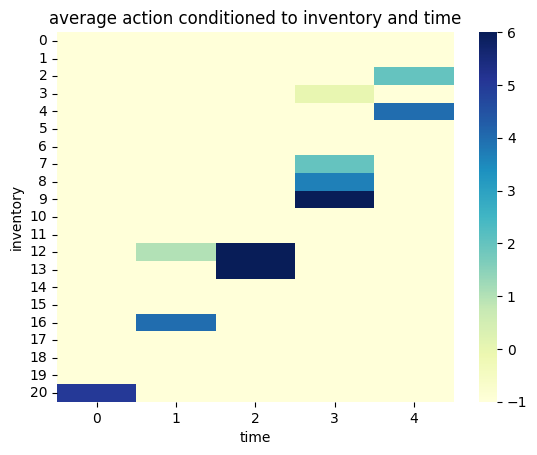

(14,)


In [566]:
def plot_heat(states):
        # Get the x, y, and z values
        arr = np.asarray(states)

        x = arr[:,1]
        y = arr[:,0]
        zz = arr[:,2]

        
        df = pd.DataFrame(np.nan, index=np.arange(0,21), columns=['1', '2', '3', '4', '5'])
        df = df.fillna(-1)
        z = df.to_numpy()
        ds = pd.DataFrame(arr,columns=['Q', 'T', 'x'])
        h = ds.groupby(['Q','T']).mean().reset_index()
        a = h.to_numpy()
        for i in range(21): #mx 20
            for ii in range(5): #mx 5
                for iii in range(len(a[:])):
                    if i == a[:,0][iii] and ii == a[:,1][iii]:
                        z[int(i),int(ii)] = a[iii,2]

        # Create the heatmap
        #plt.hist2d(x, y, weights = zz, cmap='hot')# bins=10,
        sns.heatmap(zz.reshape(-1,1))
        # Add a colorbar
        #plt.colorbar()

        # Add labels and a title
        plt.xlabel('Q')
        plt.ylabel('T')
        plt.title('Heatmap states from test')
        plt.show()

        sns.heatmap(z, cmap="YlGnBu")
        sns.color_palette("rocket_r", as_cmap=True)
        plt.title('average action conditioned to inventory and time')
        plt.xlabel('time')
        plt.ylabel('inventory')
        plt.show()
        print(zz.shape)
plot_heat(s)

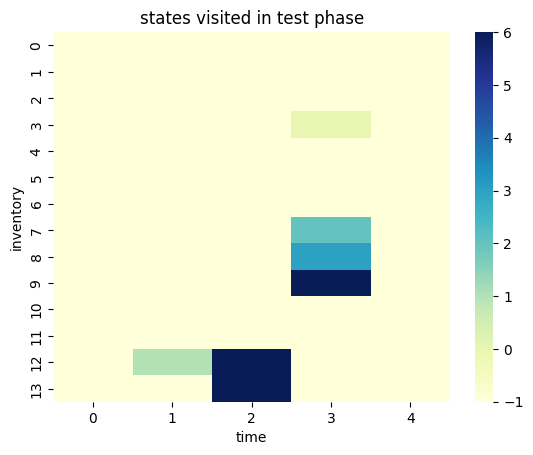

In [552]:
arr = s
df = pd.DataFrame(np.nan, index=np.arange(0,len(arr)), columns=['1', '2', '3', '4', '5'])#np.zeros((21,5))
df = df.fillna(-1)
mask = df != -999
zz = df.to_numpy()
for i in range(len(arr)): #mx 20
    for ii in range(arr.shape[1]+1): #mx 5
        for iii in range(len(zz[:])):
            if i == arr[:,0][iii] and ii == arr[:,1][iii]:
                zz[int(i),int(ii)] = arr[iii,2]
sns.heatmap(zz, cmap="YlGnBu" )
plt.title('states visited in test phase')
plt.xlabel('time')
plt.ylabel('inventory')
plt.show()


In [542]:
zz.shape

(14, 5)

In [487]:
df = pd.DataFrame(zz)
df

,0,1,2,3,4
0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,2.0
3,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,4.0
5,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,2.0,0.0
8,0.0,0.0,0.0,3.0,0.0
9,0.0,0.0,0.0,6.0,0.0


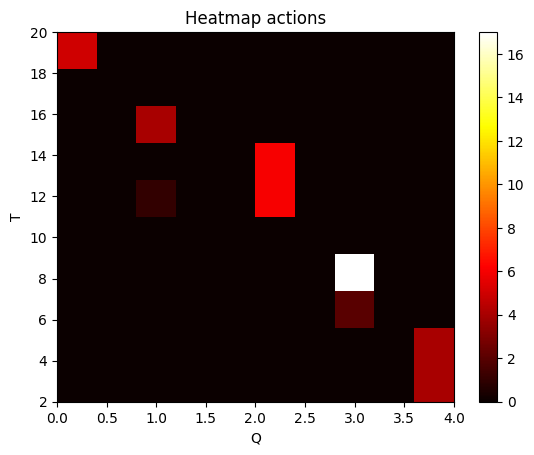

In [473]:

# Create the heatmap
plt.hist2d(x, y, weights = z, bins=10, cmap='hot')

# Add a colorbar
plt.colorbar()

# Add labels and a title
plt.xlabel('Q')
plt.ylabel('T')
plt.title('Heatmap actions')
plt.show()


In [ ]:
import numpy as np
import seaborn as sns
array = np.zeros((21, 5))
for q in s[:,0]:
    for t, ii in zip(s[:,1], range(s.shape[1])):
        array[int(q)][int(t)] = s[int(q),int(t)][ii]
        
sns.heatmap(array);

In [ ]:
df = pd.DataFrame(s, columns=['Q','T','x'])
h = df.groupby(['T']).mean().reset_index()
df

In [ ]:
import numpy as np
import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt

vegetables = arr[:,0]
farmers    = arr[:,1]
harvest    = arr[:,2]


fig, ax = plt.subplots()
im = ax.imshow(harvest)

# Show all ticks and label them with the respective list entries
ax.set_xticks(np.arange(len(farmers)), labels=farmers)
ax.set_yticks(np.arange(len(vegetables)), labels=vegetables)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(vegetables)):
    for j in range(len(farmers)):
        text = ax.text(j, i, harvest[i, j],
                       ha="center", va="center", color="w")

ax.set_title("Harvest of local farmers (in tons/year)")
fig.tight_layout()
plt.show()

In [ ]:
import numpy as np
import seaborn as sns
array = np.zeros((21, 5))
for q in s[:,0]:
    for t, ii in zip(s[:,1], range(s.shape[1])):
        #for ii in :
        #x = 
        array[int(q)][int(t)] = s[int(t)][int(q)][:]
        
sns.heatmap(array);

In [ ]:
array = np.zeros((21, 5))
for q in int(s[:, 0]):
    for t in int(s[:, 1]):
        x = s[:,q][t]
        array[q][t] = x
array

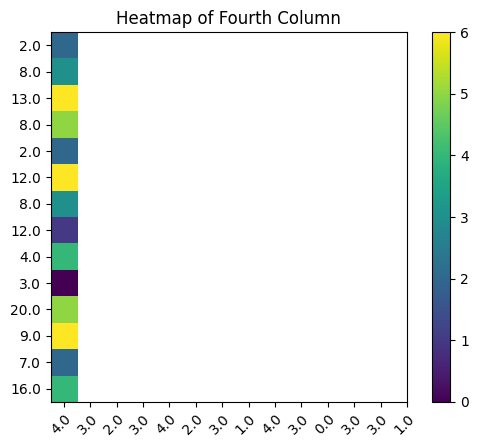

In [114]:
import matplotlib.pyplot as plt
import numpy as np

# Create a sample matrix of occurrences with 4 columns
matrix = s#np.array([[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]])

# Select the columns for the heatmap
heatmap_data = matrix[:, 2][:] # fourth column
x_axis_labels = matrix[:, 1][:] # second column
y_axis_labels = matrix[:, 0][:] # first column

# Reshape the data for the heatmap
heatmap_data = heatmap_data.reshape(len(y_axis_labels),1)

# Create a heatmap of the data
fig, ax = plt.subplots()
im = ax.imshow(heatmap_data, cmap='viridis')

# Set the x-axis and y-axis labels
ax.set_xticks(np.arange(len(x_axis_labels)))
ax.set_yticks(np.arange(len(y_axis_labels)))
ax.set_xticklabels(x_axis_labels)
ax.set_yticklabels(y_axis_labels)

# Rotate the x-axis labels and set the title
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
ax.set_title("Heatmap of Fourth Column")

# Add a colorbar to show the scale of the values
cbar = ax.figure.colorbar(im, ax=ax)

# Display the plot
plt.show()


-20.0
[-4.01  -4.005 -4.    -3.995 -3.99 ] 0.1


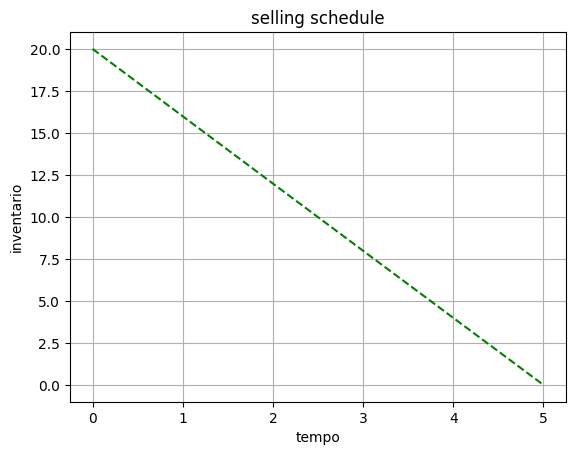

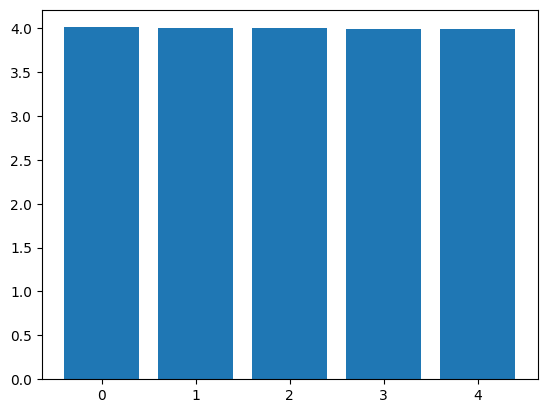

In [433]:
import numpy as np
import matplotlib.pyplot as plt
T = 5
q_0 = 20
gamma = 1e-6#0.1
V = 100
mu = -0.001
kappa = 0.001*V
v_t = np.zeros(T+1)
for t in range(T+1):

    v_t[t] = np.divide((T-t)*(4*kappa*V*q_0+mu*V*t*T),4*kappa*V*T)#q_0 * (1/T + (T+1-2*t)/(4*kappa)*mu)#np.divide(mu*V*(T-2*t),4*kappa)-np.divide(q_0,T)#np.divide((T-t)*(4*kappa*V*q_0+mu*V*t*T),4*kappa*V*T)#q_0 * (1/T + (T+1-2*t)/(4*kappa)*mu)###np.divide(mu*V*(-2*t+T),4*kappa)*(q_0/T)

print(np.sum(np.diff(v_t)))
print(np.diff(v_t), kappa)
plt.plot(v_t, '--', color = 'g')
plt.title('selling schedule')
plt.xlabel('tempo')
plt.ylabel('inventario')
plt.grid(True)
plt.show()
plt.bar(np.arange(0,5),np.abs(np.diff(v_t)))
plt.show()



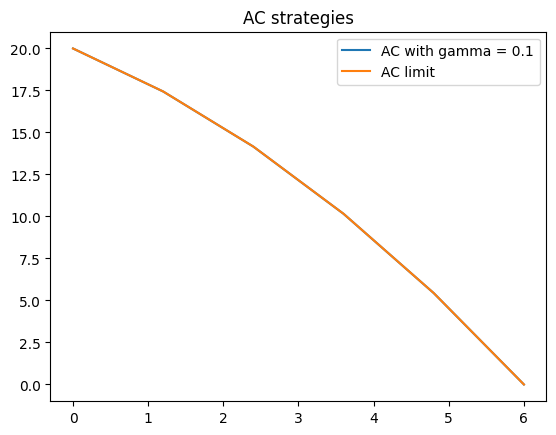

[2.56197825 3.28072703 3.99971201 4.71898498 5.43859772] 0.1 [20.0, 17.438021748725077, 14.1572947225377, 10.157582707677648, 5.438597723150451, 0.0]


In [447]:
import math as m
def grafici():
    T_f=6
    time=np.linspace(0,T_f,6)
    values_AC = []
    values_AC_limit=[]
    q_0=20

    
    mu=0.001
    V=100
    gamma=0.001/V
    eta=V*0.001
    sigma=0.1
            
    b=V*(pow(sigma,2))*gamma/(2*eta)
    a=-(V*mu)/(2*eta)
    
    for t in time:
        values_AC.append(((q_0+(a/b))*(m.sinh(m.sqrt(b)*(T_f-t)))+(a/b)*m.sinh(m.sqrt(b)*t))/m.sinh(m.sqrt(b)*T_f)-(a/b))
        values_AC_limit.append((T_f-t)*(4*eta*q_0+mu*V*t*T_f)/(4*eta*T_f))

    v = -np.asarray(values_AC)
    plt.plot(time, values_AC )
    plt.plot(time,values_AC_limit)
    plt.title('AC strategies')
    plt.legend(['AC with gamma = ' + str(eta), 'AC limit'])
    plt.show()
    print(np.diff(v), eta, values_AC)
    #plt.plot()
grafici()

In [364]:
0.001*100, -3.1215703531631366e-07*100

(0.1, -3.121570353163137e-05)

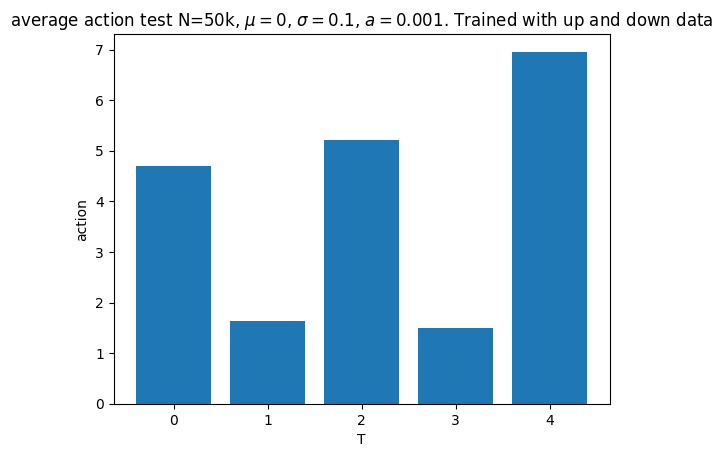

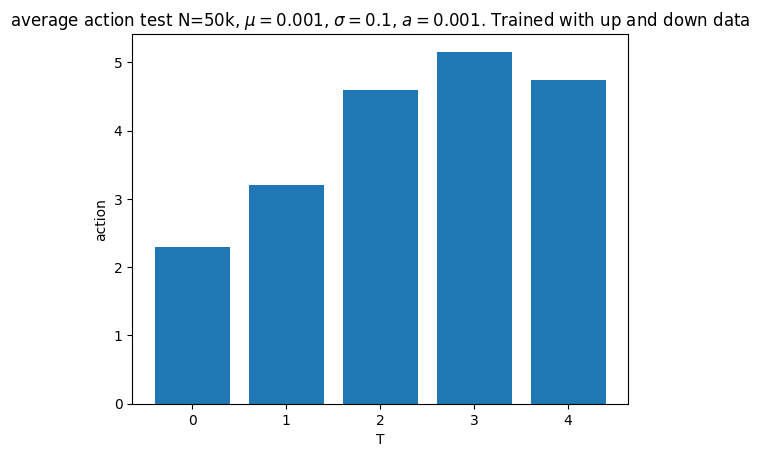

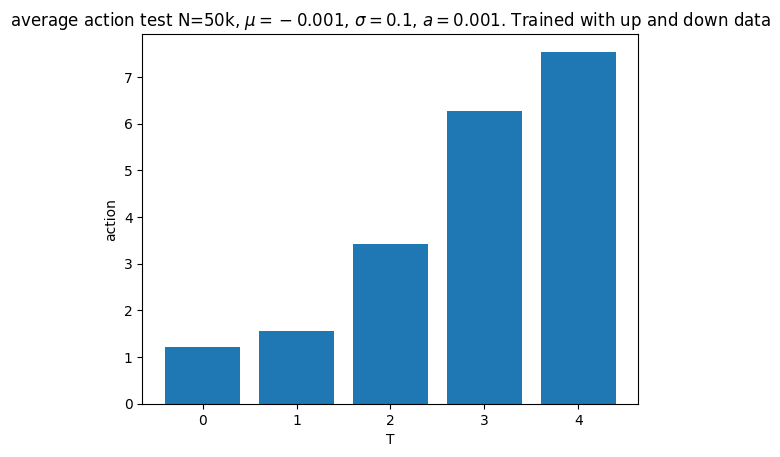

In [451]:
v0ud = [4.70275  ,  1.62925 ,   5.21408333, 1.4965  ,   6.95741667]
v1ud = [2.30241667, 3.20591667, 4.598,      5.15525 ,   4.7385    ] 
v2ud = [1.21216667, 1.55658333, 3.41558333, 6.278  ,    7.53775   ]
x = np.arange(0,5)
plt.bar(x,v0ud)
plt.title('average action test N=50k, $\mu=0$, $\sigma=0.1$, $a = 0.001$. Trained with up and down data')
plt.xlabel('T')
plt.ylabel('action')
plt.show()
plt.bar(x,v1ud)
plt.title('average action test N=50k, $\mu=0.001$, $\sigma=0.1$, $a = 0.001$. Trained with up and down data')
plt.xlabel('T')
plt.ylabel('action')
plt.show()
plt.bar(x,v2ud)
plt.title('average action test N=50k, $\mu=-0.001$, $\sigma=0.1$, $a = 0.001$. Trained with up and down data')
plt.xlabel('T')
plt.ylabel('action')
plt.show()

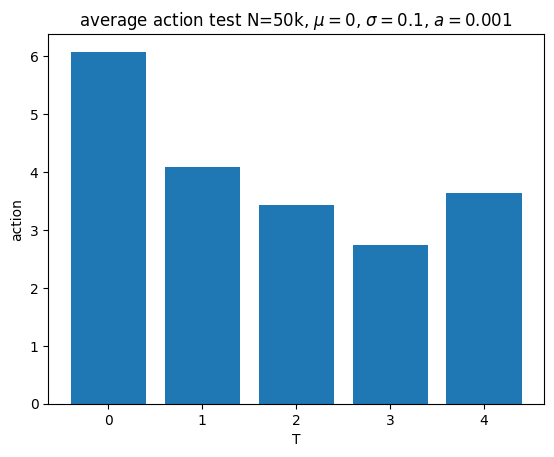

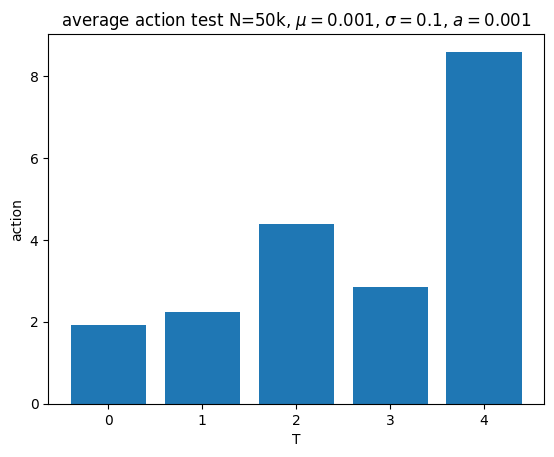

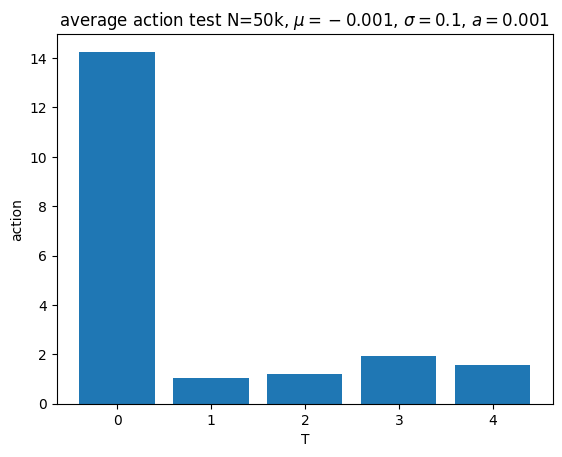

In [450]:
v0 = [2.6456,     3.16177778, 3.39084444, 1.94275556, 8.8592    ]
v1 = [1.9295 ,    2.23   ,    4.39375 ,   2.85683333 ,8.58991667]
v_1 = [14.25533333 , 1.03483333 , 1.19941667 , 1.94366667,  1.56683333]
v00 = [6.08202083, 4.09252083, 3.4345625,  2.74847917, 3.64245833]
x = np.arange(0,5)
plt.bar(x,v00)
plt.title('average action test N=50k, $\mu=0$, $\sigma=0.1$, $a = 0.001$')
plt.xlabel('T')
plt.ylabel('action')
plt.show()
plt.bar(x,v1)
plt.title('average action test N=50k, $\mu=0.001$, $\sigma=0.1$, $a = 0.001$')
plt.xlabel('T')
plt.ylabel('action')
plt.show()
plt.bar(x,v_1)
plt.title('average action test N=50k, $\mu=-0.001$, $\sigma=0.1$, $a = 0.001$')
plt.xlabel('T')
plt.ylabel('action')
plt.show()

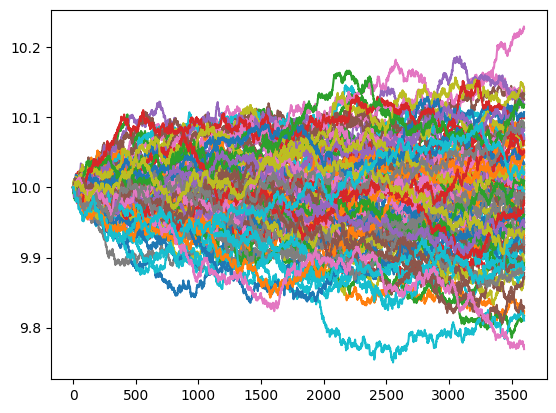

In [460]:
def abmUD(seed = 14, numIt = 10):
        mu = 0.001
        sigma = 0.1
        '''
        returns a matrix of Arithmetic Brownian Motion paths, p=0.5 mu = +0.001 or p=0.5 mu = -0.001
        '''
        X = np.zeros((3600 + 1, numIt), dtype=float)
        np.random.seed(seed)

        def up():

            N = 3600
            I = 1
            dt= 1.0 / 3600
            X = np.zeros((N + 1, I), dtype=float)
            X[0] = 10

            for i in range(N):
                X[i + 1] = X[i] + mu * dt + sigma * np.sqrt(dt) * np.random.standard_normal(I)
            return X

        def dn():

            N = 3600
            I = 1
            dt= 1.0 / 3600
            X = np.zeros((N + 1, I), dtype=float)
            X[0] = 10
            for i in range(N):
                X[i + 1] = X[i] - mu * dt + sigma * np.sqrt(dt) * np.random.standard_normal(I)
            return X

        for i in range(numIt):

            c = np.random.binomial(1, 0.5)
            if c == 1:#i%2 == 0:#

                X[:,i] = up().reshape(-1)
            else :

                X[:,i] = dn().reshape(-1)

        return X

plt.plot(abmUD(numIt = 100));

In [ ]:
    def test_AC(self, current_state, data_set):
        q_0=self.initial_capital
        
        T_f = self.number_trading_decisions

        mu=-0.001
        gamma=self.AC_risk_aversion
        V=100
        eta=V*self.a_penalty/10
        sigma=2
                
        b=V*(pow(sigma,2))*gamma/(2*eta)
        a=-(V*mu)/(2*eta)
        
        q_future= ((q_0+(a/b))*(m.sinh(m.sqrt(b)*(T_f-current_state.time-1)))+(a/b)*m.sinh(m.sqrt(b)*(current_state.time+1)))/m.sinh(m.sqrt(b)*T_f)-(a/b)
        q_present =  ((q_0+(a/b))*(m.sinh(m.sqrt(b)*(T_f-current_state.time)))+(a/b)*m.sinh(m.sqrt(b)*current_state.time))/m.sinh(m.sqrt(b)*T_f)-(a/b)
        x = action(q_present-q_future)

 
        reward = self.calculate_reward(current_state, x, data_set)

        qdr_var = self.calculate_qdr_var(current_state, data_set)
        price=self.calculate_price(current_state,data_set)
        
        next_state = state(
            (current_state.inventory - x.amount_sold),
            current_state.time + 1,
            qdr_var,
            price,
        )
        return (current_state, x, next_state, reward)

In [55]:
def abm(mu, sigma, seed = 14, numIt=10):
    '''
    returns a matrix of Arithmetic Brownian Motion paths
    '''
    N = 3600
    I = numIt
    dt= 1.0 / 3600
    X = np.zeros((N + 1, I), dtype=float)
    X[0] = 10
    np.random.seed(seed)
    np.random.seed(seed)
    for i in range(N):
    
        X[i + 1] = X[i] + mu * dt + sigma * np.sqrt(dt) * np.random.standard_normal(I) 

    return np.abs(X)

In [245]:
np.random.binomial(1, 0.5)

1

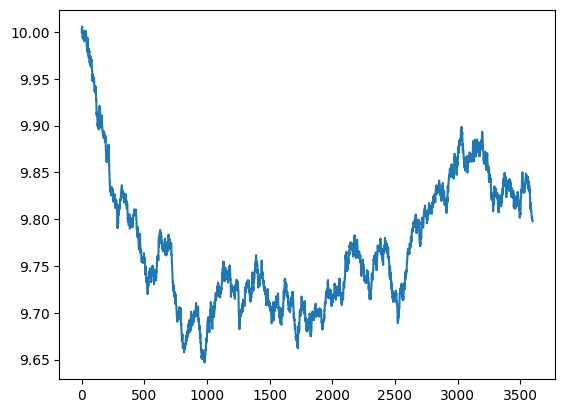

In [58]:
from matplotlib import pyplot as plt
data = abm(mu=-1e-1,sigma=0.2,numIt=1)
#data1 = abm(mu=1e-1,sigma=0.2,numIt=1)
plt.plot(data);
#plt.plot(data1);

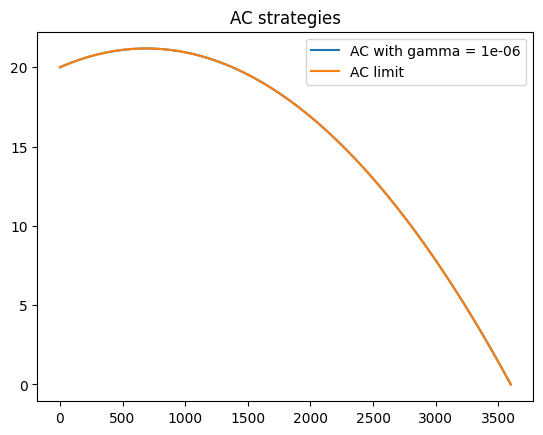

[-1.1839990764856339, 1.408000409603119, 3.9999998956918716, 6.591999500989914, 9.18399927020073] [-1.184000000000001, 1.4080000000000013, 3.9999999999999982, 6.5920000000000005, 9.184000000000001]


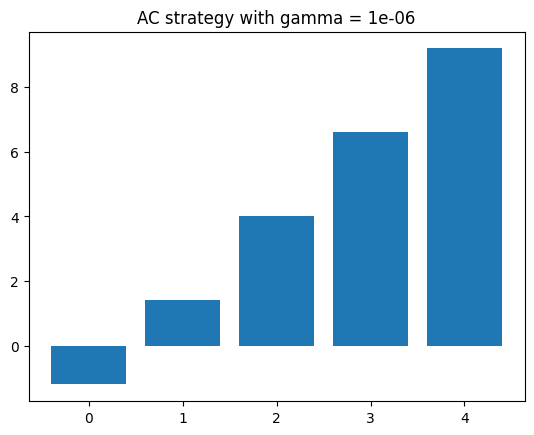

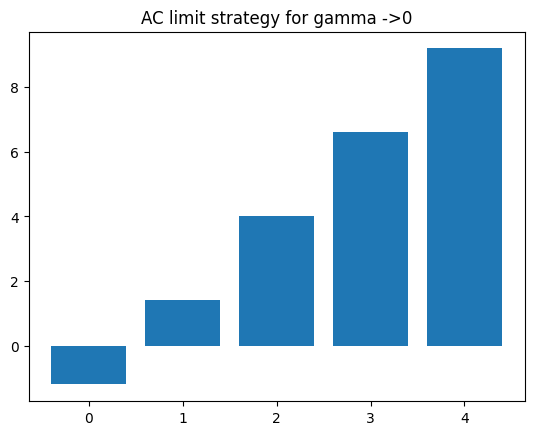

In [91]:
import math as m
starting_trading_time = 15 * 60

finishing_trading_time = 75 * 60
time_subdivisions = m.floor(
            (finishing_trading_time - starting_trading_time) / 5)

T_f=3600
time=np.linspace(0,T_f,50)
values_AC=[]
values_AC_limit=[]
q_0=20
q_now_AC=20
q_now_AC_limit=20
M=time_subdivisions

mu=1e-8
gamma=0.000001
V=1
eta=V*0.001
sigma=0.00001
        
b=V*(pow(sigma,2))*gamma/(2*eta)
a=-(V*mu)/(2*eta)

for t in time:
    values_AC.append(((q_0+(a/b))*(m.sinh(m.sqrt(b)*(T_f-t)))+(a/b)*m.sinh(m.sqrt(b)*t))/m.sinh(m.sqrt(b)*T_f)-(a/b))
    values_AC_limit.append((T_f-t)*(4*eta*q_0+mu*V*t*T_f)/(4*eta*T_f))

plt.plot(time,values_AC)
plt.plot(time,values_AC_limit)
plt.title('AC strategies')
plt.legend(['AC with gamma = ' + str(gamma), 'AC limit'])
plt.show()

x_AC=[]
x_AC_limit=[]
for t in range(5):
    next_t=(t+1)*M
    q_future_AC=((q_0+(a/b))*(m.sinh(m.sqrt(b)*(T_f-next_t)))+(a/b)*m.sinh(m.sqrt(b)*next_t))/m.sinh(m.sqrt(b)*T_f)-(a/b)
    q_future_AC_limit=((T_f-next_t)*(4*eta*q_0+mu*V*next_t*T_f)/(4*eta*T_f))
    x_AC.append(q_now_AC-q_future_AC)
    x_AC_limit.append(q_now_AC_limit-q_future_AC_limit)
    q_now_AC=q_future_AC
    q_now_AC_limit=q_future_AC_limit

print(x_AC,x_AC_limit)
plt.bar([0,1,2,3,4],x_AC)
plt.title('AC strategy with gamma = ' +str(gamma))
plt.show()
plt.bar([0,1,2,3,4],x_AC_limit)
plt.title('AC limit strategy for gamma ->0')
plt.show()

In [88]:
import numpy as np

def abm50(seed = 14, numIt=1):
    '''
    returns a matrix of Arithmetic Brownian Motion paths
    '''
    N = 3600
    I = numIt
    dt= 1.0 / 3600
    X = np.zeros((N + 1, I), dtype=float)
    X[0] = 10
    np.random.seed(seed)
    step = 5
    for i in range(N): # va su I
        X[i + 1] = X[i] + 0.01 * dt + 0.01 * np.sqrt(dt) * np.random.standard_normal(I)
        X[i + 1] = X[i] - 0.01 * dt + 0.01 * np.sqrt(dt) * np.random.standard_normal(I)
         

    return X

In [93]:
abm(numIt=10)

array([[10.        , 10.        , 10.        , ..., 10.        ,
        10.        , 10.        ],
       [10.00025578, 10.00001042, 10.00002622, ..., 10.00003241,
         9.99990419, 10.00017798],
       [10.00022195, 10.00001009,  9.99984418, ..., 10.00015929,
         9.99986183,  9.99985988],
       ...,
       [10.02324298,  9.99305323,  9.99132634, ..., 10.00062135,
         9.99163986,  9.98106208],
       [10.02321105,  9.99278036,  9.99159019, ..., 10.00042186,
         9.99146979,  9.98089597],
       [10.02329128,  9.99287943,  9.99183253, ..., 10.00034586,
         9.99166323,  9.98092424]])

In [90]:
def abmUD(seed = 14, numIt = 1):

    X = np.zeros((3600 + 1, numIt), dtype=float)
    np.random.seed(seed)
    sigma = 0.01
    mu = 0

    def up():

        N = 3600
        I = 1
        dt= 1.0 / 3600
        X = np.zeros((N + 1, I), dtype=float)
        X[0] = 10
        
        for i in range(N):
            X[i + 1] = X[i] + mu * dt + sigma * np.sqrt(dt) * np.random.standard_normal(I)
        return X
    
    def dn():

        N = 3600
        I = 1
        dt= 1.0 / 3600
        X = np.zeros((N + 1, I), dtype=float)
        X[0] = 10
        for i in range(N):
            X[i + 1] = X[i] - mu * dt + sigma * np.sqrt(dt) * np.random.standard_normal(I)
        return X
    
    for i in range(numIt):

        #c = np.random.binomial(1, 0.5)
        if i%2 == 0:

            X[:,i] = up().reshape(-1)
        else :

            X[:,i] = dn().reshape(-1)

    return X


''

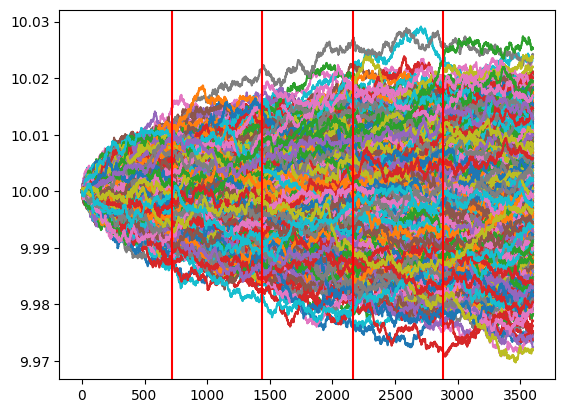

In [91]:
from matplotlib import pyplot as plt
data = abm(numIt=1_000)
plt.plot(data)
for i in range(1,5):
    plt.axvline(len(data)/5*i,color='r')
;

In [92]:
abmUD(numIt=5)

array([[10.        , 10.        , 10.        , 10.        , 10.        ],
       [10.00025856,  9.99981038,  9.99988965, 10.00000981,  9.99997123],
       [10.00027175,  9.9997259 , 10.00010032, 10.00012889,  9.99988084],
       ...,
       [ 9.9949068 ,  9.98146403, 10.02099406, 10.00357395, 10.00581201],
       [ 9.99490697,  9.98153394, 10.02089398, 10.00343154, 10.00574485],
       [ 9.99489043,  9.98198927, 10.02100638, 10.0033548 , 10.00579205]])

In [93]:
5%2


1

In [94]:
def run_simulation():
    """
    Return the result of one full simulation.
    """
    T_INIT = 0
    T_END  = 1
    N      = 3500  # Compute 7200 grid points
    DT     = float(T_END - T_INIT) / N
    TS = np.arange(T_INIT, T_END + DT, DT)

    THETA = 0.2
    MU    = 10
    SIGMA = 0.001
    seed = 14

    Y_INIT = 10

    np.random.seed(seed)
    
    def mu(y: float, _t: float) -> float:
        """
        Implement the Ornstein-Uhlenbeck mu.
        """
        return THETA * (MU - y)

    def sigma(_y: float, _t: float) -> float:
        """
        Implement the Ornstein-Uhlenbeck sigma.
        """
        return np.sqrt(SIGMA) * _y

    def dW(delta_t: float) -> float:
        """
        Sample a random number at each call.
        """
        return np.random.normal(loc=0.0, scale=np.sqrt(delta_t))

    ys = np.zeros(N + 1)
    ys[0] = Y_INIT
    step = TS.size/5
    for i in range(1, TS.size):
        t = T_INIT + (i - 1) * DT
        y = ys[i - 1]
        if i < step :
            ys[i] = y + mu(y, t) * DT + sigma(y, t) * dW(DT)
        elif step < i < step*2:
            ys[i] = y - mu(y, t) * DT + sigma(y, t) * dW(DT)
        elif step < i < step*3:
            ys[i] = y + mu(y, t) * DT + sigma(y, t) * dW(DT)
        elif step < i < step*4:
            ys[i] = y - mu(y, t) * DT + sigma(y, t) * dW(DT)
        elif step < i < step*5:
            ys[i] = y + mu(y, t) * DT + sigma(y, t) * dW(DT)
        else:
            ys[i] = y - mu(y, t) * DT + sigma(y, t) * dW(DT)
    return ys

In [95]:
def cir_(seed = 14, numIt=2):
    '''
    returns a matrix of Arithmetic Brownian Motion paths
    '''
    N = 3600
    I = numIt
    dt= 1.0 / 3600
    mu = 5
    theta = 0.1
    c = 0.001
    sigma = 0
    X =np.zeros((N + 1, I), dtype=float)
    X[0] = 10
    np.random.seed(seed)
    step = 5
    for i in range(N):


        X[i + 1] = (theta * (mu - X[i])) * dt + c * np.sqrt(dt) * np.random.standard_normal(I)  

    return X
   

''

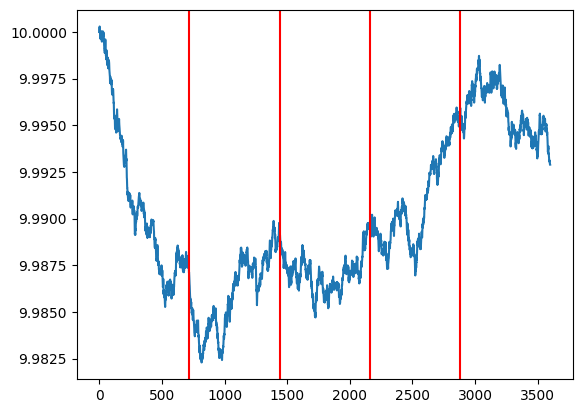

In [96]:
from matplotlib import pyplot as plt
data = abm()
plt.plot(data)
for i in range(1,5):
    plt.axvline(len(data)/5*i,color='r')
;

In [97]:
import numpy as np
#import progetto as p
slices = 5

def sliceData(price, slici):

    step = int(len(price)/slici)
    y = np.zeros((slici,step))

    for i, ii in zip(range(slici), range(step, len(price), step)):
        it = step * i
        y[i, :] = price[it:ii]

    return y

act_hist = []
loss_hist = []
rew_hist = []
#inv = 20
tempo = 0
numTrain = 100

for j in range(3):
    s = p.Ambiente().abm().flatten()
    ss = sliceData(s, slices)
    inv = 20
    age = p.Agente(inventario = inv, numTrain = numTrain)

    for i in range(slices):

        tempo += 1
        data = ss[i,:] # considero slice da 5 (720 osservazioni alla volta)

        if i < 4:
            loss, new_inv, action, reward = age.step(inv, tempo, data) 
            inv = new_inv 
            act_hist.append(action)
            loss_hist.append(loss)
            rew_hist.append(reward)

        elif i == 4:
            loss, new_inv, action_1, reward_1 = age.step(inv, tempo, data) 
            inv = new_inv
            act_hist.append(action_1)
            rew_hist.append(reward_1)

        else : 
            loss, new_inv, action_2, reward_2 = age.step(inv, tempo, data) 
            inv = new_inv
            act_hist.append(action_2)
            rew_hist.append(reward_2)

    print(act_hist, loss_hist, rew_hist)


NameError: name 'p' is not defined

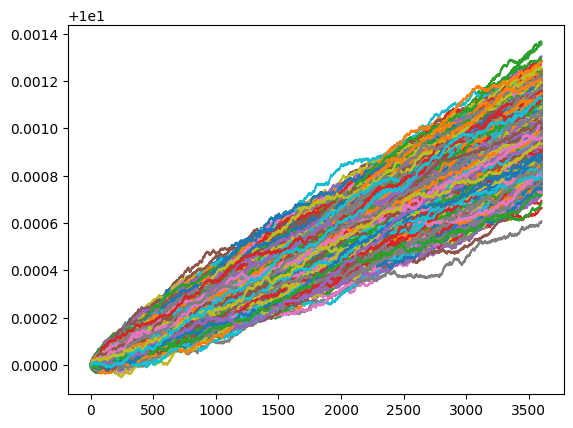

In [ ]:
import numpy as np
np.random.uniform(0,20)
import modello_ABM_Q_T_plots_draft as p
import matplotlib.pyplot as plt
plt.plot(p.Ambiente().abm(numIt = 3_000));

In [98]:
n = 20
p = 1/(5 - 0)
action = np.random.binomial(n, p)
action =  np.linspace(0,20,20)[action]
round(action)

3

In [99]:
aa = np.asarray(a)
ai = aa.reshape(-1,5)
mean=ai.mean(axis=0)#np.empty((ai.shape[0]))
#for i in range(5):
#    mean[i] = np.mean(ai[i,:])

mean




NameError: name 'a' is not defined

In [4]:
import matplotlib.pyplot as plt
import numpy as np
a = [20, 0, 0, 0, 0, 12, 1.6, 6.4, 0, 0, 0, 20, 0, 0, 0, 0, 0, 20, 0, 0, 20, 0, 0, 0, 0, 1, 19, 0, 0, 0, 3.3333333333333335, 2, 14, 0.22222222222222263, 0, 20, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3.3333333333333335, 0, 4.166666666666667, 0, 0, 20, 0, 0, 0, 0, 3.3333333333333335, 4, 10, 2.666666666666668, 0, 20, 0, 0, 0, 0, 3.3333333333333335, 2, 14.666666666666668, 0, 0, 20, 0, 0, 0, 0, 3.3333333333333335, 16, 0.6666666666666679, 0, 0, 20, 0, 0, 0, 0, 3, 3, 2, 4.0, 8.0, 20, 0, 0, 0, 0, 14, 1.2, 4, 0.2666666666666666, 0, 1, 19, 0, 0, 0, 1, 19, 0, 0, 0, 20, 0, 0, 0, 0, 1, 0, 19, 0, 0, 20, 0, 0, 0, 0, 0, 0, 0, 0, 10.0, 3.3333333333333335, 3.3333333333333335, 13, 0, 0, 0, 0, 20, 0, 0, 18, 0.4, 1.6, 0, 0, 20, 0, 0, 0, 0, 1, 3.8, 2, 4.3999999999999995, 8.8, 12, 1.6, 0, 0, 0, 3.3333333333333335, 16.666666666666668, 0, 0, 0, 15, 5, 0, 0, 0, 20, 0, 0, 0, 0, 20, 0, 0, 0, 0, 0, 20, 0, 0, 0, 14, 6, 0, 0, 0, 20, 0, 0, 0, 0, 20, 0, 0, 0, 0, 20, 0, 0, 0, 0, 20, 0, 0, 0, 0, 3.3333333333333335, 16.666666666666668, 0, 0, 0, 20, 0, 0, 0, 0, 20, 0, 0, 0, 0, 0, 20, 0, 0, 0, 10, 6, 4, 0, 0, 6, 6, 2.0, 3, 2, 5, 3.0, 4, 2.6666666666666665, 3, 0, 20, 0, 0, 0, 20, 0, 0, 0, 0, 20, 0, 0, 0, 0, 0, 6, 5, 8, 0.5, 0, 4.0, 7, 9, 0, 3.3333333333333335, 3.3333333333333335, 6, 2.4444444444444446, 4, 3.3333333333333335, 16.666666666666668, 0, 0, 0, 3.3333333333333335, 3.3333333333333335, 3.3333333333333335, 3.3333333333333335, 0, 20, 0, 0, 0, 0, 20, 0, 0, 0, 0, 20, 0, 0, 0, 0, 20, 0, 0, 0, 0, 3.3333333333333335, 0, 0, 0, 0, 20, 0, 0, 0, 0, 20, 0, 0, 0, 0, 20, 0, 0, 0, 0, 3.3333333333333335, 1, 5, 10.666666666666668, 0, 20, 0, 0, 0, 0, 0, 20, 0, 0, 0, 3.3333333333333335, 16, 0.16666666666666696, 0, 0, 20, 0, 0, 0, 0, 20, 0, 0, 0, 0, 20, 0, 0, 0, 0, 3.3333333333333335, 4, 6, 6, 0, 20, 0, 0, 0, 0, 3.3333333333333335, 0, 4.166666666666667, 0, 0, 1, 19, 0, 0, 0, 6, 2.8, 11.2, 0, 0, 1, 3.8, 3.8, 3, 4.199999999999999, 20, 0, 0, 0, 0, 3.3333333333333335, 3.3333333333333335, 0, 4.444444444444445, 0, 1, 19, 0, 0, 0, 20, 0, 0, 0, 0, 20, 0, 0, 0, 0, 15, 5, 0, 0, 0, 20, 0, 0, 0, 0, 20, 0, 0, 0, 0, 4, 4, 0, 12, 0, 20, 0, 0, 0, 0, 20, 0, 0, 0, 0, 0, 4.0, 0, 5.333333333333333, 5.333333333333334, 3.3333333333333335, 13, 3, 0.22222222222222263, 0.2222222222222226, 20, 0, 0, 0, 0, 20, 0, 0, 0, 0, 7, 13, 0, 0, 0, 20, 0, 0, 0, 0, 20, 0, 0, 0, 0, 11, 3, 0, 0, 6, 20, 0, 0, 0, 0, 20, 0, 0, 0, 0, 20, 0, 0, 0, 0, 20, 0, 0, 0, 0, 3.3333333333333335, 2, 14.666666666666668, 0, 0, 3.3333333333333335, 4, 12.666666666666668, 0, 0, 20, 0, 0, 0, 0, 20, 0, 0, 0, 0, 20, 0, 0, 0, 0, 20, 0, 0, 0, 0, 20, 0, 0, 0, 0, 3.3333333333333335, 0, 4.166666666666667, 12.5, 0, 3.3333333333333335, 16.666666666666668, 0, 0, 0, 12, 8, 0, 0, 0, 0, 20, 0, 0, 0, 20, 0, 0, 0, 0, 6, 2.8, 11.2, 0, 0, 20, 0, 0, 0, 0, 1, 2, 4.25, 8, 2.375, 20, 0, 0, 0, 0, 20, 0, 0, 0, 0, 4, 6, 2.5, 2.5, 2.5, 20, 0, 0, 0, 0, 18, 2, 0, 0, 0, 20, 0, 0, 0, 0, 20, 0, 0, 0, 0, 20, 0, 0, 0, 0, 20, 0, 0, 0, 0, 20, 0, 0, 0, 0, 12, 3, 0, 5, 0, 0, 20, 0, 0, 0, 9, 11, 0, 0, 0, 10, 2.0, 8.0, 0, 0, 3.3333333333333335, 16.666666666666668, 0, 0, 0, 0, 0, 0, 6.666666666666667, 13, 3, 0, 0, 5.666666666666667, 0, 1, 3.8, 3.8, 0, 5.699999999999999, 0, 20, 0, 0, 0, 20, 0, 0, 0, 0, 3.3333333333333335, 5, 11, 0.22222222222222263, 0, 20, 0, 0, 0, 0, 17, 0.6, 0, 0, 2.4, 20, 0, 0, 0, 0, 3.3333333333333335, 16.666666666666668, 0, 0, 0, 18, 0, 0.5, 0.5, 0.5, 20, 0, 0, 0, 0, 20, 0, 0, 0, 0, 20, 0, 0, 0, 0, 20, 0, 0, 0, 0, 17, 1, 2, 0, 0, 17, 3, 0, 0, 0, 20, 0, 0, 0, 0, 16, 4, 0, 0, 0, 20, 0, 0, 0, 0, 20, 0, 0, 0, 0, 3.3333333333333335, 16.666666666666668, 0, 0, 0, 7, 13, 0, 0, 0, 4, 3.2, 12.8, 0, 0, 20, 0, 0, 0, 0, 20, 0, 0, 0, 0, 13, 2, 0, 1.6666666666666667, 3, 3.3333333333333335, 16.666666666666668, 0, 0, 0, 20, 0, 0, 0, 0, 3.3333333333333335, 16.666666666666668, 0, 0, 0, 20, 0, 0, 0, 0, 3.3333333333333335, 0, 16, 0.22222222222222263, 0, 20, 0, 0, 0, 0, 20, 0, 0, 0, 0, 20, 0, 0, 0, 0, 0, 0, 0, 6, 0, 3.3333333333333335, 6, 8, 2.666666666666668, 0, 3.3333333333333335, 0, 0, 16.666666666666668, 0, 0, 0, 3, 5.666666666666667, 9, 9, 5, 1.5, 1.5, 0, 20, 0, 0, 0, 0, 20, 0, 0, 0, 0, 20, 0, 0, 0, 0, 20, 0, 0, 0, 0, 20, 0, 0, 0, 0, 1, 2, 4, 4.333333333333333, 8.666666666666668, 20, 0, 0, 0, 0, 7, 4, 7, 2, 0, 3.3333333333333335, 3.3333333333333335, 3.3333333333333335, 7, 0, 20, 0, 0, 0, 0, 7, 13, 0, 0, 0, 0, 20, 0, 0, 0, 14, 6, 0, 0, 0, 20, 0, 0, 0, 0, 3.3333333333333335, 0, 0, 0, 0, 3.3333333333333335, 9, 7, 0.6666666666666679, 0, 3.3333333333333335, 5, 11.666666666666668, 0, 0, 20, 0, 0, 0, 0, 0, 20, 0, 0, 0, 20, 0, 0, 0, 0, 0, 4.0, 0, 0, 16.0, 20, 0, 0, 0, 0, 3.3333333333333335, 16, 0.6666666666666679, 0, 0, 20, 0, 0, 0, 0, 20, 0, 0, 0, 0, 3.3333333333333335, 16.666666666666668, 0, 0, 0, 20, 0, 0, 0, 0, 20, 0, 0, 0, 0, 3.3333333333333335, 16.666666666666668, 0, 0, 0]
#aa = np.asarray(a)
#ai = aa.reshape(5,-1)
#mean=np.empty((ai.shape[0]))
#for i in range(5):
#    mean[i] = np.mean(ai[i,:])
#
#mean
aa = np.asarray(a)
ai = aa.reshape(-1,5)
mean = ai.mean(axis = 0)
var = ai.std(axis = 0)
mean, var

(array([12.04833333,  3.923     ,  1.72941667,  0.85555556,  0.57598611]),
 array([8.4133094 , 6.41266143, 4.00983547, 2.43318011, 2.15287431]))

In [2]:
def doAve(a):
    aa = np.asarray(a)
    ai = aa.reshape(-1, 5)
    step = 50
    mean = np.empty((int(len(ai)/step),5))#ai[:10, :].mean(axis = 0)
    std = np.empty(5)
    for i in range(ai.shape[1]):
        std[i] = np.std(np.double(ai[:,i]))#/(ai.shape[0] - 1)
    for i in range(step,int(len(ai)/step),step):
        mean[i,:] = ai[ :i, : ].mean(axis = 0)
    return np.double(mean), np.double(std)

doAve(a)

(array([[0. , 0. , 0.3, 1. , 0. ],
        [0. , 1. , 1. , 1. , 1. ],
        [1. , 1. , 1. , 0. , 0. ],
        [1. , 0.5, 0. , 0. , 1. ]]),
 array([8.4133094 , 6.41266143, 4.00983547, 2.43318011, 2.15287431]))

In [145]:
ai[ :50, : ].mean(axis = 0)

array([10.41333333,  4.70533333,  2.83      ,  0.34444444,  0.636     ])

In [9]:
aa = np.asarray(a)
ai = aa.reshape(-1, 5)
step = 50
mean = np.zeros((int(len(ai)/step),5))
for i,j in zip(range(0,int(len(ai)/step)), range(len(mean))):
    mean[j,:] = ai[ :i*step+1, : ].mean(axis = 0)
mean

array([[20.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [10.60130719,  4.6130719 ,  2.7745098 ,  0.33769063,  0.62352941],
       [11.68316832,  3.95577558,  1.94224422,  0.80858086,  0.51540154],
       [12.21412804,  3.77306843,  1.79415011,  0.81272995,  0.5200699 ]])

In [10]:
def doProgAve(a,step):
    aa = np.asarray(a)
    ai = aa.reshape(-1, 5)
    #step = 50
    mean = np.zeros((int(len(ai)/step),5))
    for i,j in zip(range(0,int(len(ai)/step)), range(len(mean))):
        mean[j,:] = ai[ :i*step+1, : ].mean(axis = 0)
    std = np.empty(5)
    for i in range(ai.shape[1]):
        std[i] = np.std(np.double(ai[:,i]))#/(ai.shape[0] - 1)
        
    return np.double(mean), np.double(std)

doProgAve(a,50)

(array([[20.        ,  0.        ,  0.        ,  0.        ,  0.        ],
        [10.60130719,  4.6130719 ,  2.7745098 ,  0.33769063,  0.62352941],
        [11.68316832,  3.95577558,  1.94224422,  0.80858086,  0.51540154],
        [12.21412804,  3.77306843,  1.79415011,  0.81272995,  0.5200699 ]]),
 array([8.4133094 , 6.41266143, 4.00983547, 2.43318011, 2.15287431]))

In [19]:
mean = np.zeros((int(len(ai)/step),5))
mean.shape

(4, 5)

In [11]:
20_000%2


0

In [234]:

for i in range(step,int(len(ai)/step),step):
    for j in range(step,int(len(ai)/step),step):
        mean[j,:] = (ai[ :i, : ].mean(axis = 1))
mean

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [215]:
mean.shape[0]

4

In [226]:
mean[j,:] = ai[ :i, : ].mean(axis = 0)
mean

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [10.41333333,  4.70533333,  2.83      ,  0.34444444,  0.636     ]])

In [210]:
j

0

In [199]:
mean[2,:] = ai[ :10, : ].mean(axis = 0)
mean

array([[0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ],
       [7.96666667, 4.26      , 4.45666667, 0.02222222, 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ]])

In [194]:
ai[ :i, : ].mean(axis = 0),i

(array([10.41333333,  4.70533333,  2.83      ,  0.34444444,  0.636     ]), 50)

In [183]:
mean = []
for i in range(step, , step):
    mean.append(ai[ :i, : ].mean(axis = 0))
mean

[]

In [106]:
ai.shape

(200, 5)

In [ ]:
from statistics import pvariance, variance, stdev
std = np.empty(5)
for i in range(ai.shape[1]):
    std[i] = stdev(ai[:,i])/(ai.shape[0] - 1)

std
#pvariance(aa)/(len(aa) - 1)

array([0.04238403, 0.03230529, 0.02020049, 0.01225772, 0.01084561])

In [ ]:
np.sum(ai[:,3].mean() - ai[:,3])**2/ai.shape[0]

6.957753184049324e-30

In [ ]:
np.sum(ai[:,i].mean() - ai[:,i]**2)**2/200

3855.546916770705

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
np.linspace(-20, 20, 40)#[action]

array([-20.        , -18.97435897, -17.94871795, -16.92307692,
       -15.8974359 , -14.87179487, -13.84615385, -12.82051282,
       -11.79487179, -10.76923077,  -9.74358974,  -8.71794872,
        -7.69230769,  -6.66666667,  -5.64102564,  -4.61538462,
        -3.58974359,  -2.56410256,  -1.53846154,  -0.51282051,
         0.51282051,   1.53846154,   2.56410256,   3.58974359,
         4.61538462,   5.64102564,   6.66666667,   7.69230769,
         8.71794872,   9.74358974,  10.76923077,  11.79487179,
        12.82051282,  13.84615385,  14.87179487,  15.8974359 ,
        16.92307692,  17.94871795,  18.97435897,  20.        ])

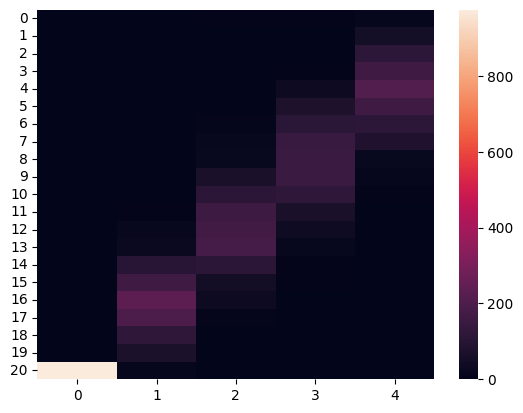

In [ ]:
states= np.array( 
 [[  0.,   1.,   5.,   6.,  14.]
 ,[  0.,   0.,   0.,   1.,  51.]
 ,[  0.,   0.,   0.,   2., 117.]
 ,[  0.,   0.,   0.,   4., 161.]
 ,[  0.,   0.,   2.,  31., 209.]
 ,[  0.,   0.,   1.,  73., 160.]
 ,[  0.,   0.,  11., 109., 118.]
 ,[  0.,   0.,  17., 146.,  80.]
 ,[  0.,   0.,  21., 149.,  20.]
 ,[  0.,   0.,  67., 150.,  12.]
 ,[  0.,   0., 114., 121.,   4.]
 ,[  0.,   4., 159.,  66.,   0.]
 ,[  0.,  19., 168.,  36.,   0.]
 ,[  0.,  26., 178.,  16.,   0.]
 ,[  0., 104., 113.,   4.,   0.]
 ,[  0., 160.,  47.,   5.,   0.]
 ,[  0., 234.,  32.,   0.,   0.]
 ,[  0., 197.,  10.,   0.,   0.]
 ,[  0., 119.,   1.,   0.,   0.]
 ,[  0.,  72.,   1.,   0.,   0.]
 ,[975.,  14.,   0.,   0.,   0.]])


sns.heatmap(states);

In [ ]:
_dict = {1: {'b': 3 ,  'c': 4}}
_new_dict = {'d': 5}
_dict.update([2,('e', 6)])
_dict#[1]['b']

TypeError: cannot convert dictionary update sequence element #0 to a sequence

In [ ]:
np.asarray([4.4, 3.6, 4. , 4.4, 4.4, 3.2, 4.,  3.  ,3.2 ,5.  ,2.4 ,4.2 ,3.8 ,3.6 ,3.4 ,4.  ,4.4 ,4.2,
 4.4, 4.2, 4.2, 4.,  4.4, 3.6, 4. , 4. , 4.4, 4.8, 4.4, 3.2, 4. , 3.4, 4. , 3. , 4.2, 4.2,
 4.6, 2.8, 4.6, 4.,  5. , 2.4, 4.4, 4.4, 4.2, 4.6, 4.2, 4. , 3.6, 4.4, 4.2, 3.8, 4.2, 4.6,
 3.2, 3.4, 3.8, 4.,  4.2, 4. , 4. , 4. , 3.4, 4.2, 3.6, 4. , 4. , 3.6, 3.8, 4.2, 3.4, 4.4,
 4.8, 3.8, 4.6, 4.,  3.8, 3.4, 4.8, 4.2,]).shape

(80,)

In [ ]:
arr = np.array([[4, 5, 4, 2, 5],
       [2, 5, 5, 5, 3],
       [3, 5, 2, 3, 7],
       [1, 6, 1, 6, 6],
       [5, 2, 3, 6, 4],
       [4, 4, 4, 6, 2],
       [1, 4, 7, 3, 5],
       [1, 3, 3, 5, 8],
       [4, 7, 1, 2, 6],
       [3, 2, 6, 2, 7],
       [4, 0, 8, 5, 3],
       [5, 3, 5, 3, 4],
       [3, 5, 6, 4, 2],
       [1, 6, 3, 2, 8],
       [3, 5, 6, 2, 4],
       [5, 3, 5, 4, 3],
       [6, 1, 3, 3, 7],
       [4, 8, 2, 3, 3],
       [7, 1, 4, 5, 3],
       [5, 4, 3, 3, 5],
       [1, 7, 3, 3, 6],
       [3, 1, 6, 7, 3],
       [3, 3, 6, 6, 2],
       [1, 5, 6, 4, 4],
       [5, 2, 6, 5, 2],
       [4, 2, 6, 3, 5],
       [5, 2, 4, 4, 5],
       [5, 4, 4, 6, 1],
       [4, 3, 3, 6, 4],
       [1, 2, 2, 7, 8],
       [7, 5, 4, 1, 3],
       [2, 3, 5, 4, 6],
       [5, 4, 3, 3, 5],
       [5, 6, 5, 3, 1],
       [4, 3, 3, 4, 6],
       [3, 6, 2, 6, 3],
       [1, 5, 6, 5, 3],
       [4, 2, 7, 6, 1],
       [2, 3, 5, 7, 3],
       [6, 2, 6, 2, 4],
       [6, 4, 5, 3, 2],
       [5, 6, 3, 2, 4],
       [3, 3, 5, 8, 1],
       [3, 7, 3, 3, 4],
       [5, 2, 4, 4, 5],
       [5, 5, 4, 4, 2],
       [2, 4, 3, 4, 7],
       [4, 3, 1, 6, 6],
       [8, 2, 5, 2, 3],
       [6, 6, 2, 1, 5],
       [8, 3, 5, 2, 2],
       [4, 4, 3, 4, 5],
       [5, 3, 3, 5, 4],
       [4, 1, 8, 4, 3],
       [6, 1, 6, 4, 3],
       [3, 2, 4, 5, 6],
       [5, 4, 4, 4, 3],
       [2, 5, 5, 4, 4],
       [4, 3, 5, 5, 3],
       [2, 4, 3, 2, 9],
       [4, 3, 9, 1, 3],
       [4, 5, 2, 5, 4],
       [2, 2, 5, 3, 8],
       [2, 8, 3, 5, 2],
       [2, 7, 7, 2, 2],
       [2, 8, 4, 2, 4],
       [7, 3, 2, 4, 4],
       [2, 4, 7, 2, 5],
       [3, 6, 3, 3, 5],
       [2, 4, 5, 6, 3],
       [7, 1, 2, 6, 4],
       [7, 3, 2, 6, 2],
       [2, 5, 4, 4, 5],
       [5, 3, 3, 4, 5],
       [4, 3, 5, 3, 5],
       [5, 3, 1, 5, 6],
       [3, 5, 4, 4, 4],
       [4, 0, 4, 8, 4],
       [3, 3, 6, 4, 4],
       [3, 6, 6, 3, 2],
       [6, 7, 3, 2, 2],
       [4, 3, 6, 3, 4],
       [5, 3, 6, 3, 3],
       [5, 5, 2, 4, 4],
       [2, 5, 4, 4, 5],
       [6, 3, 3, 4, 4],
       [5, 1, 4, 7, 3],
       [4, 4, 4, 4, 4],
       [3, 3, 8, 4, 2],
       [3, 6, 3, 5, 3],
       [5, 6, 5, 2, 2],
       [3, 3, 3, 8, 3],
       [4, 2, 4, 4, 6],
       [4, 2, 1, 6, 7],
       [6, 2, 4, 3, 5],
       [8, 3, 1, 3, 5],
       [3, 7, 3, 3, 4],
       [3, 4, 3, 6, 4],
       [4, 2, 6, 7, 1],
       [5, 5, 4, 2, 4]])

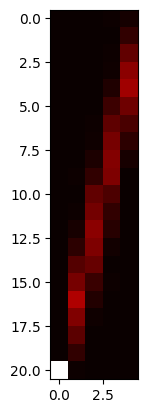

In [ ]:
states= np.asarray([[0.000e+00, 3.000e+00, 4.000e+00, 1.300e+01, 3.800e+01]
 ,[0.000e+00, 0.000e+00, 0.000e+00, 6.000e+00, 1.180e+02]
 ,[0.000e+00, 0.000e+00, 0.000e+00, 1.000e+01, 2.550e+02]
 ,[0.000e+00, 0.000e+00, 0.000e+00, 1.800e+01, 3.790e+02]
 ,[0.000e+00, 0.000e+00, 1.000e+00, 6.700e+01, 4.370e+02]
 ,[0.000e+00, 2.000e+00, 7.000e+00, 1.510e+02, 2.920e+02]
 ,[0.000e+00, 1.000e+00, 1.100e+01, 2.490e+02, 1.850e+02]
 ,[0.000e+00, 3.000e+00, 1.800e+01, 3.180e+02, 1.060e+02]
 ,[0.000e+00, 6.000e+00, 5.700e+01, 3.560e+02, 4.300e+01]
 ,[0.000e+00, 8.000e+00, 1.200e+02, 3.410e+02, 6.000e+00]
 ,[0.000e+00, 2.000e+00, 2.530e+02, 1.940e+02, 5.000e+00]
 ,[0.000e+00, 1.400e+01, 3.100e+02, 1.210e+02, 0.000e+00]
 ,[0.000e+00, 3.900e+01, 3.770e+02, 8.600e+01, 0.000e+00]
 ,[0.000e+00, 1.070e+02, 3.440e+02, 2.800e+01, 0.000e+00]
 ,[0.000e+00, 2.210e+02, 2.710e+02, 2.000e+00, 0.000e+00]
 ,[0.000e+00, 3.160e+02, 1.450e+02, 1.200e+01, 0.000e+00]
 ,[0.000e+00, 4.840e+02, 7.300e+01, 0.000e+00, 0.000e+00]
 ,[0.000e+00, 3.480e+02, 1.600e+01, 0.000e+00, 0.000e+00]
 ,[0.000e+00, 2.380e+02, 1.000e+00, 0.000e+00, 0.000e+00]
 ,[0.000e+00, 1.180e+02, 7.000e+00, 0.000e+00, 0.000e+00]
 ,[1.961e+03, 1.400e+01, 1.000e+00, 0.000e+00, 0.000e+00]])

import seaborn as sns
sns.heatmap(states);

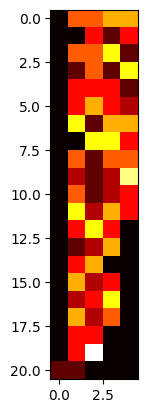

In [ ]:
act= np.asarray([[0., 4., 4., 5., 5.]
, [0., 0., 3., 1., 3.]
, [0., 4., 4., 6., 1.]
, [0., 1., 4., 1., 6.]
, [0., 3., 3., 3., 1.]
, [0., 3., 5., 3., 2.]
, [0., 6., 1., 5., 5.]
, [0., 0., 6., 6., 3.]
, [0., 4., 1., 4., 4.]
, [0., 2., 1., 2., 7.]
, [0., 4., 1., 2., 3.]
, [0., 6., 2., 5., 3.]
, [0., 3., 6., 3., 0.]
, [0., 1., 2., 5., 0.]
, [0., 3., 5., 0., 0.]
, [0., 5., 2., 3., 0.]
, [0., 2., 3., 6., 0.]
, [0., 5., 2., 4., 0.]
, [0., 3., 3., 0., 0.]
, [0., 3., 8., 0., 0.]
, [1., 1., 0., 0., 0.]])

plt.imshow(act, cmap='hot', interpolation='nearest')
plt.show()

In [ ]:
act.shape

(21, 5)

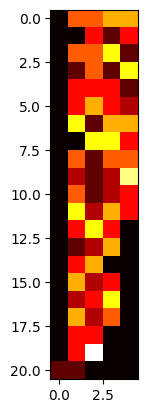

<AxesSubplot: >

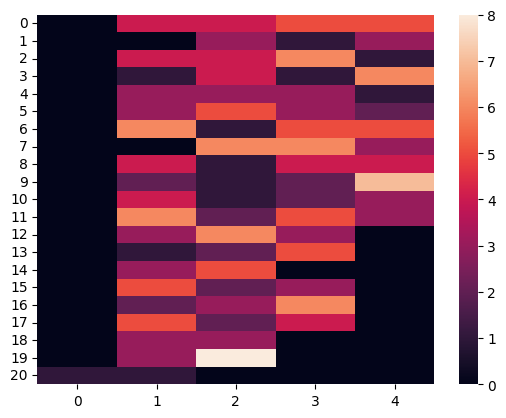

In [ ]:
def running_mean(x, N):
    cumsum = np.cumsum(np.insert(x, 0, 0)) 
    return (cumsum[N:] - cumsum[:-N]) / float(N)

plt.imshow(running_mean(act.flatten(), 1).reshape(-1,5), cmap='hot', interpolation='nearest', )
plt.show()
import seaborn as sns
sns.heatmap(act)#running_mean(act.flatten(), 1).reshape(-1,5));

<AxesSubplot: >

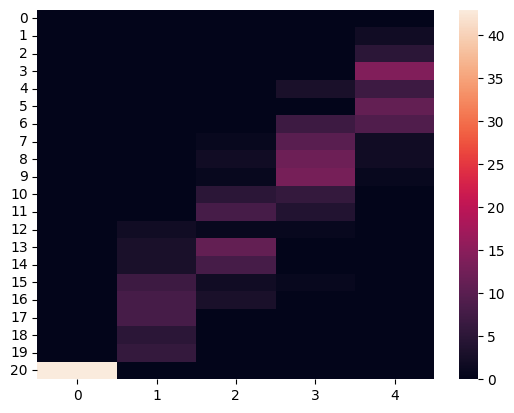

In [ ]:
act= np.asarray(
[[ 0.  ,0. , 0.,  0.,  0.]
 ,[ 0.  ,0. , 0.,  0.,  2.]
 ,[ 0.  ,0. , 0.,  0.,  5.]
 ,[ 0.  ,0. , 0.,  0., 14.]
 ,[ 0.  ,0. , 0.,  3.,  7.]
 ,[ 0.  ,0. , 0.,  0., 11.]
 ,[ 0.  ,0. , 0.,  7.,  9.]
 ,[ 0.  ,0. , 1., 10.,  2.]
 ,[ 0.  ,0. , 2., 12.,  2.]
 ,[ 0.  ,0. , 1., 13.,  1.]
 ,[ 0.  ,0. , 5.,  6.,  0.]
 ,[ 0.  ,0. , 8.,  4.,  0.]
 ,[ 0.  ,2. , 1.,  1.,  0.]
 ,[ 0.  ,3. ,11.,  0.,  0.]
 ,[ 0.  ,3. , 8.,  0.,  0.]
 ,[ 0.  ,7. , 2.,  1.,  0.]
 ,[ 0.  ,8. , 3.,  0.,  0.]
 ,[ 0.  ,8. , 0.,  0.,  0.]
 ,[ 0.  ,5. , 0.,  0.,  0.]
 ,[ 0.  ,6. , 0.,  0.,  0.]
 ,[43.  ,0. , 0.,  0.,  0.]])
sns.heatmap(act)

In [ ]:
import numpy as np
timestep = 0
_dict = np.zeros((20,10))#{}
for i in range(10):
    state =[timestep , timestep]
    timestep +=1
    _dict[state[0], state[1]] += 1
    #_dict.update({timestep : state} )# {timestep: 20, 't': timestep/5, 'dn' : 'T'}
    #if _dict
_dict

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [ ]:
b = []
from statistics import mode
aa = np.asarray(b)
ai = aa.reshape(5,-1)
mean=np.empty((ai.shape[0]))
for i in range(5):
    mean[i] = np.mean(ai[i,:])

mean


array([4., 4., 4., 4., 4.])

In [101]:
aa.mean()

3.826458333333333

In [102]:
np.sum([3.99333333, 3.995   ,   3.99875 ,   4.  ,       3.99222222])

19.97930555

In [103]:
ai[4,:]

array([20.,  0.,  0.,  0.,  0.])

In [ ]:
np.mean(a)

3.826458333333333

In [ ]:
ai.shape

(5, 200)

In [ ]:
roba = np.zeros((200,5))
for j in range(200):
    for i in range(5):
        roba[j, :i] = a[:i]
roba

array([[20.,  0.,  0.,  0.,  0.],
       [20.,  0.,  0.,  0.,  0.],
       [20.,  0.,  0.,  0.,  0.],
       [20.,  0.,  0.,  0.,  0.],
       [20.,  0.,  0.,  0.,  0.],
       [20.,  0.,  0.,  0.,  0.],
       [20.,  0.,  0.,  0.,  0.],
       [20.,  0.,  0.,  0.,  0.],
       [20.,  0.,  0.,  0.,  0.],
       [20.,  0.,  0.,  0.,  0.],
       [20.,  0.,  0.,  0.,  0.],
       [20.,  0.,  0.,  0.,  0.],
       [20.,  0.,  0.,  0.,  0.],
       [20.,  0.,  0.,  0.,  0.],
       [20.,  0.,  0.,  0.,  0.],
       [20.,  0.,  0.,  0.,  0.],
       [20.,  0.,  0.,  0.,  0.],
       [20.,  0.,  0.,  0.,  0.],
       [20.,  0.,  0.,  0.,  0.],
       [20.,  0.,  0.,  0.,  0.],
       [20.,  0.,  0.,  0.,  0.],
       [20.,  0.,  0.,  0.,  0.],
       [20.,  0.,  0.,  0.,  0.],
       [20.,  0.,  0.,  0.,  0.],
       [20.,  0.,  0.,  0.,  0.],
       [20.,  0.,  0.,  0.,  0.],
       [20.,  0.,  0.,  0.,  0.],
       [20.,  0.,  0.,  0.,  0.],
       [20.,  0.,  0.,  0.,  0.],
       [20.,  

(array([[200.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [200.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [200.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [200.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [191.,   0.,   0.,   0.,   0.,   0.,   6.,   0.,   2.,   1.]]),
 array([0.00000000e+000, 4.08847099e+178, 8.17694198e+178, 1.22654130e+179,
        1.63538840e+179, 2.04423550e+179, 2.45308260e+179, 2.86192969e+179,
        3.27077679e+179, 3.67962389e+179, 4.08847099e+179]),
 <a list of 5 BarContainer objects>)

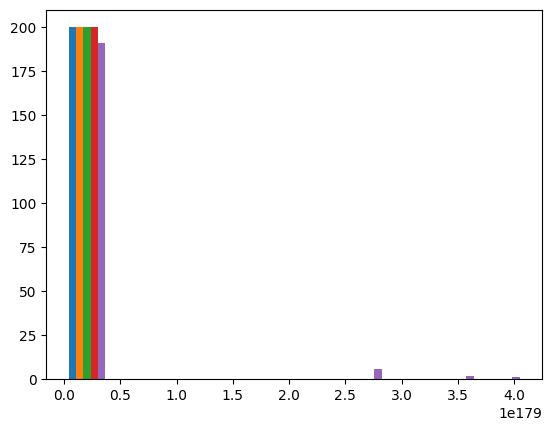

In [ ]:
plt.hist(roba)

In [ ]:
ai=aa.reshape(5,200)
ai.shape

(5, 200)

In [ ]:
aa = np.asarray(a)
ai = aa.reshape(-1,5)
mean = np.empty((ai.shape[0],1))
mean = ai.mean(axis = 0)

In [ ]:
mean

array([12.04833333,  3.923     ,  1.72941667,  0.85555556,  0.57598611])

In [ ]:
ai.mean(axis=1)

array([4.        , 4.        , 4.        , 4.        , 4.        ,
       4.        , 3.91111111, 4.        , 0.        , 1.5       ,
       4.        , 4.        , 4.        , 4.        , 4.        ,
       4.        , 4.        , 4.        , 4.        , 3.89333333,
       4.        , 4.        , 4.        , 4.        , 4.        ,
       2.        , 3.93333333, 4.        , 4.        , 4.        ,
       4.        , 2.72      , 4.        , 4.        , 4.        ,
       4.        , 4.        , 4.        , 4.        , 4.        ,
       4.        , 4.        , 4.        , 4.        , 4.        ,
       4.        , 4.        , 3.8       , 3.53333333, 4.        ,
       4.        , 4.        , 3.9       , 4.        , 3.82222222,
       4.        , 2.66666667, 4.        , 4.        , 4.        ,
       4.        , 0.66666667, 4.        , 4.        , 4.        ,
       4.        , 4.        , 4.        , 3.9       , 4.        ,
       4.        , 4.        , 3.86666667, 4.        , 1.5    

In [ ]:
ai[:,1].mean()

3.9230000000000005

In [ ]:
ai[199,:]

array([ 3.33333333, 16.66666667,  0.        ,  0.        ,  0.        ])

In [ ]:
ai.mean(axis=0)

array([12.04833333,  3.923     ,  1.72941667,  0.85555556,  0.57598611])

In [ ]:
np.sum([5.079,  0.,    14.921 , 0.   ,  0. ]  )

20.0

In [ ]:
import matplotlib.pyplot as plt
a = [20, 0, 0, 0, 0, 12, 1.6, 6.4, 0, 0, 0, 20, 0, 0, 0, 0, 0, 20, 0, 0, 20, 0, 0, 0, 0, 1, 19, 0, 0, 0, 3.3333333333333335, 2, 14, 0.22222222222222263, 0, 20, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3.3333333333333335, 0, 4.166666666666667, 0, 0, 20, 0, 0, 0, 0, 3.3333333333333335, 4, 10, 2.666666666666668, 0, 20, 0, 0, 0, 0, 3.3333333333333335, 2, 14.666666666666668, 0, 0, 20, 0, 0, 0, 0, 3.3333333333333335, 16, 0.6666666666666679, 0, 0, 20, 0, 0, 0, 0, 3, 3, 2, 4.0, 8.0, 20, 0, 0, 0, 0, 14, 1.2, 4, 0.2666666666666666, 0, 1, 19, 0, 0, 0, 1, 19, 0, 0, 0, 20, 0, 0, 0, 0, 1, 0, 19, 0, 0, 20, 0, 0, 0, 0, 0, 0, 0, 0, 10.0, 3.3333333333333335, 3.3333333333333335, 13, 0, 0, 0, 0, 20, 0, 0, 18, 0.4, 1.6, 0, 0, 20, 0, 0, 0, 0, 1, 3.8, 2, 4.3999999999999995, 8.8, 12, 1.6, 0, 0, 0, 3.3333333333333335, 16.666666666666668, 0, 0, 0, 15, 5, 0, 0, 0, 20, 0, 0, 0, 0, 20, 0, 0, 0, 0, 0, 20, 0, 0, 0, 14, 6, 0, 0, 0, 20, 0, 0, 0, 0, 20, 0, 0, 0, 0, 20, 0, 0, 0, 0, 20, 0, 0, 0, 0, 3.3333333333333335, 16.666666666666668, 0, 0, 0, 20, 0, 0, 0, 0, 20, 0, 0, 0, 0, 0, 20, 0, 0, 0, 10, 6, 4, 0, 0, 6, 6, 2.0, 3, 2, 5, 3.0, 4, 2.6666666666666665, 3, 0, 20, 0, 0, 0, 20, 0, 0, 0, 0, 20, 0, 0, 0, 0, 0, 6, 5, 8, 0.5, 0, 4.0, 7, 9, 0, 3.3333333333333335, 3.3333333333333335, 6, 2.4444444444444446, 4, 3.3333333333333335, 16.666666666666668, 0, 0, 0, 3.3333333333333335, 3.3333333333333335, 3.3333333333333335, 3.3333333333333335, 0, 20, 0, 0, 0, 0, 20, 0, 0, 0, 0, 20, 0, 0, 0, 0, 20, 0, 0, 0, 0, 3.3333333333333335, 0, 0, 0, 0, 20, 0, 0, 0, 0, 20, 0, 0, 0, 0, 20, 0, 0, 0, 0, 3.3333333333333335, 1, 5, 10.666666666666668, 0, 20, 0, 0, 0, 0, 0, 20, 0, 0, 0, 3.3333333333333335, 16, 0.16666666666666696, 0, 0, 20, 0, 0, 0, 0, 20, 0, 0, 0, 0, 20, 0, 0, 0, 0, 3.3333333333333335, 4, 6, 6, 0, 20, 0, 0, 0, 0, 3.3333333333333335, 0, 4.166666666666667, 0, 0, 1, 19, 0, 0, 0, 6, 2.8, 11.2, 0, 0, 1, 3.8, 3.8, 3, 4.199999999999999, 20, 0, 0, 0, 0, 3.3333333333333335, 3.3333333333333335, 0, 4.444444444444445, 0, 1, 19, 0, 0, 0, 20, 0, 0, 0, 0, 20, 0, 0, 0, 0, 15, 5, 0, 0, 0, 20, 0, 0, 0, 0, 20, 0, 0, 0, 0, 4, 4, 0, 12, 0, 20, 0, 0, 0, 0, 20, 0, 0, 0, 0, 0, 4.0, 0, 5.333333333333333, 5.333333333333334, 3.3333333333333335, 13, 3, 0.22222222222222263, 0.2222222222222226, 20, 0, 0, 0, 0, 20, 0, 0, 0, 0, 7, 13, 0, 0, 0, 20, 0, 0, 0, 0, 20, 0, 0, 0, 0, 11, 3, 0, 0, 6, 20, 0, 0, 0, 0, 20, 0, 0, 0, 0, 20, 0, 0, 0, 0, 20, 0, 0, 0, 0, 3.3333333333333335, 2, 14.666666666666668, 0, 0, 3.3333333333333335, 4, 12.666666666666668, 0, 0, 20, 0, 0, 0, 0, 20, 0, 0, 0, 0, 20, 0, 0, 0, 0, 20, 0, 0, 0, 0, 20, 0, 0, 0, 0, 3.3333333333333335, 0, 4.166666666666667, 12.5, 0, 3.3333333333333335, 16.666666666666668, 0, 0, 0, 12, 8, 0, 0, 0, 0, 20, 0, 0, 0, 20, 0, 0, 0, 0, 6, 2.8, 11.2, 0, 0, 20, 0, 0, 0, 0, 1, 2, 4.25, 8, 2.375, 20, 0, 0, 0, 0, 20, 0, 0, 0, 0, 4, 6, 2.5, 2.5, 2.5, 20, 0, 0, 0, 0, 18, 2, 0, 0, 0, 20, 0, 0, 0, 0, 20, 0, 0, 0, 0, 20, 0, 0, 0, 0, 20, 0, 0, 0, 0, 20, 0, 0, 0, 0, 12, 3, 0, 5, 0, 0, 20, 0, 0, 0, 9, 11, 0, 0, 0, 10, 2.0, 8.0, 0, 0, 3.3333333333333335, 16.666666666666668, 0, 0, 0, 0, 0, 0, 6.666666666666667, 13, 3, 0, 0, 5.666666666666667, 0, 1, 3.8, 3.8, 0, 5.699999999999999, 0, 20, 0, 0, 0, 20, 0, 0, 0, 0, 3.3333333333333335, 5, 11, 0.22222222222222263, 0, 20, 0, 0, 0, 0, 17, 0.6, 0, 0, 2.4, 20, 0, 0, 0, 0, 3.3333333333333335, 16.666666666666668, 0, 0, 0, 18, 0, 0.5, 0.5, 0.5, 20, 0, 0, 0, 0, 20, 0, 0, 0, 0, 20, 0, 0, 0, 0, 20, 0, 0, 0, 0, 17, 1, 2, 0, 0, 17, 3, 0, 0, 0, 20, 0, 0, 0, 0, 16, 4, 0, 0, 0, 20, 0, 0, 0, 0, 20, 0, 0, 0, 0, 3.3333333333333335, 16.666666666666668, 0, 0, 0, 7, 13, 0, 0, 0, 4, 3.2, 12.8, 0, 0, 20, 0, 0, 0, 0, 20, 0, 0, 0, 0, 13, 2, 0, 1.6666666666666667, 3, 3.3333333333333335, 16.666666666666668, 0, 0, 0, 20, 0, 0, 0, 0, 3.3333333333333335, 16.666666666666668, 0, 0, 0, 20, 0, 0, 0, 0, 3.3333333333333335, 0, 16, 0.22222222222222263, 0, 20, 0, 0, 0, 0, 20, 0, 0, 0, 0, 20, 0, 0, 0, 0, 0, 0, 0, 6, 0, 3.3333333333333335, 6, 8, 2.666666666666668, 0, 3.3333333333333335, 0, 0, 16.666666666666668, 0, 0, 0, 3, 5.666666666666667, 9, 9, 5, 1.5, 1.5, 0, 20, 0, 0, 0, 0, 20, 0, 0, 0, 0, 20, 0, 0, 0, 0, 20, 0, 0, 0, 0, 20, 0, 0, 0, 0, 1, 2, 4, 4.333333333333333, 8.666666666666668, 20, 0, 0, 0, 0, 7, 4, 7, 2, 0, 3.3333333333333335, 3.3333333333333335, 3.3333333333333335, 7, 0, 20, 0, 0, 0, 0, 7, 13, 0, 0, 0, 0, 20, 0, 0, 0, 14, 6, 0, 0, 0, 20, 0, 0, 0, 0, 3.3333333333333335, 0, 0, 0, 0, 3.3333333333333335, 9, 7, 0.6666666666666679, 0, 3.3333333333333335, 5, 11.666666666666668, 0, 0, 20, 0, 0, 0, 0, 0, 20, 0, 0, 0, 20, 0, 0, 0, 0, 0, 4.0, 0, 0, 16.0, 20, 0, 0, 0, 0, 3.3333333333333335, 16, 0.6666666666666679, 0, 0, 20, 0, 0, 0, 0, 20, 0, 0, 0, 0, 3.3333333333333335, 16.666666666666668, 0, 0, 0, 20, 0, 0, 0, 0, 20, 0, 0, 0, 0, 3.3333333333333335, 16.666666666666668, 0, 0, 0]
aa = np.asarray(a)
ai = aa.reshape(5,-1)
mean=np.empty((ai.shape[0],1))

for i in range(5):
    mean[i,:] = np.mean(ai[i,:])

mean.flatten()

array([3.74894444, 3.72594444, 3.94784722, 3.90677778, 3.80277778])

In [ ]:
import torch
t = torch.tensor([0.0] , dtype=torch.float)

In [ ]:
np.double(t)

0.0

In [ ]:
mean

array([[3.74894444],
       [3.72594444],
       [3.94784722],
       [3.        ],
       [4.        ]])

In [ ]:
ai.shape[1]

200

In [ ]:
def abm():
    N = 3600
    I = 10
    dt= 1.0 / N
    X=np.zeros((N+1, I) ,dtype=float)
    X[0]= 10
    np.random.seed(14)
    for i in range(N):
    
        X[i+1]=X[i]+0.9*dt+0.1*np.sqrt(dt)*np.random.standard_normal(I) 

    return np.abs(X)

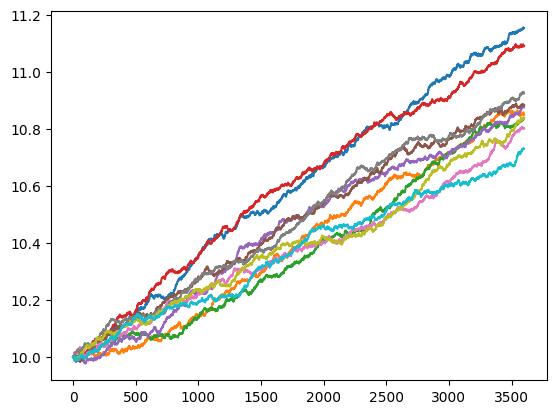

In [ ]:
import matplotlib.pyplot as plt
a = abm()
plt.plot(a)

In [ ]:
a[:,3]

array([10.        ,  9.99987944, 10.00094986, ..., 10.19136844,
       10.19096267, 10.19028977])

In [ ]:
s = p.Ambiente(numIt = 10).abm().flatten()
s.shape
#ss = sliceData(s, slices)
#ss

(36010,)

In [ ]:
np.diff(ss[1,:])

array([-1.22169673e-04, -1.00889381e-04, -2.53940551e-04, -1.14298545e-04,
       -1.88187495e-04, -7.21970304e-05, -2.10217248e-04,  1.36324292e-04,
       -3.35582377e-05, -2.22258245e-04, -2.35372484e-04,  9.34551249e-05,
        1.70718260e-04,  3.30692585e-05, -2.80994039e-04, -1.05812411e-04,
       -3.21306609e-05, -1.79526951e-04,  2.86125125e-05,  5.50430959e-05,
        2.01443940e-05,  1.54313158e-04, -4.23202995e-05, -1.07698789e-04,
       -2.31504114e-04,  8.24180763e-05, -3.47951256e-04,  2.85756292e-04,
        1.54208837e-04,  8.12833377e-05, -1.65804267e-04, -3.97367472e-05,
       -2.21871113e-04, -1.59711318e-04, -6.44249057e-06, -1.54052139e-04,
       -2.07080107e-04, -5.68070436e-05, -1.49189710e-04, -8.37912935e-05,
       -8.49755739e-06, -1.66514708e-04, -2.49649544e-05,  1.93357797e-04,
        2.68660335e-04, -2.29540728e-05,  9.25712927e-05, -6.95457458e-05,
        6.35017876e-05, -3.23913256e-04,  1.26798623e-05,  3.18400027e-04,
       -1.45389625e-04,  

In [ ]:
5*720

3600

In [ ]:
def matriciIntervalli(data,numSlice):

    dati = sliceData(data, numSlice)
    price= np.empty((numSlice, int(len(data) /numSlice) -1))
    var  = np.empty((numSlice, int(len(data)/numSlice) -1))

    for i in range(dati.shape[0]): # divido per numSlice intervalli
        price[i,:] = env.returns(dati[i,:])
        var  [i,:] = env.var(dati[i,:])

    return price, var, dati